## Explore change point detection by different algorithms

In [127]:
# imports
from utils import helpers, constants
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

## EMD

In [128]:
# load data dictionary
data_dictionary = helpers.load_data_dictionary(constants.DATA_DICTIONARY_FILE_PATH)

In [130]:
# config
change_point_detector = 'emd'
window_sizes = [100, 200, 300, 400, 500, 600]

configuration_to_sizes_map = {f'{change_point_detector}{window_size}': window_size for window_size in window_sizes}

In [ ]:
dd_results_df = helpers.get_dataframe_from_drift_detection_results(data_dictionary.keys(), configuration_to_sizes_map.keys())
dd_results_df

dataset configuration  change_point                    change_moment
0     BPIC12        emd100          4694 2011-11-23 07:43:48.856000+00:00
1     BPIC12        emd100          6420 2011-12-14 21:10:21.066000+00:00
2     BPIC12        emd100          6925 2011-12-22 22:34:24.761000+00:00
3     BPIC12        emd100          7649 2012-01-03 12:15:31.494000+00:00
4     BPIC12        emd100          9874 2012-01-27 14:58:46.061000+00:00
...      ...           ...           ...                              ...
1336   RTFMP        emd600        144367        2011-11-14 23:00:00+00:00
1337   RTFMP        emd600        145139        2012-02-16 23:00:00+00:00
1338   RTFMP        emd600        146568        2012-07-12 22:00:00+00:00
1339   RTFMP        emd600        147268        2012-08-14 22:00:00+00:00
1340   RTFMP        emd600        148858        2013-01-07 23:00:00+00:00

[1341 rows x 4 columns]

In [132]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_number_change_points_per_df(dd_results_df, configuration_name_replacement_map=None, y_label='Configuration'):
    # Defensive copy
    df_for_plot = dd_results_df.copy()

    # Create readable config label column (y_label)
    if configuration_name_replacement_map is None:
        df_for_plot[y_label] = df_for_plot['configuration']
    else:
        # Map known configs; fall back to original names if not in map
        df_for_plot[y_label] = df_for_plot['configuration'].map(
            lambda c: configuration_name_replacement_map.get(c, c)
        )

    # Aggregate: count non-null change points per (Dataset, y_label)
    agg = (
        df_for_plot
        .rename(columns={'dataset': 'Dataset'})
        .groupby(['Dataset', y_label], as_index=False)['change_point']
        .count()
        .rename(columns={'change_point': '# Change Points'})
    )

    # Create boxplot: distribution per dataset (across configurations)
    plt.figure(figsize=(10, 6))
    agg.boxplot(column="# Change Points", by="Dataset", grid=False)
    plt.title(f"Distribution of Change Points per {y_label}")
    plt.suptitle("")  # Remove pandas' automatic suptitle
    plt.xlabel("Dataset")
    plt.ylabel("Number of Change Points")
    plt.ylim(bottom=0)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Summarize relevant change count statistics per dataset
    summary_df = agg.groupby("Dataset")['# Change Points'].agg(
        min_change_points="min",
        max_change_points="max",
        mean_change_points="mean",
        median_change_points="median",
        std_change_points="std",
    ).reset_index()

    display(summary_df)

<Figure size 1000x600 with 0 Axes>

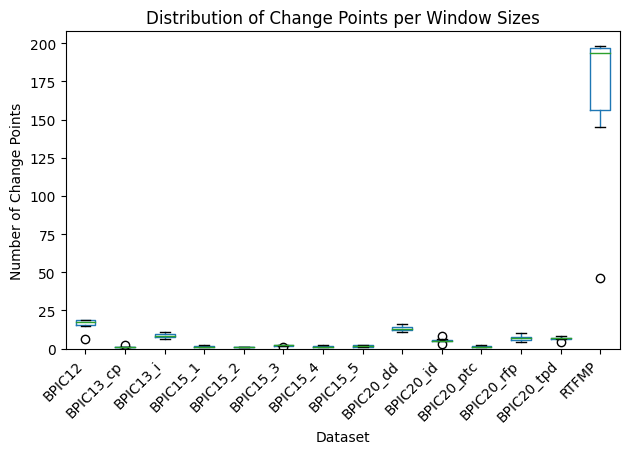

Dataset  min_change_points  max_change_points  mean_change_points  \
0       BPIC12                  6                 19           15.666667   
1    BPIC13_cp                  1                  2            1.250000   
2     BPIC13_i                  6                 11            8.500000   
3     BPIC15_1                  1                  2            1.333333   
4     BPIC15_2                  1                  1            1.000000   
5     BPIC15_3                  1                  2            1.750000   
6     BPIC15_4                  1                  2            1.333333   
7     BPIC15_5                  1                  2            1.500000   
8    BPIC20_dd                 11                 16           13.166667   
9    BPIC20_id                  3                  8            5.333333   
10  BPIC20_ptc                  1                  2            1.333333   
11  BPIC20_rfp                  4                 10            6.833333   
12  BPIC20_tpd                  4                  8            6.500000   
13       RTFMP                 46                198          162.166667   

    median_change_points  std_change_points  
0                   17.5           5.046451  
1                    1.0           0.500000  
2                    8.5           1.870829  
3                    1.0           0.577350  
4                    1.0           0.000000  
5                    2.0           0.500000  
6                    1.0           0.577350  
7                    1.5           0.577350  
8                   13.0           1.834848  
9                    5.0           1.632993  
10                   1.0           0.577350  
11                   7.0           2.136976  
12                   7.0           1.378405  
13                 193.5          60.436468

In [133]:
plot_number_change_points_per_df(dd_results_df, configuration_name_replacement_map=configuration_to_sizes_map, y_label='Window Sizes')


<Figure size 1000x600 with 0 Axes>

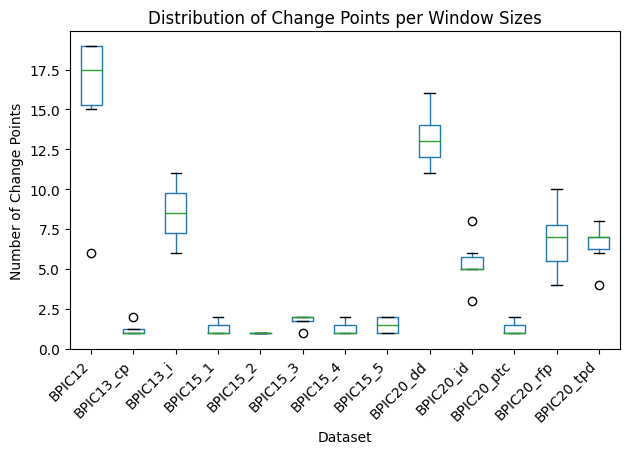

Dataset  min_change_points  max_change_points  mean_change_points  \
0       BPIC12                  6                 19           15.666667   
1    BPIC13_cp                  1                  2            1.250000   
2     BPIC13_i                  6                 11            8.500000   
3     BPIC15_1                  1                  2            1.333333   
4     BPIC15_2                  1                  1            1.000000   
5     BPIC15_3                  1                  2            1.750000   
6     BPIC15_4                  1                  2            1.333333   
7     BPIC15_5                  1                  2            1.500000   
8    BPIC20_dd                 11                 16           13.166667   
9    BPIC20_id                  3                  8            5.333333   
10  BPIC20_ptc                  1                  2            1.333333   
11  BPIC20_rfp                  4                 10            6.833333   
12  BPIC20_tpd                  4                  8            6.500000   

    median_change_points  std_change_points  
0                   17.5           5.046451  
1                    1.0           0.500000  
2                    8.5           1.870829  
3                    1.0           0.577350  
4                    1.0           0.000000  
5                    2.0           0.500000  
6                    1.0           0.577350  
7                    1.5           0.577350  
8                   13.0           1.834848  
9                    5.0           1.632993  
10                   1.0           0.577350  
11                   7.0           2.136976  
12                   7.0           1.378405

In [134]:
# filter RTFMP from dataframe
filtered_dd_results_df = dd_results_df[dd_results_df['dataset'] != 'RTFMP'] # filter out dataset 'RTFMP'
plot_number_change_points_per_df(filtered_dd_results_df, configuration_name_replacement_map=configuration_to_sizes_map, y_label='Window Sizes')

In [135]:
def df_to_dict(dd_results_df, configuration_name_replacement_map=None, values_column='change_point'):
    results_dict = {}

    if dd_results_df is None or dd_results_df.empty:
        return results_dict

    # Iterate rows and build: dataset -> (mapped configuration/window_size) -> [values]
    for _, row in dd_results_df.iterrows():
        dataset = row.get('dataset')
        configuration = row.get('configuration')
        if dataset is None or configuration is None:
            continue  # skip malformed rows

        dict_index = (
            configuration if configuration_name_replacement_map is None
            else configuration_name_replacement_map.get(configuration, configuration)
        )

        value = row.get(values_column)
        if value is None:
            continue  # optionally skip NaNs/None

        if dataset not in results_dict:
            results_dict[dataset] = {}

        # auto-create list per dataset/window_size
        results_dict[dataset].setdefault(dict_index, []).append(value)

    return results_dict


In [136]:
change_points_dict = df_to_dict(dd_results_df, configuration_name_replacement_map=configuration_to_sizes_map, values_column='change_point')
change_points_dict

{'BPIC12': {100: [4694, 6420, 6925, 7649, 9874, 10404],
  200: [1239,
   1532,
   3206,
   3428,
   4275,
   4703,
   5591,
   5920,
   6695,
   6928,
   8929,
   9140,
   9343,
   10398,
   10578,
   11526],
  300: [1288,
   1586,
   3083,
   3509,
   3906,
   4298,
   4712,
   5592,
   5954,
   6652,
   7687,
   8050,
   8573,
   9140,
   9425,
   9884,
   10706,
   11525,
   11835],
  400: [559,
   1134,
   1631,
   2203,
   3088,
   3492,
   3892,
   4710,
   5089,
   5554,
   5954,
   6673,
   7685,
   7964,
   8711,
   9114,
   9830,
   10708,
   11836],
  500: [1239,
   1771,
   2271,
   3211,
   3992,
   4748,
   5554,
   6684,
   7649,
   7964,
   8626,
   9202,
   10076,
   10578,
   11835],
  600: [803,
   1173,
   1606,
   1780,
   2207,
   3088,
   4039,
   4642,
   5593,
   5954,
   6435,
   7185,
   7712,
   8554,
   9195,
   9885,
   10706,
   11573,
   11829]},
 'BPIC13_cp': {100: [543], 200: [543, 805], 300: [741], 400: [551]},
 'BPIC13_i': {100: [1375, 2353, 2587, 27

In [137]:

def aggregate_change_points_by_window(cp_all_window_sizes, alpha=1.0):
    """
    Aggregates change points across window sizes by merging close ones,
    preferring the closest match (not just the first found).

    Returns a DataFrame with cp, window_size, support.
    """
    if not cp_all_window_sizes:
        return pd.DataFrame(columns=['change_point', "window_size", "support", "supporting_windows"])

    max_ws = max(cp_all_window_sizes.keys())

    # Step 1: Flatten and initialize support + support set
    records = []
    for ws, cp_list in cp_all_window_sizes.items():
        for cp in cp_list:
            support = 1
            records.append({
                'change_point': cp,
                "window_size": ws,
                "support": support,
                "supporting_windows": {ws}
            })

    # Sort by descending window size, then cp
    records.sort(key=lambda x: (-x["window_size"], x['change_point']))

    merged_records = []

    for i, rec_a in enumerate(records):
        candidates = []

        # Find merge candidates in smaller window sizes
        for j in range(i + 1, len(records)):
            rec_b = records[j]
            if rec_b["window_size"] >= rec_a["window_size"]:
                continue  # only merge into smaller window

            dist = abs(rec_a['change_point'] - rec_b['change_point'])
            if dist <= rec_a["window_size"] * alpha:
                candidates.append((dist, rec_b))

        # Choose the closest candidate (if any)
        if candidates:
            _, closest = min(candidates, key=lambda x: x[0])
            closest["support"] += rec_a["support"]
            closest["supporting_windows"] |= rec_a["supporting_windows"]
        else:
            merged_records.append(rec_a)

    return pd.DataFrame(merged_records)

# --- Outer filtering function --- #

def deduplicate_change_points_by_window(cp_all_window_sizes, alpha=1.0, min_support_windows=3):
    """
    Deduplicate change points by support-based filtering on top of aggregation.

    Parameters
    ----------
    cp_em_all_window_sizes : dict
        Dictionary of form {window_size: [change_point_1, ...]}
    alpha : float
        Distance factor for merging similar change points
    min_support_windows : int
        Min number of windows supporting the change point.

    Returns
    -------
    list of int
        Deduplicated and filtered list of change points
    """
    if not cp_all_window_sizes:
        return []


    # Aggregate and merge support
    aggregated_df = aggregate_change_points_by_window(cp_all_window_sizes, alpha)

    # handle no change point situations
    if aggregated_df.empty:
        return []
  
    # Filter per threshold
    filtered_df = aggregated_df[aggregated_df["support"] >= min_support_windows]

    return list(filtered_df['change_point'])

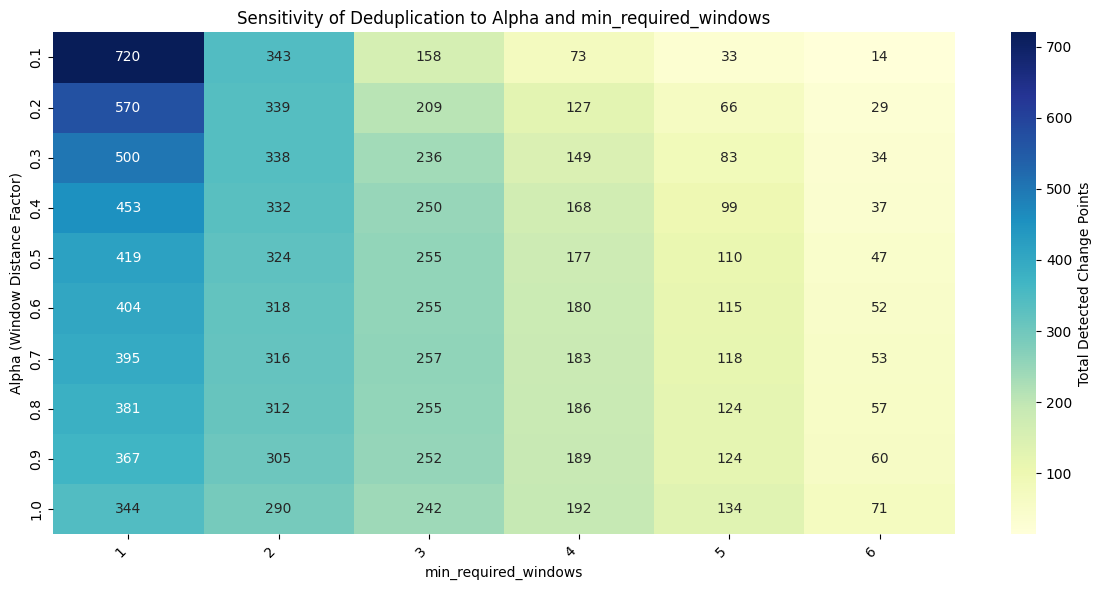

In [138]:
# check sensitivity of input parmeters

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define parameters
alphas = np.round(np.arange(0.1, 1.01, 0.1), 2)
min_support_windows_list = [1, 2, 3, 4, 5, 6]

# Optional: label each window set for x-axis
window_labels = [str(ws) for ws in min_support_windows_list]

# Initialize heatmap data: rows = alphas, columns = window_sets
heatmap_data = pd.DataFrame(index=alphas, columns=window_labels)

# Loop over all combinations
for alpha in alphas:
    for i, min_support_windows in enumerate(min_support_windows_list):
        label = window_labels[i]
        total_cps = 0

        for dataset, cp_all_window_sizes in change_points_dict.items():
            cps = deduplicate_change_points_by_window(
                cp_all_window_sizes,
                alpha=alpha,
                min_support_windows=min_support_windows
            )
            total_cps += len(cps)

        heatmap_data.at[alpha, label] = total_cps

# Convert to numeric for plotting
heatmap_data = heatmap_data.astype(int)

# Plot
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'Total Detected Change Points'})
plt.title("Sensitivity of Deduplication to Alpha and min_required_windows")
plt.xlabel("min_required_windows")
plt.ylabel("Alpha (Window Distance Factor)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [139]:
# 1. Aggregate all datasets (returns DataFrames)
aggregated_cp_dict = {
    dataset: aggregate_change_points_by_window(cp_all_window_sizes, alpha=0.5)
    for dataset, cp_all_window_sizes in change_points_dict.items()
}

# 2. Deduplicate all datasets (returns lists of CPs)
deduplicated_cp_dict = {
    dataset: deduplicate_change_points_by_window(cp_all_window_sizes, alpha=0.5, min_support_windows=3)
    for dataset, cp_all_window_sizes in change_points_dict.items()
}

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from pandas.api.types import is_numeric_dtype

def plot_change_points(dataset, input, input_type, config_column_in_df=None, y_axis_label=None,
                       configuration_labels=None, default_configuration=None, title_suffix="", x_axis='change_point'):
    # --- Normalize input to DataFrame ---
    if input_type == 'list_of_configurations':
        label_name = y_axis_label or "Configuration"
        rows = [{x_axis: cp, label_name: label} for label, cps in input.items() for cp in cps]
        dataset_df = pd.DataFrame(rows)
    elif input_type == 'list_of_cps':
        dataset_df = pd.DataFrame({x_axis: input})
    elif input_type == 'dataframe':
        dataset_df = input.copy()
    else:
        raise ValueError("input_type must be 'list_of_configurations', 'list_of_cps', or 'dataframe'")

    if dataset_df.empty:
        print(f"[INFO] No change points to plot for dataset {dataset}.")
        return

    plt.figure(figsize=(10, 6))

    # Determine y column
    y_col = (config_column_in_df if (config_column_in_df and config_column_in_df in dataset_df.columns)
             else (y_axis_label if (y_axis_label and y_axis_label in dataset_df.columns) else None))

    # Optional size mapping
    use_size = "support" in dataset_df.columns
    if use_size:
        smin, smax = float(dataset_df["support"].min()), float(dataset_df["support"].max())
        dataset_df["point_size"] = 100.0 if smax == smin else np.interp(dataset_df["support"], [smin, smax], [50, 200])

    # Numeric or categorical?
    y_is_numeric = (y_col is not None) and is_numeric_dtype(dataset_df[y_col])

    # If categorical y: enforce full category list so empty ones can be shown
    if (y_col is not None) and (configuration_labels is not None) and (not y_is_numeric):
        dataset_df[y_col] = pd.Categorical(dataset_df[y_col], categories=configuration_labels, ordered=True)

    # --- Helper to draw points ---
    def _scatter(df, color, z=2):
        sns.scatterplot(
            data=df, x=x_axis, y=(y_col if y_col else 0),
            size=("point_size" if use_size else None),
            sizes=(50, 200) if use_size else None,
            legend=False, color=color, zorder=z
        )

    # Plot others first, default on top
    if default_configuration and (y_col in dataset_df.columns):
        mask = dataset_df[y_col].astype(str) == str(default_configuration)
        _scatter(dataset_df[~mask], "blue", z=2)
        _scatter(dataset_df[mask],   "red",  z=3)
    else:
        _scatter(dataset_df, "blue", z=2)

    # --- Labels, ticks, limits ---
    plt.title(f"Detected Change Points for {dataset}{' - ' + title_suffix if title_suffix else ''}")


    ax = plt.gca()
    if input_type != 'list_of_cps':
        plt.ylabel(y_axis_label if y_axis_label else (y_col if y_col else ""))

        if configuration_labels is not None:
            if y_is_numeric:
                # Numeric: force ticks & limits so empty labels show
                ax.set_yticks(configuration_labels)
                ymin, ymax = min(configuration_labels), max(configuration_labels)
                pad = 0.05 * (ymax - ymin if ymax != ymin else 1)
                ax.set_ylim(ymin - pad, ymax + pad)
            else:
                # Categorical: show ALL categories even if empty
                n = len(configuration_labels)
                ax.set_ylim(-0.5, n - 0.5)
                ax.set_yticks(range(n))
                ax.set_yticklabels(configuration_labels)
    else:
        plt.ylabel("")
        plt.yticks([])

    if x_axis == 'change_point':
        plt.xlabel("Trace Index")
        plt.xlim(left=0)
    elif x_axis == 'change_moment':
        plt.xlabel("Time")
        

    plt.grid(True, linestyle='--', alpha=0.5)

    # Legend below
    if default_configuration and (y_col in dataset_df.columns):
        plt.legend(
            handles=[
                mpatches.Patch(color="red",  label=f"Default: {default_configuration}"),
                mpatches.Patch(color="blue", label="Other Configurations"),
            ],
            loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=True
        )

    plt.tight_layout()
    plt.show()

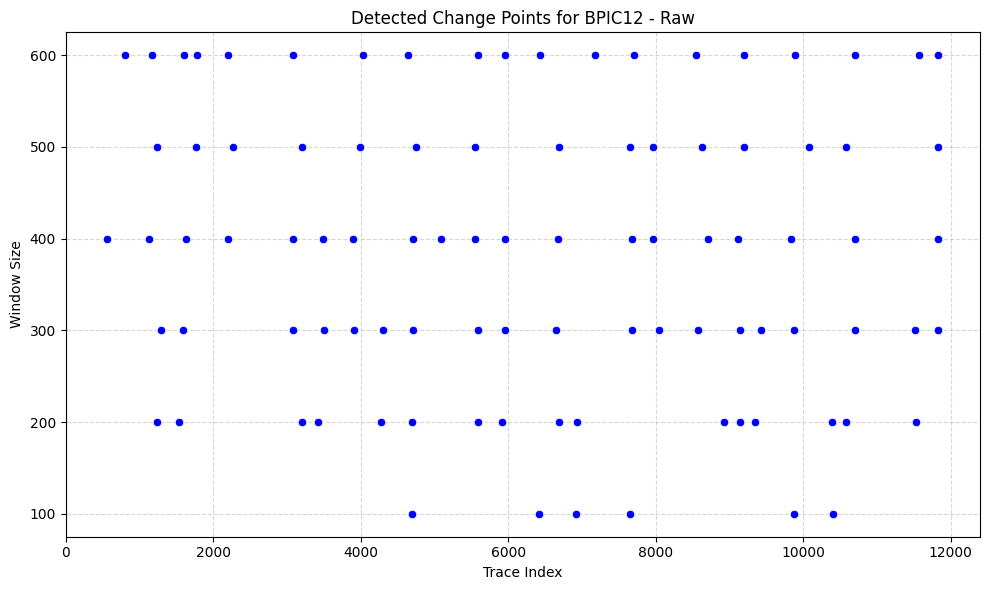

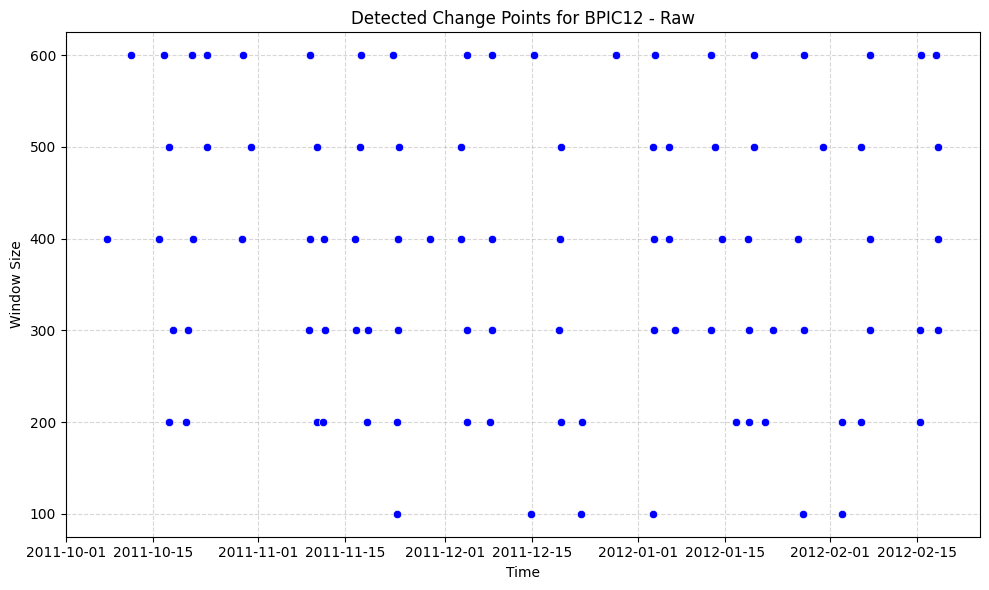

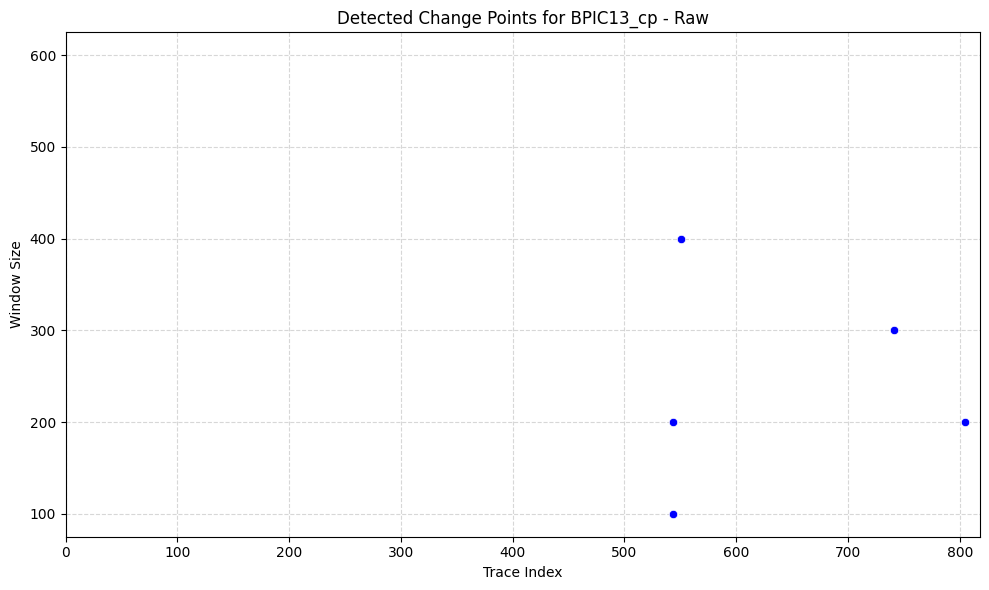

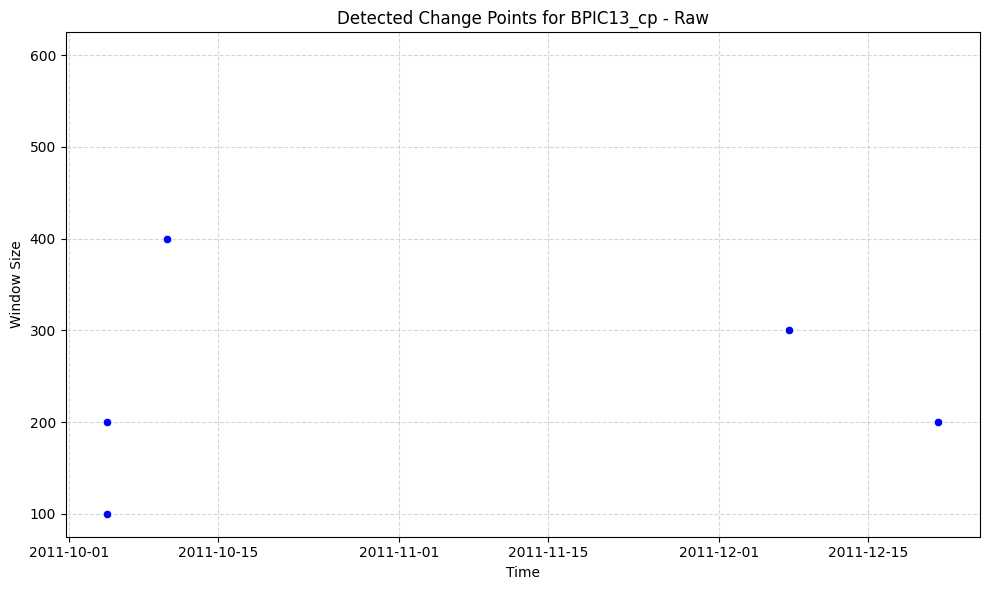

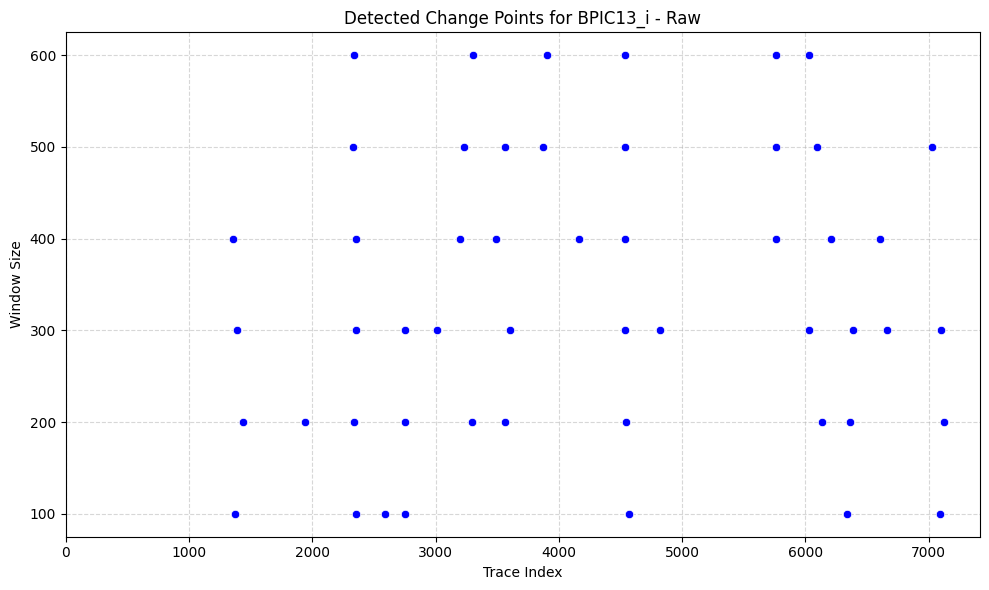

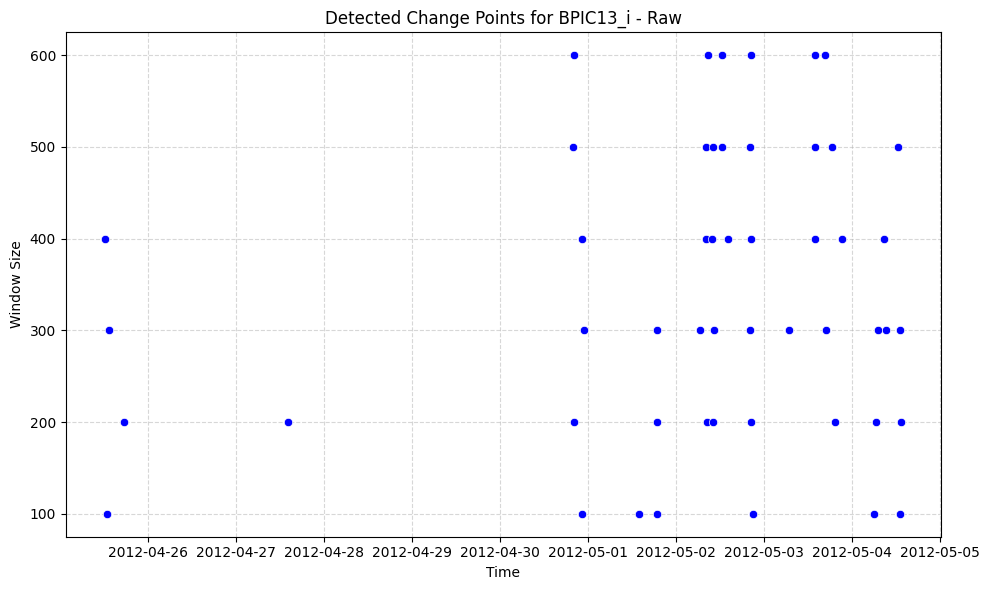

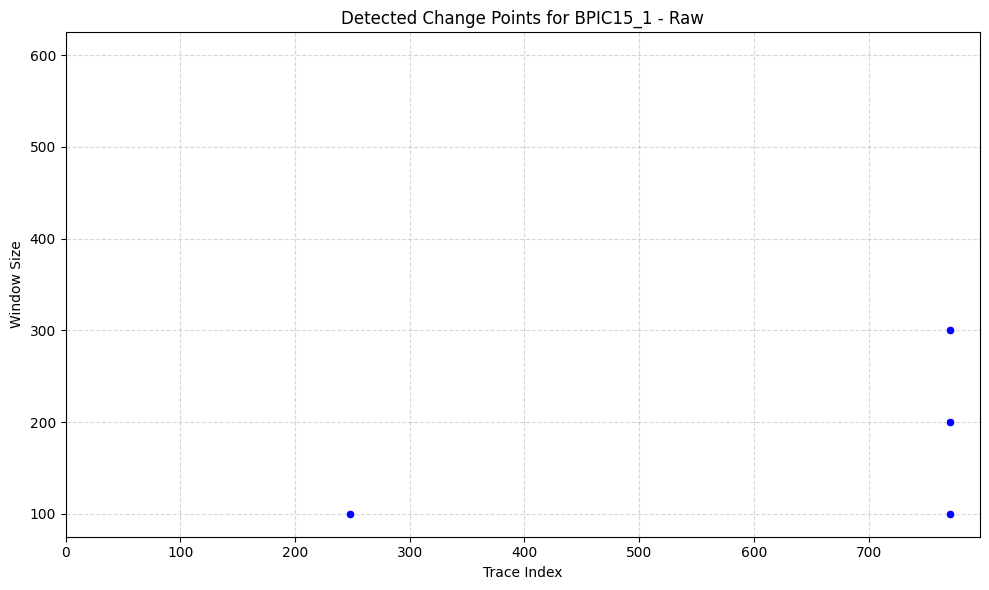

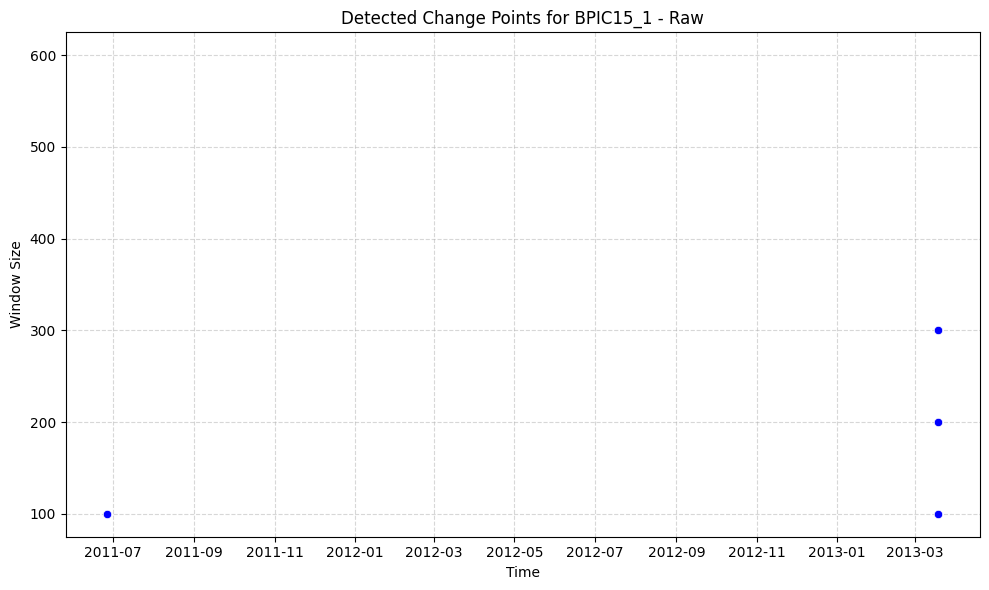

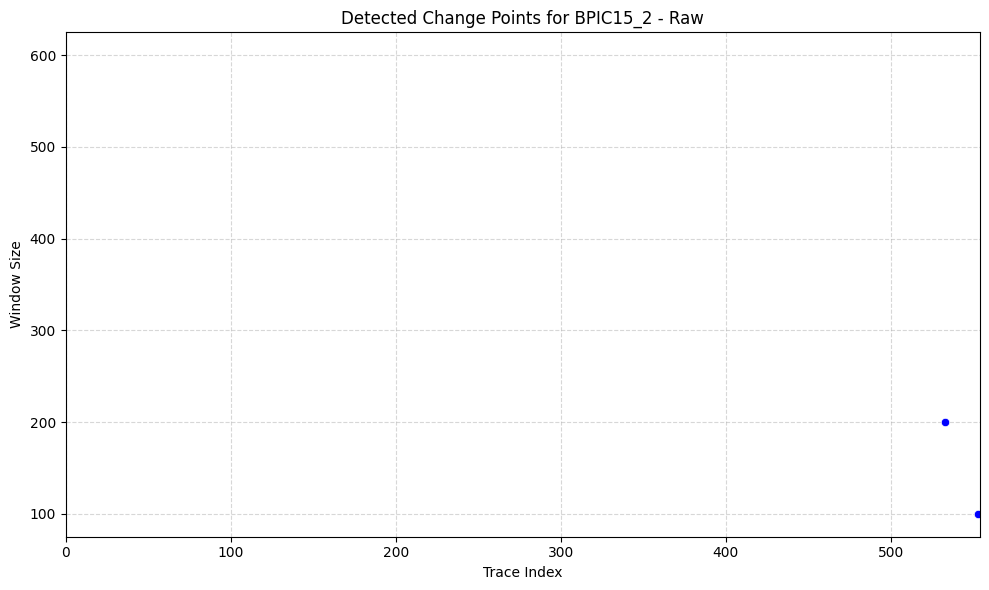

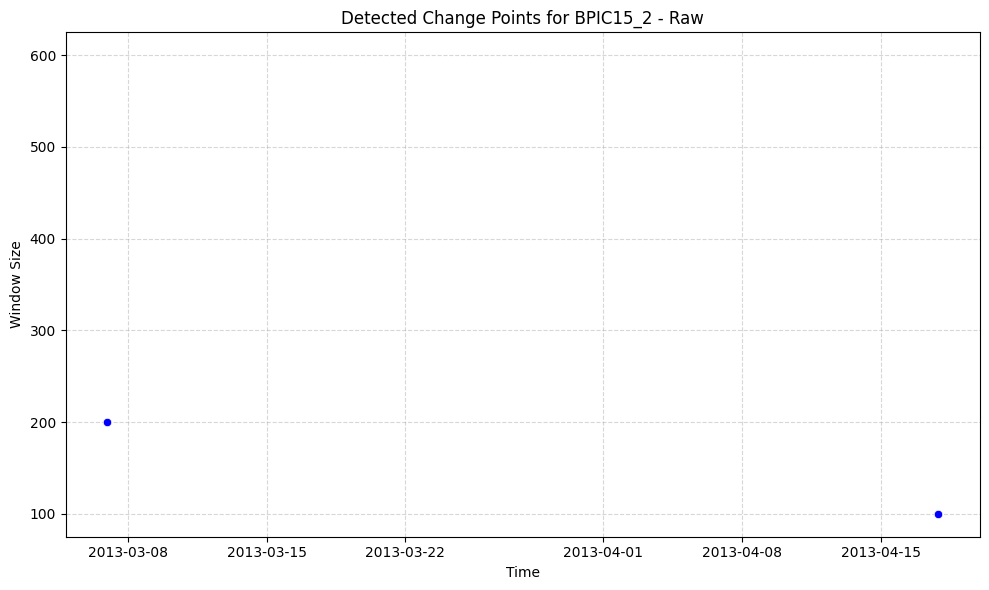

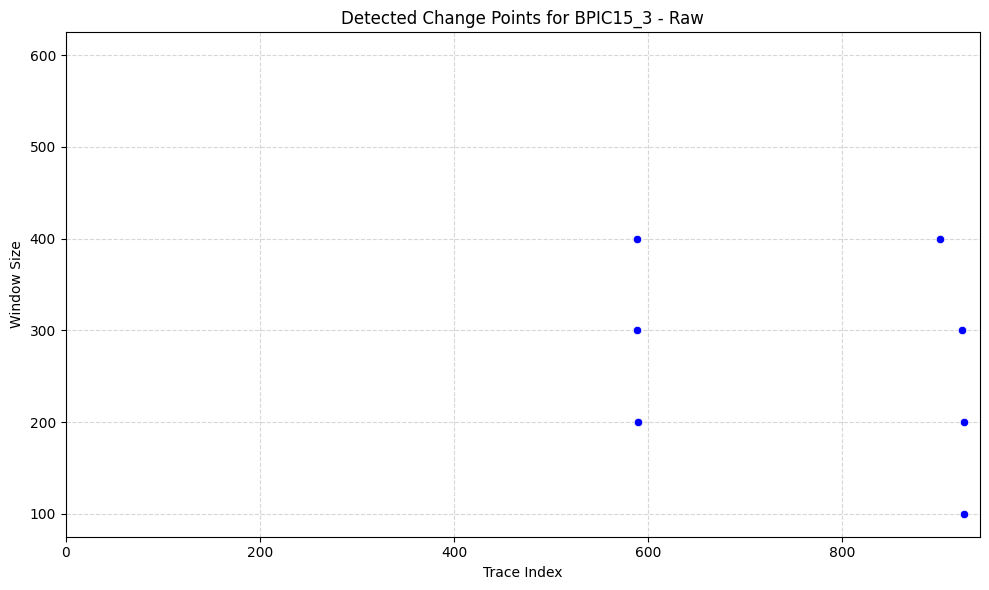

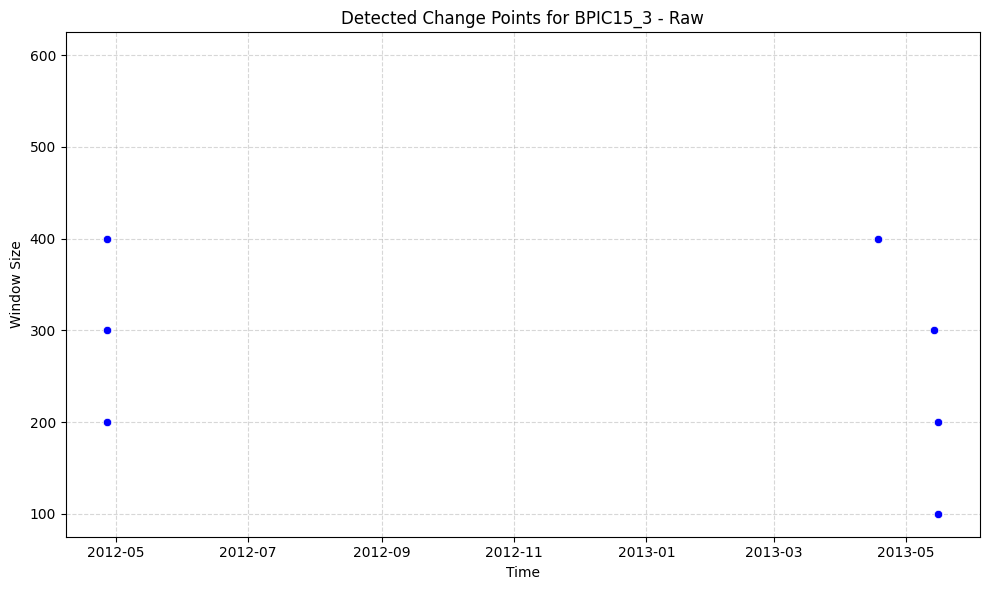

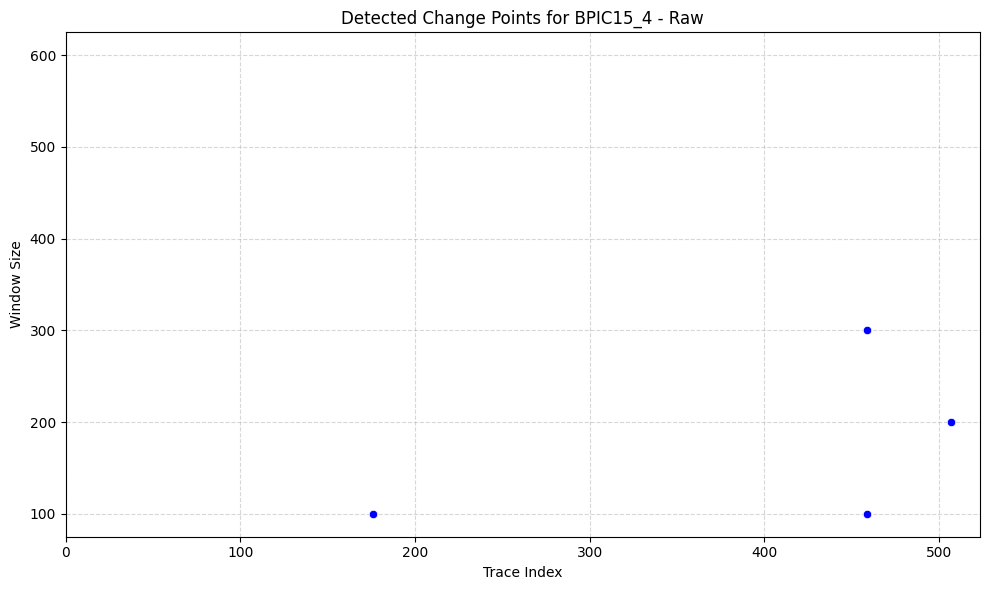

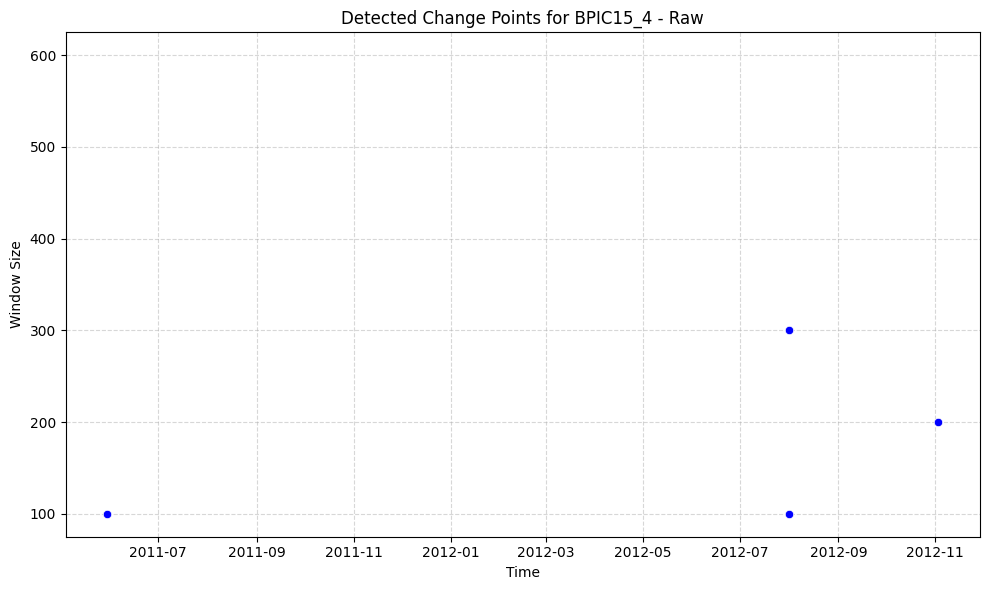

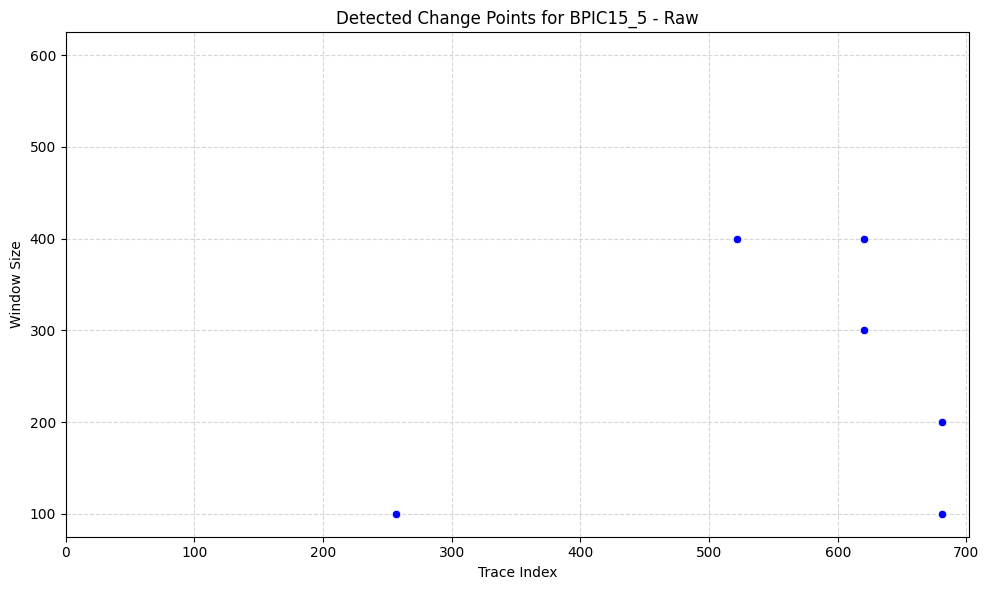

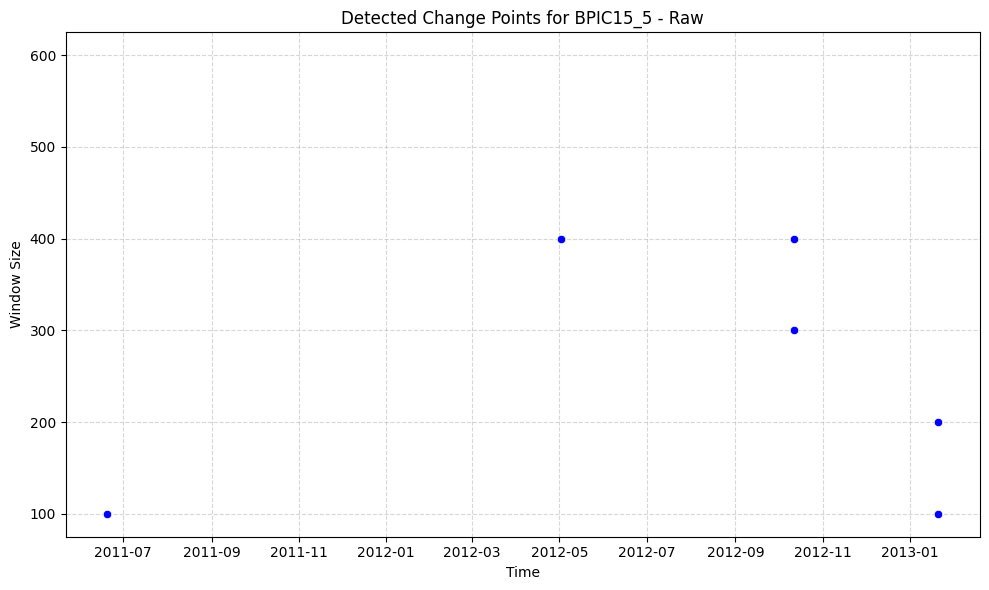

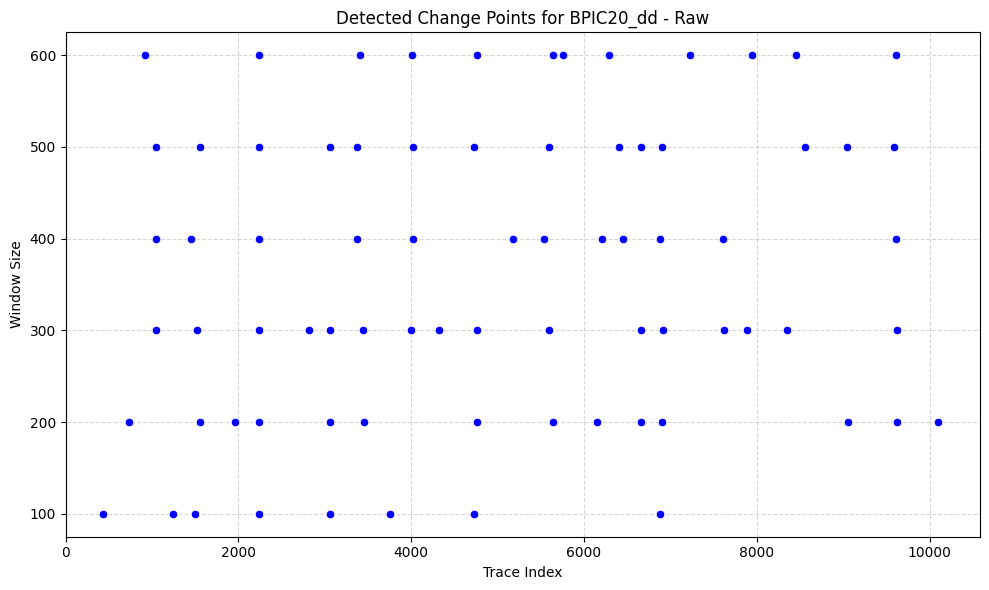

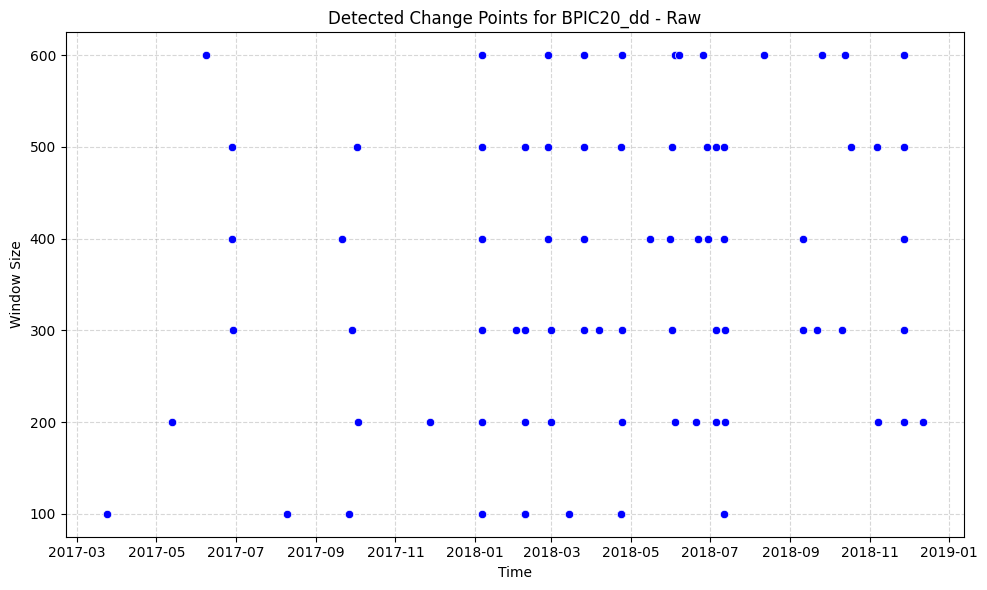

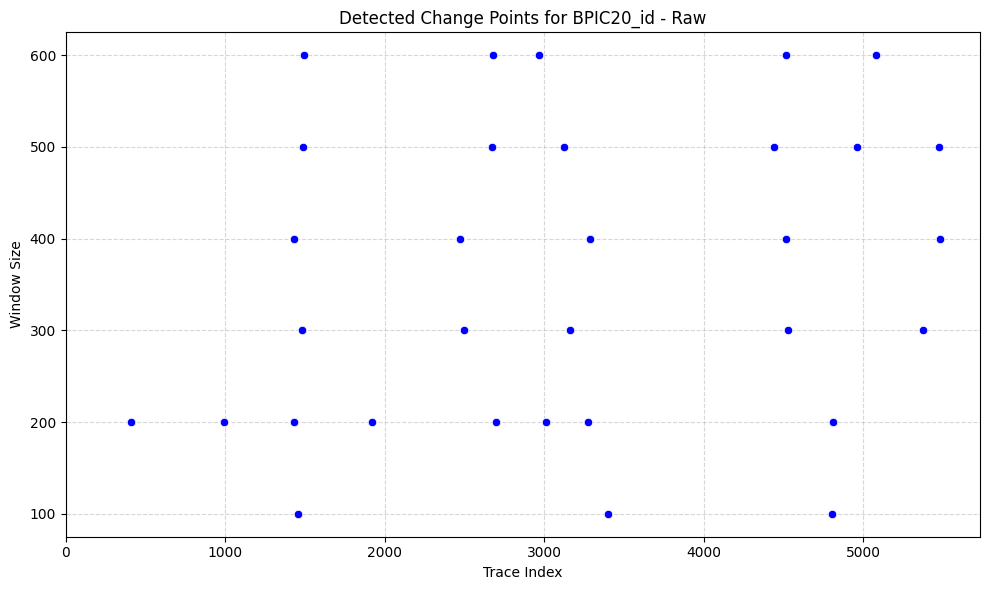

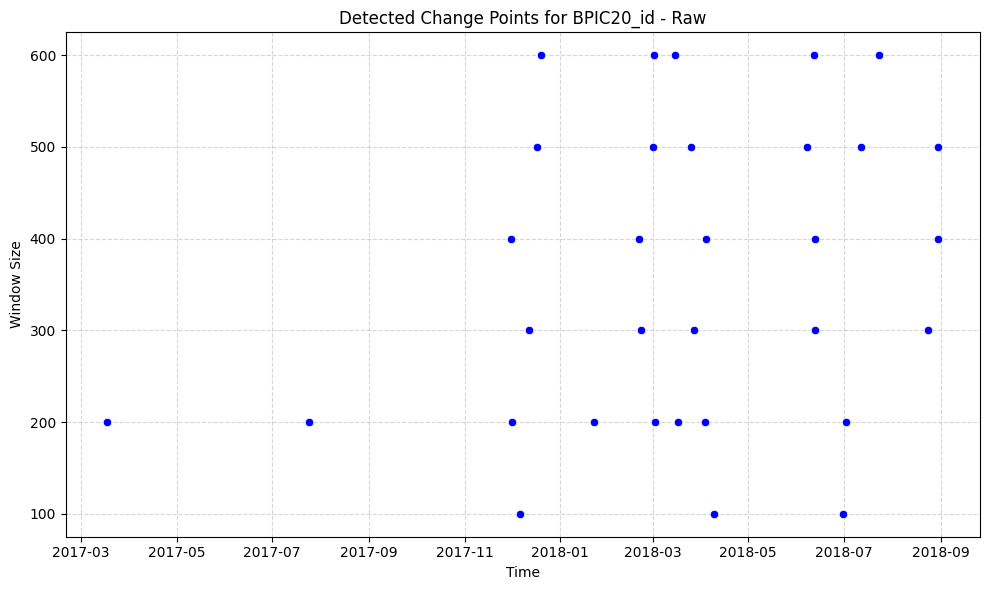

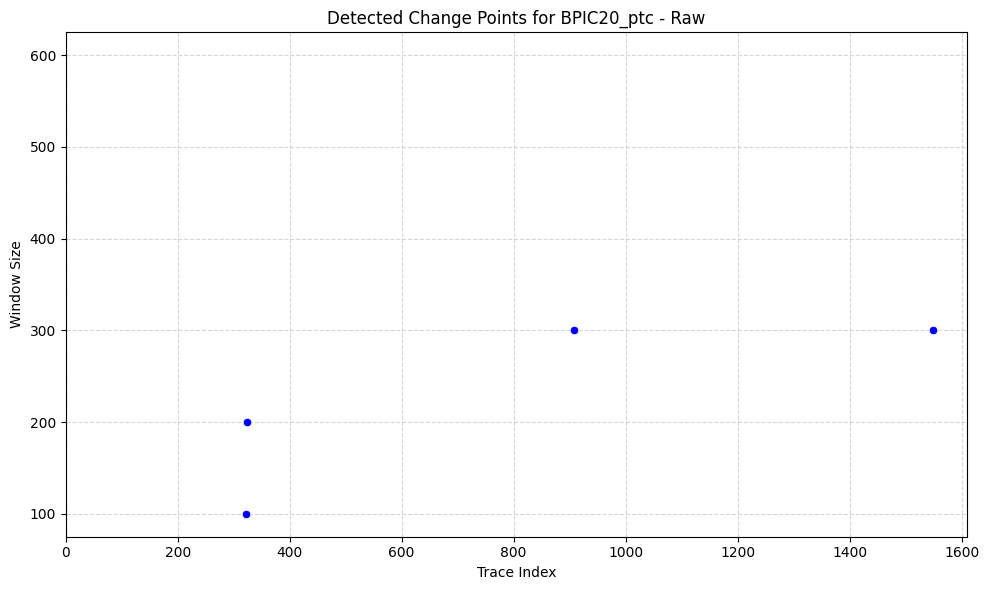

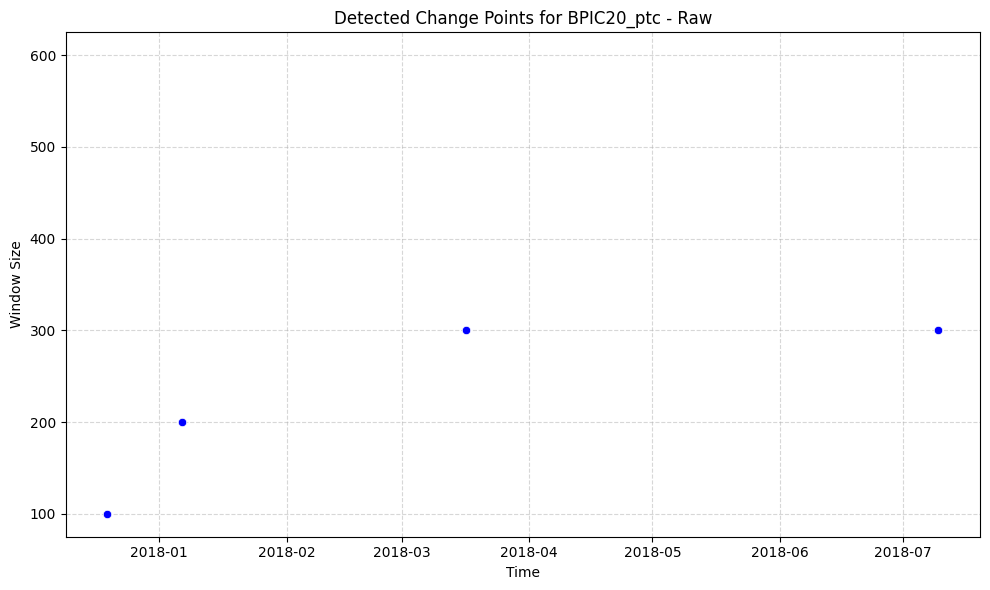

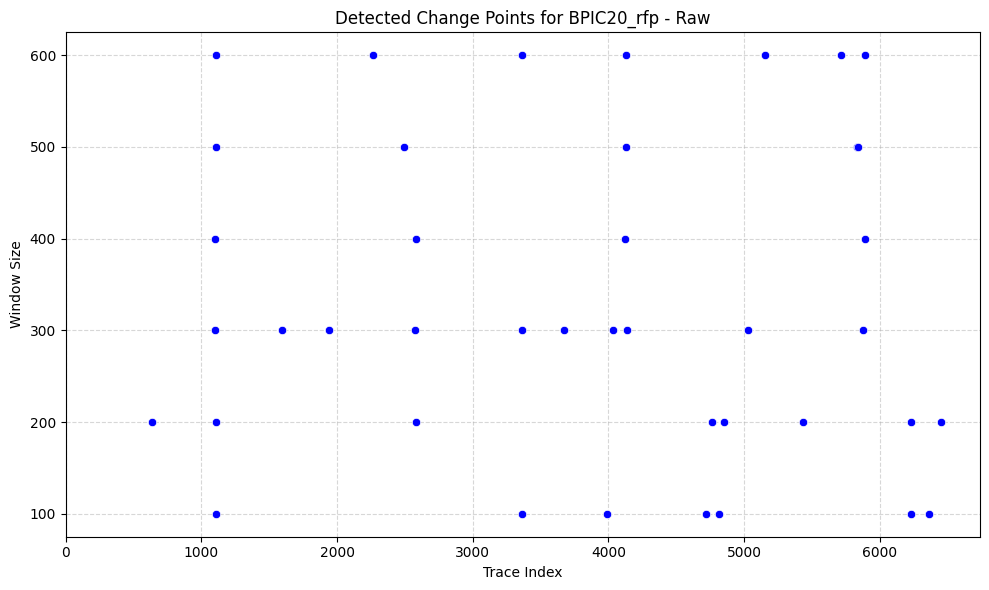

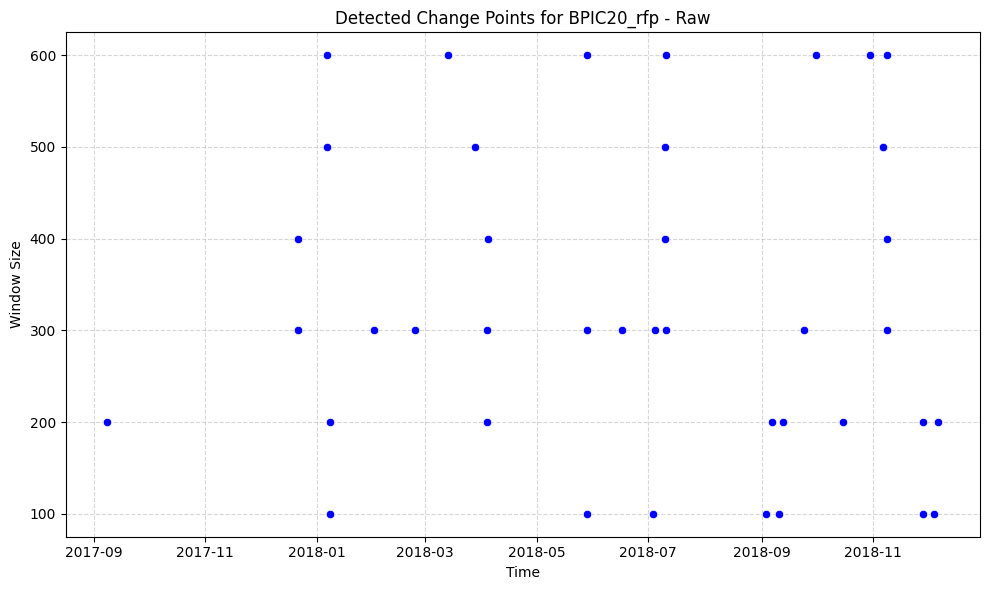

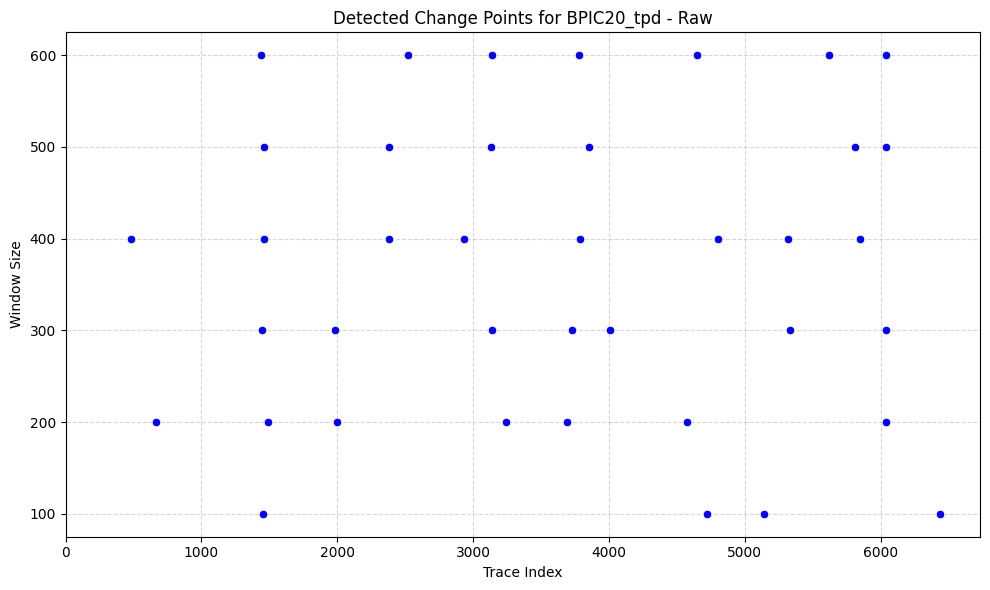

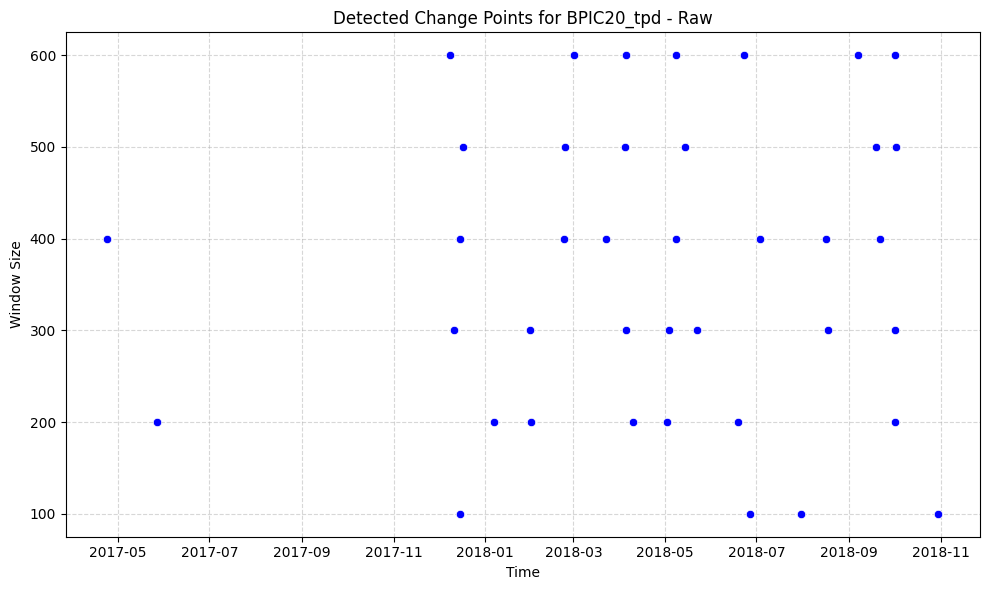

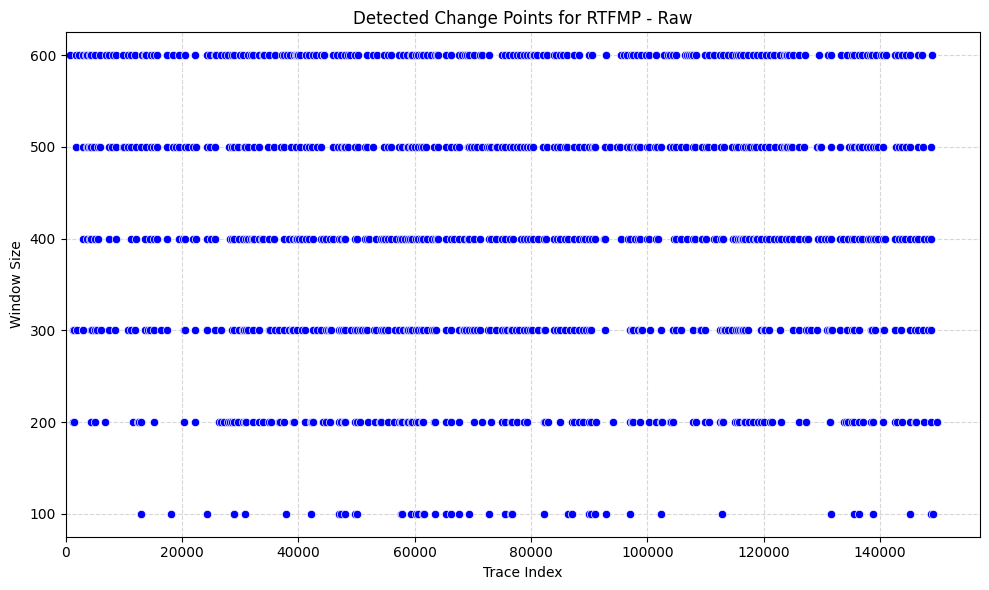

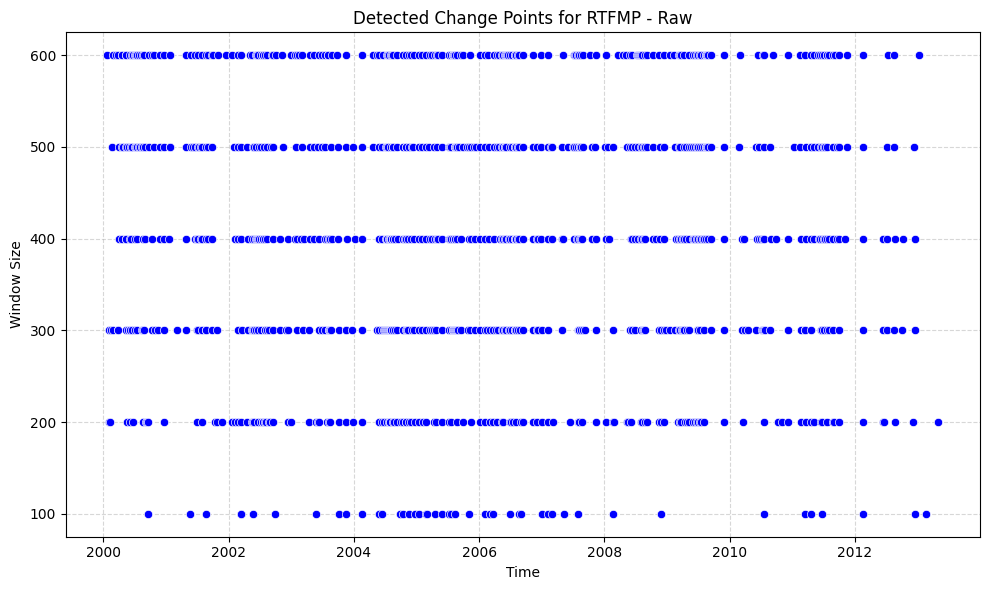

In [141]:
dd_results_df_copy = dd_results_df.copy()

datasets = dd_results_df_copy['dataset'].unique()
dd_results_df_copy['configuration'] = dd_results_df_copy['configuration'].apply(lambda x: int(x[3:]))

for dataset in datasets:
    dd_results_df_copy_dataset_df = dd_results_df_copy[dd_results_df_copy['dataset'] == dataset]
    plot_change_points(dataset, dd_results_df_copy_dataset_df, input_type='dataframe', config_column_in_df='configuration', y_axis_label="Window Size", configuration_labels=window_sizes, title_suffix="Raw", x_axis='change_point')
    plot_change_points(dataset, dd_results_df_copy_dataset_df, input_type='dataframe', config_column_in_df='configuration', y_axis_label="Window Size", configuration_labels=window_sizes, title_suffix="Raw", x_axis='change_moment')


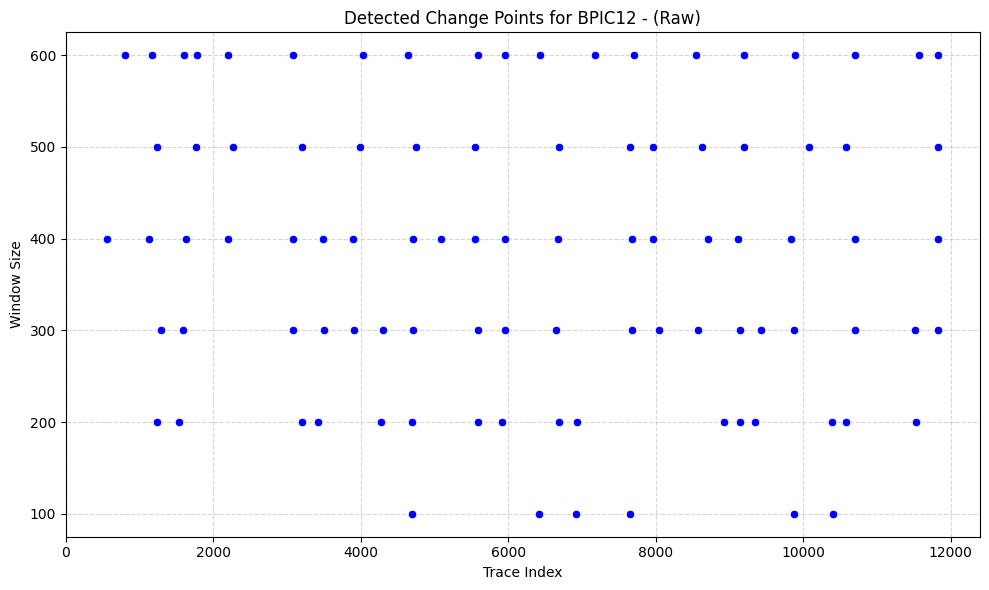

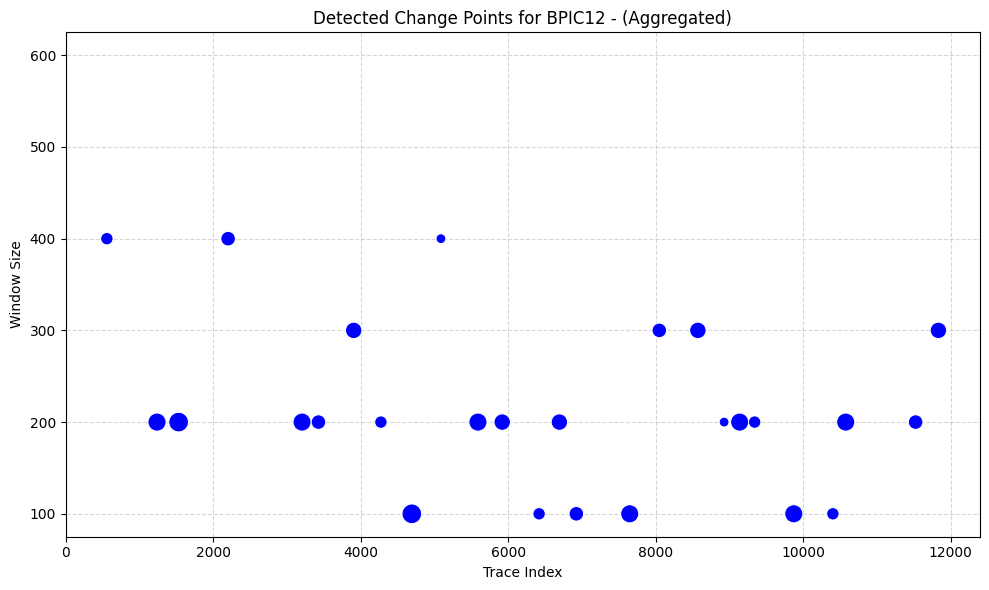

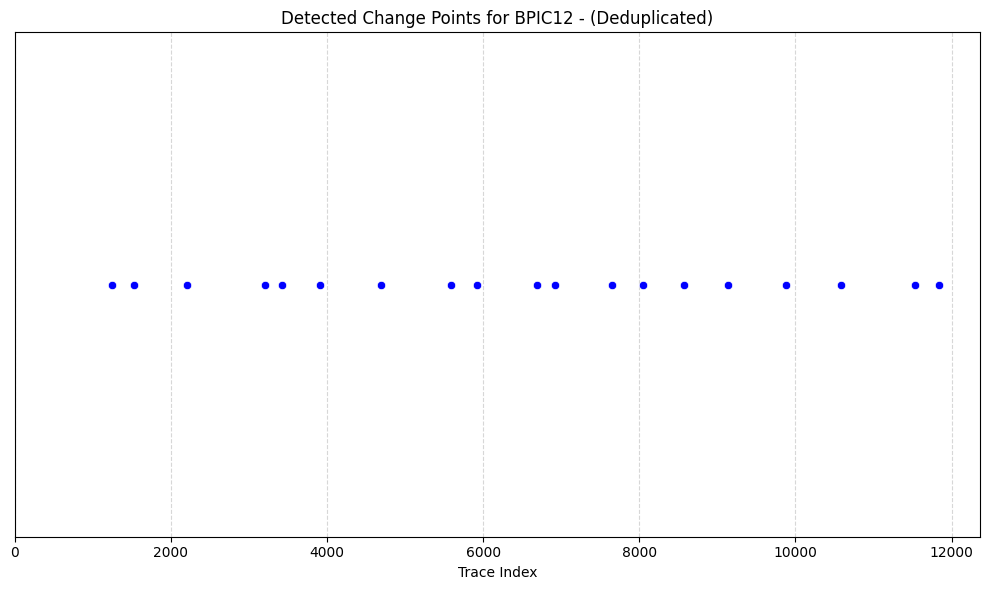

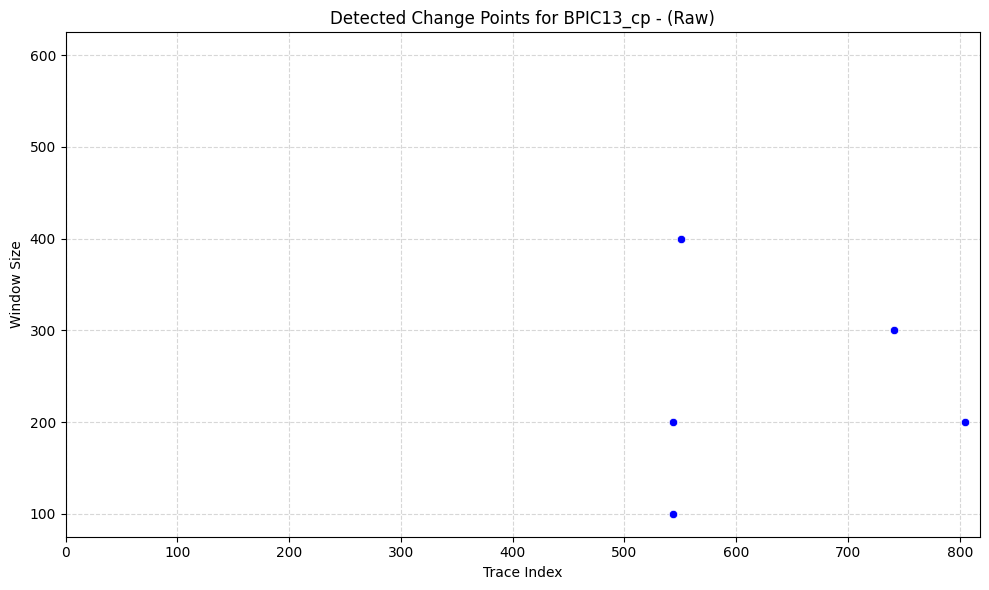

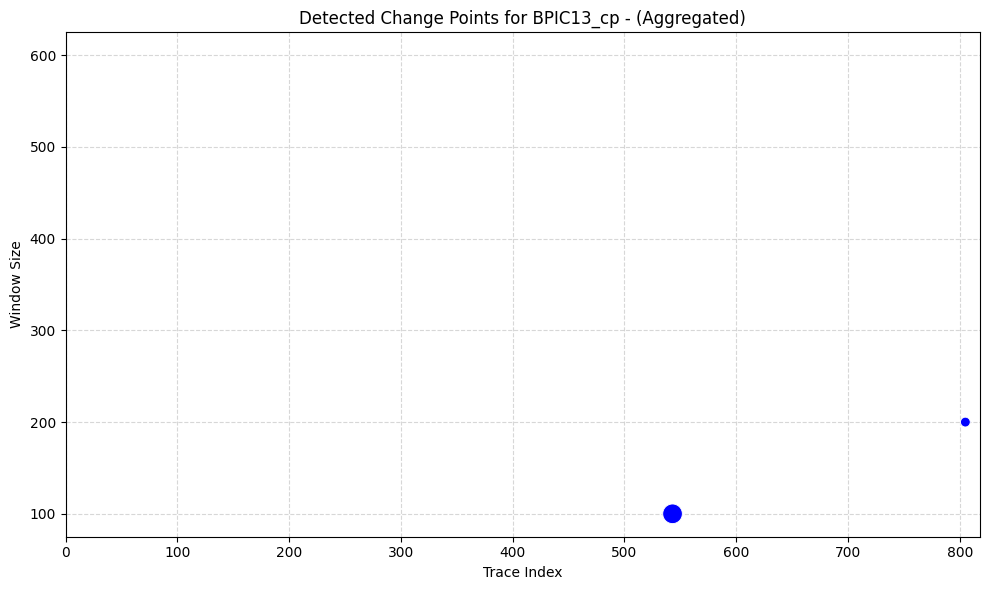

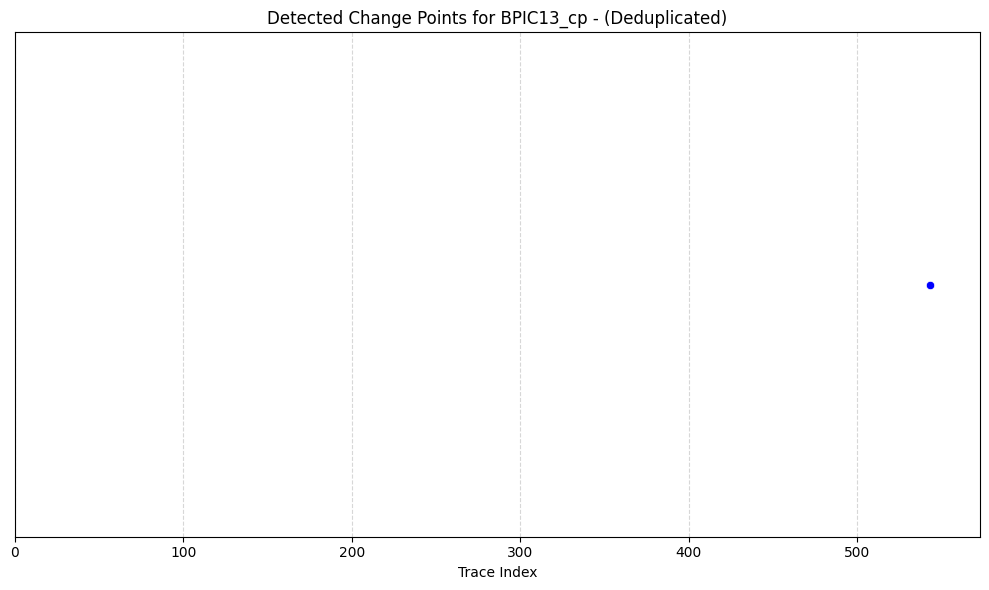

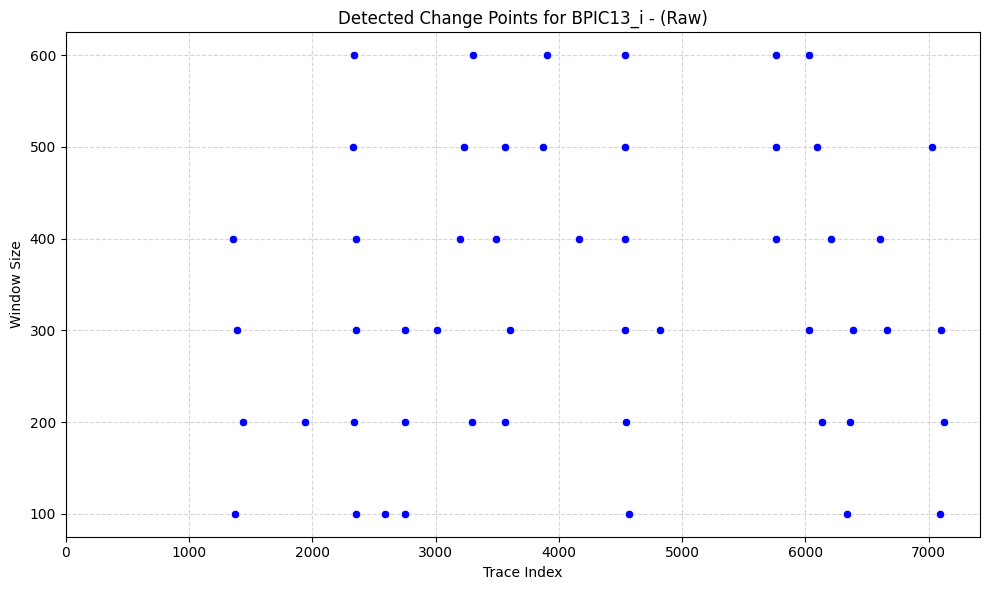

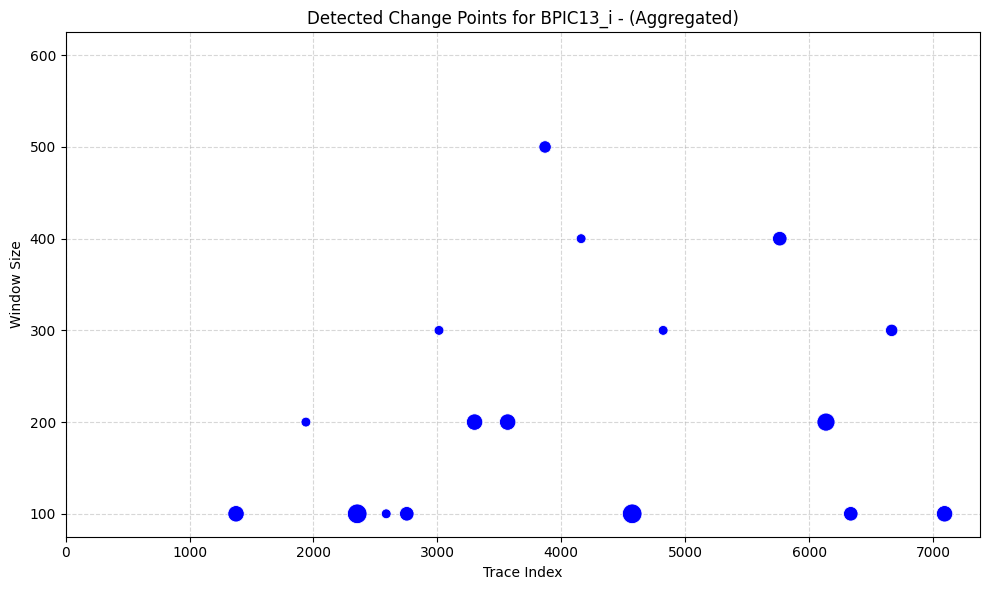

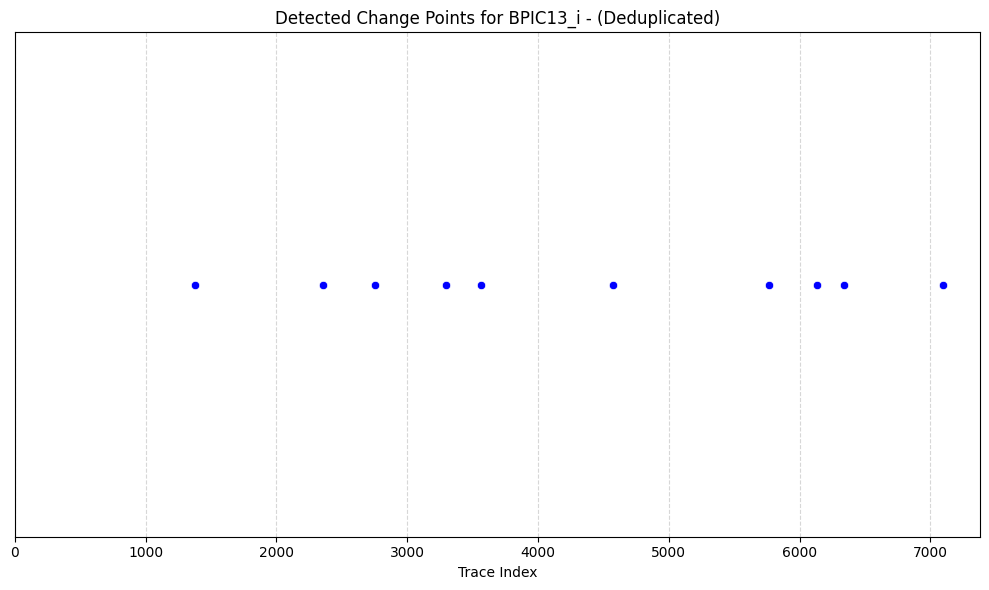

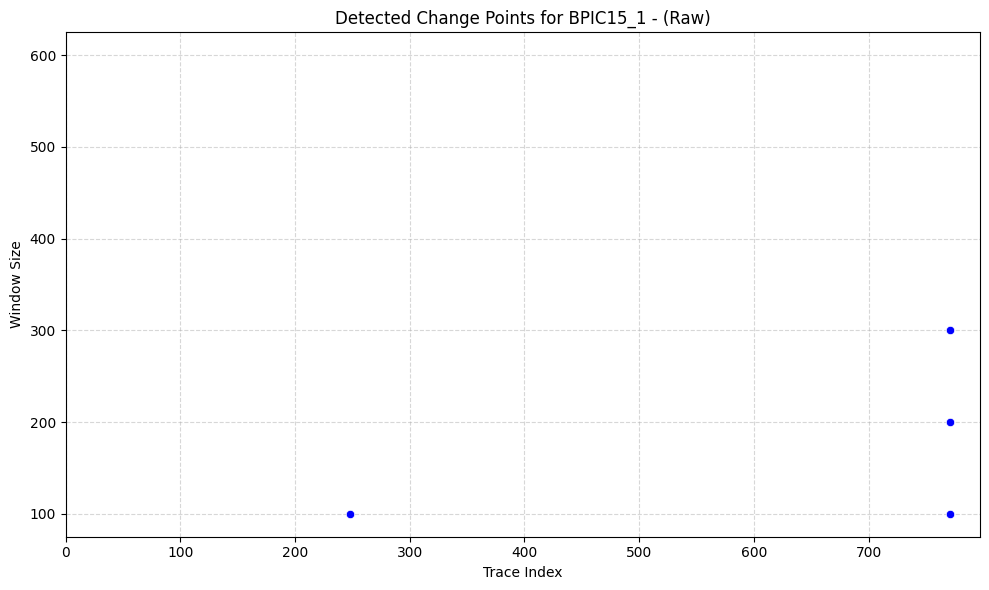

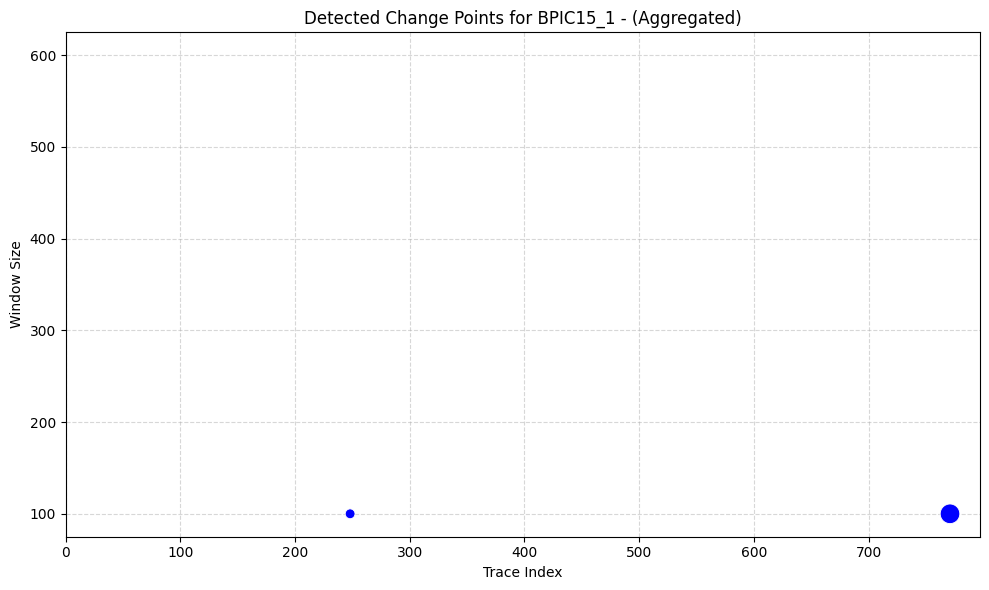

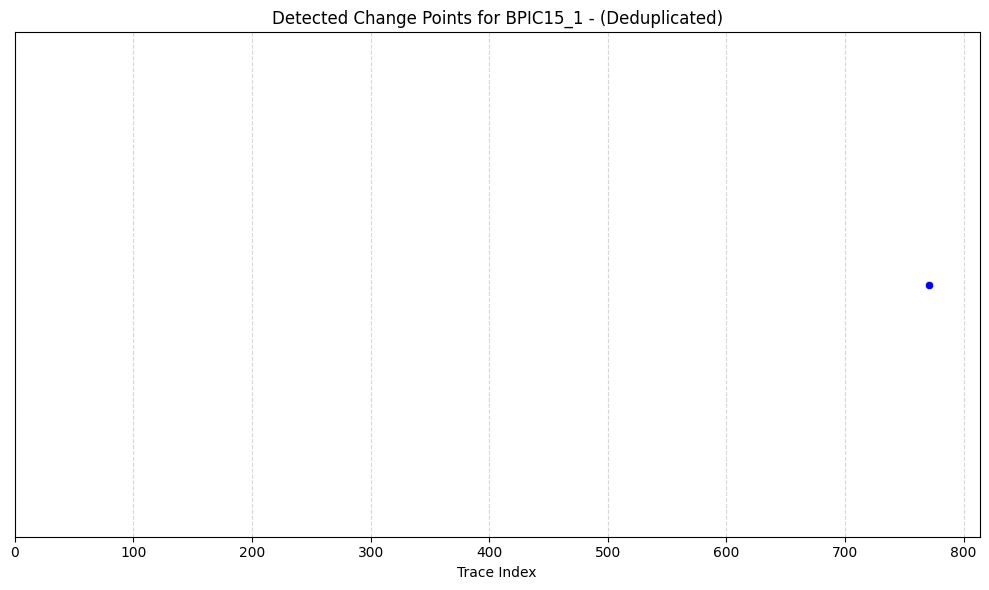

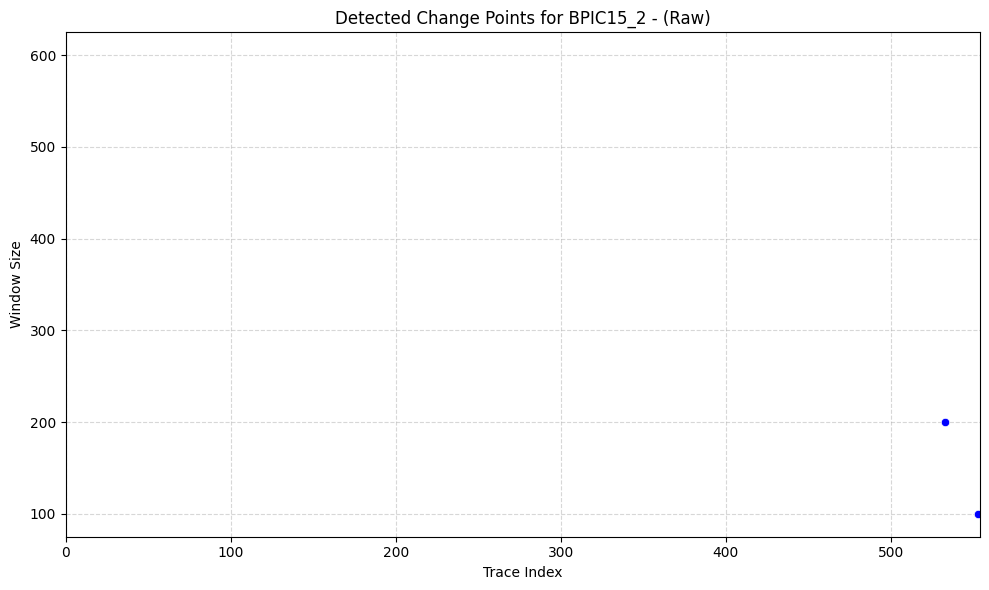

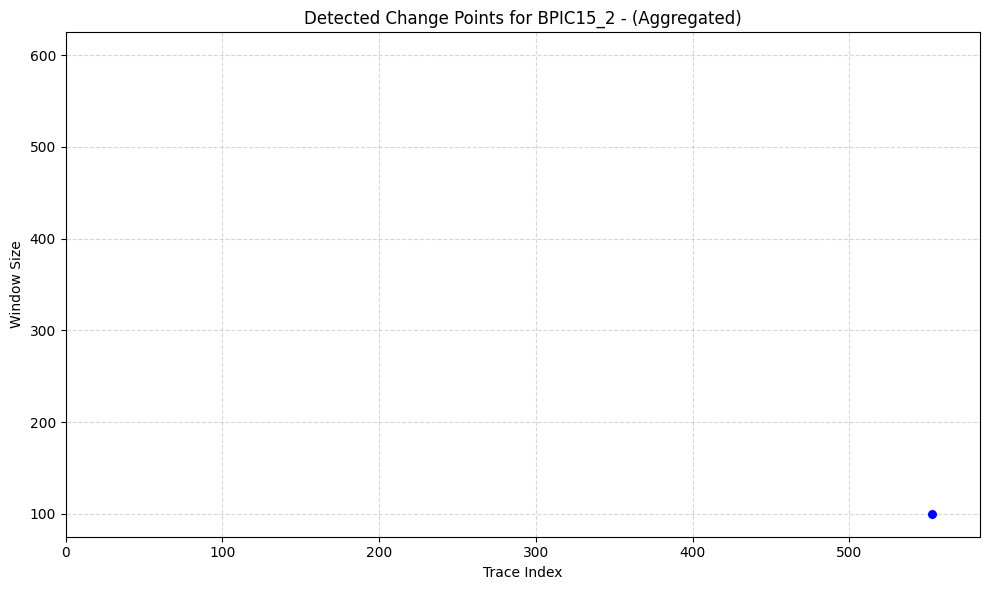

[INFO] No change points to plot for dataset BPIC15_2.


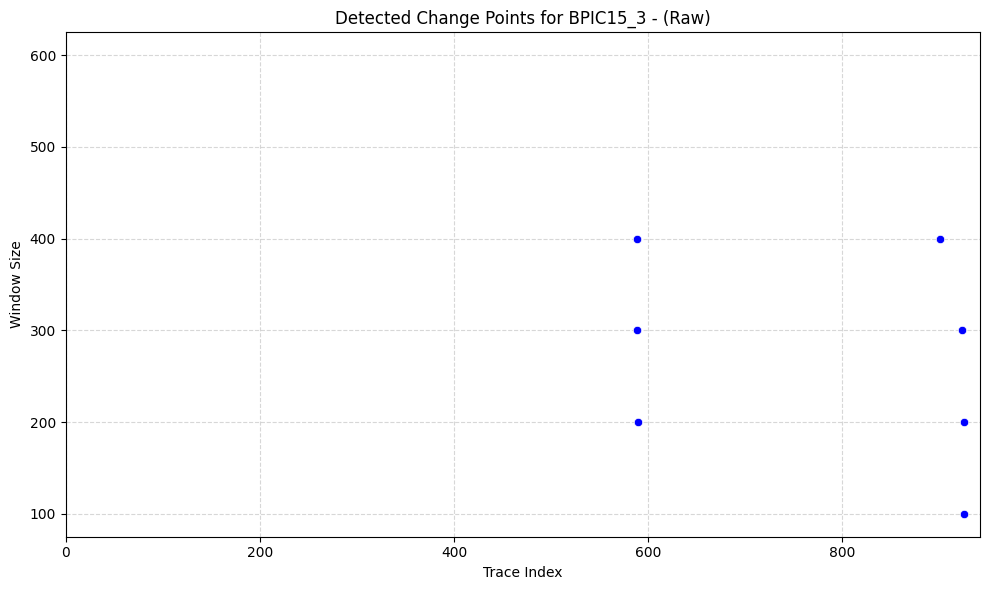

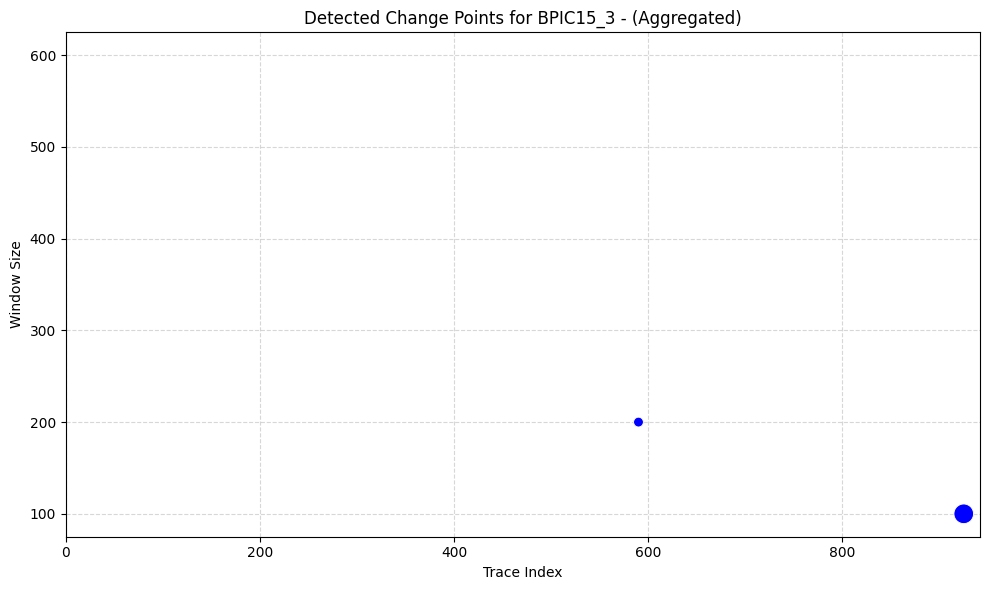

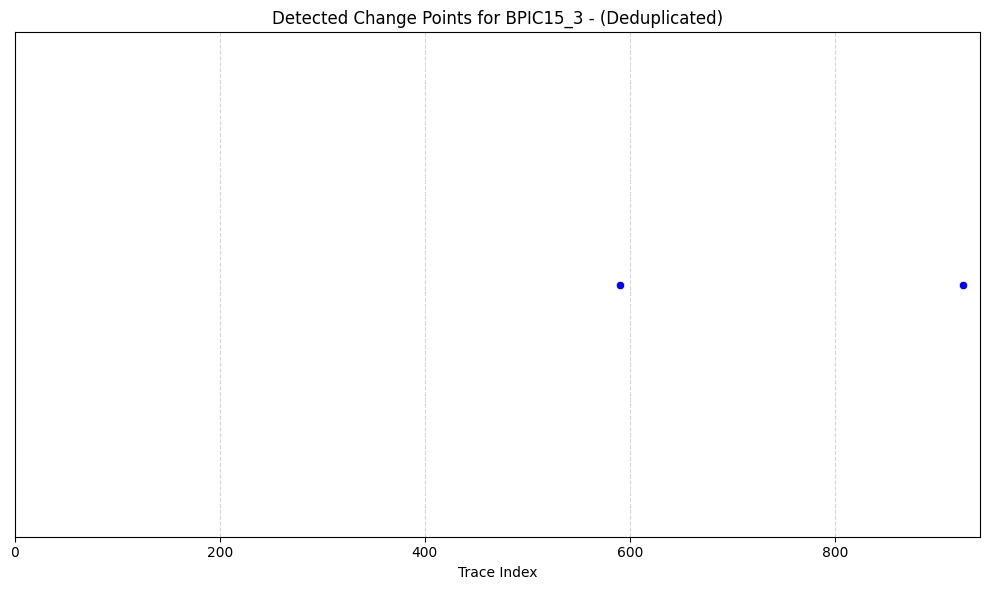

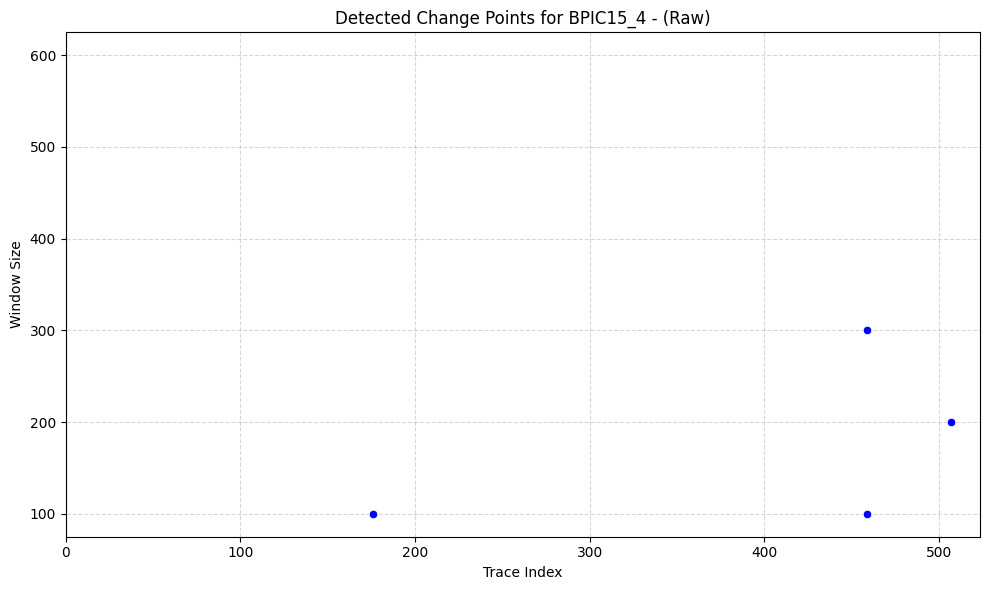

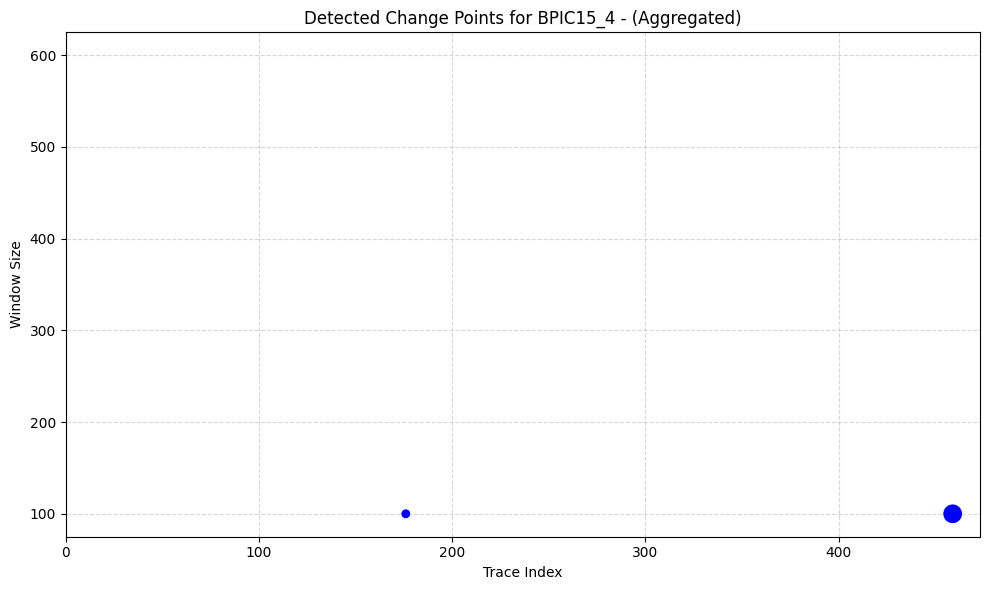

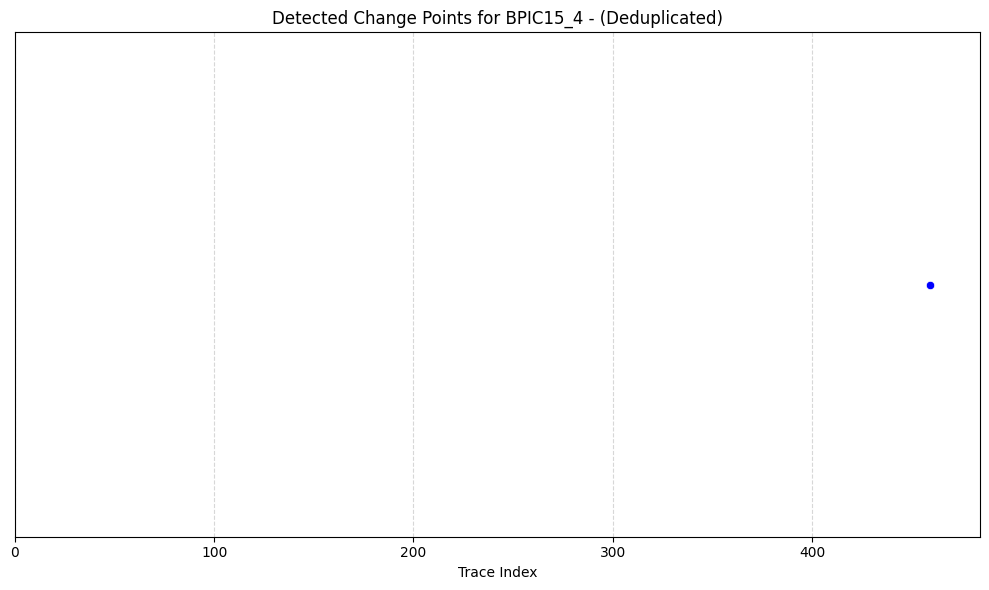

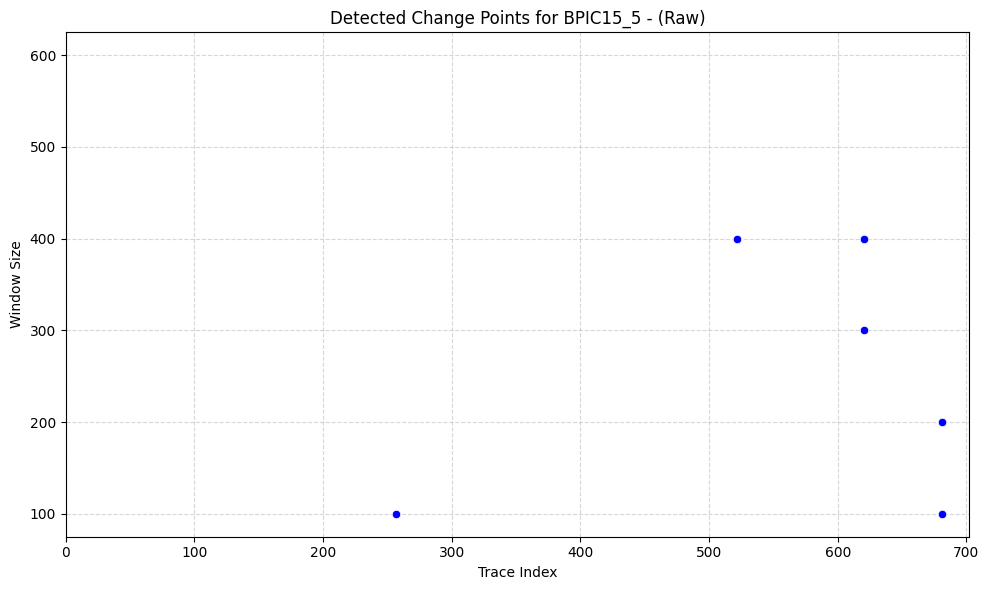

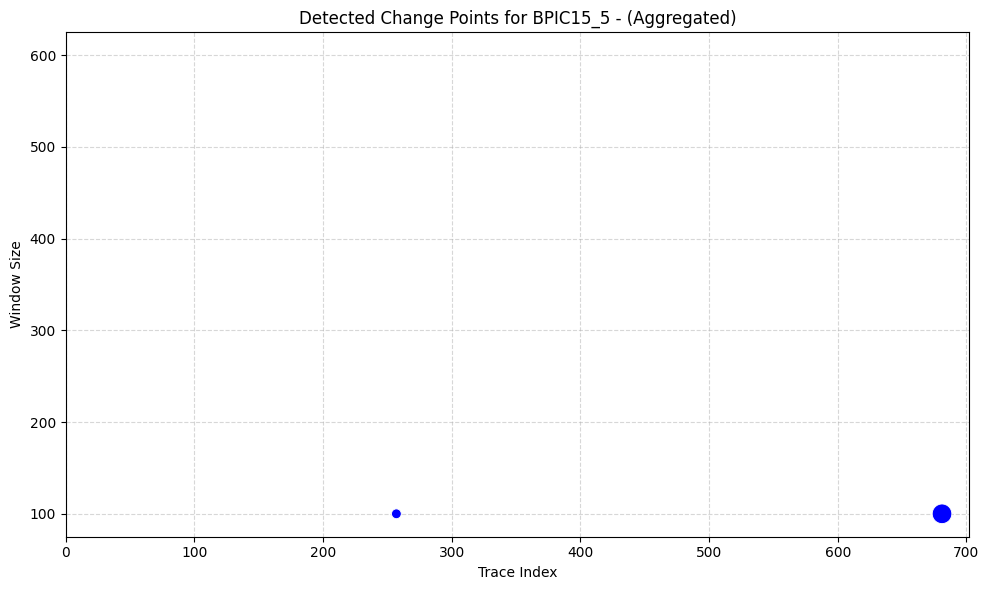

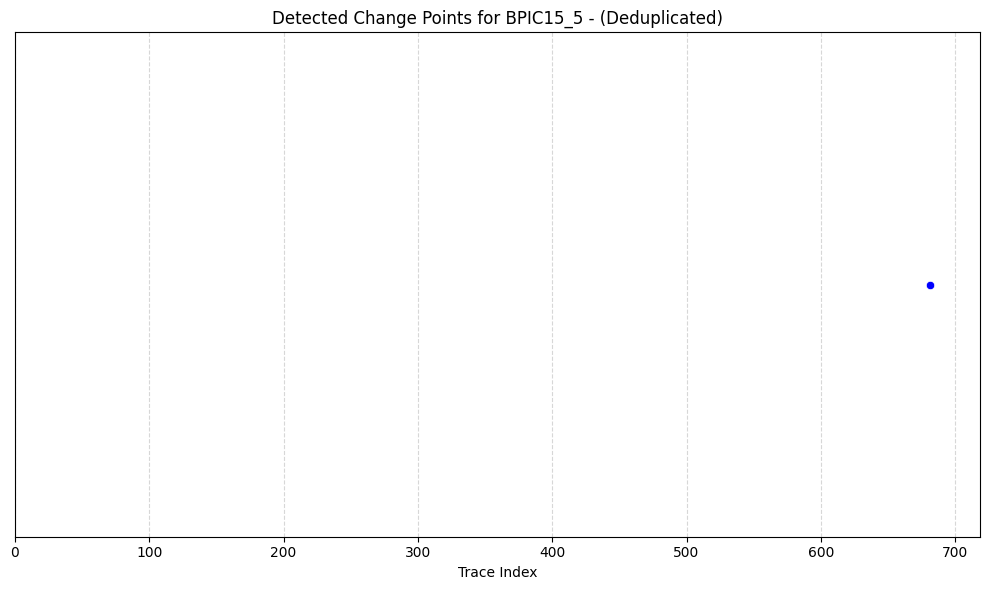

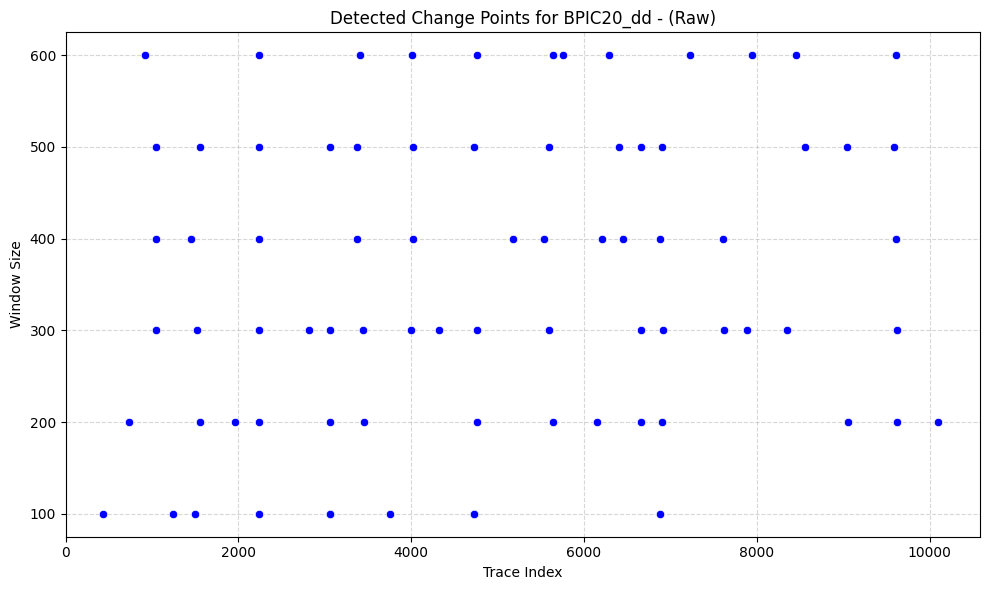

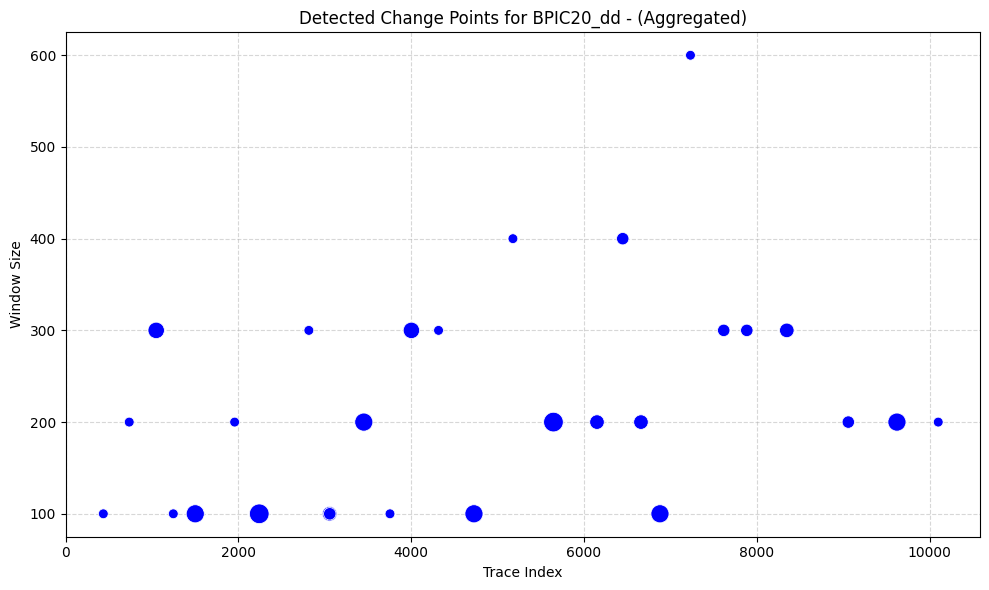

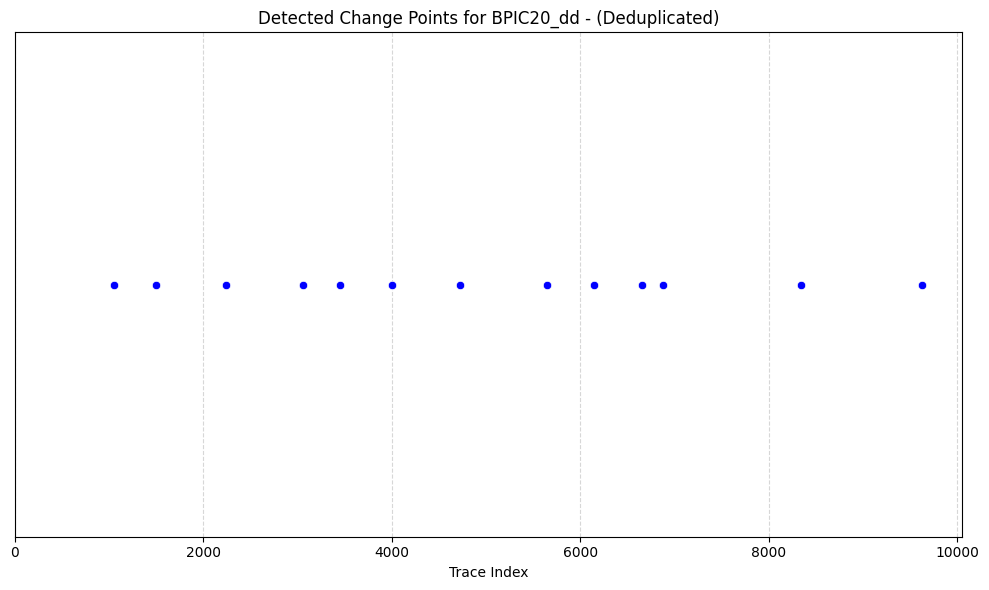

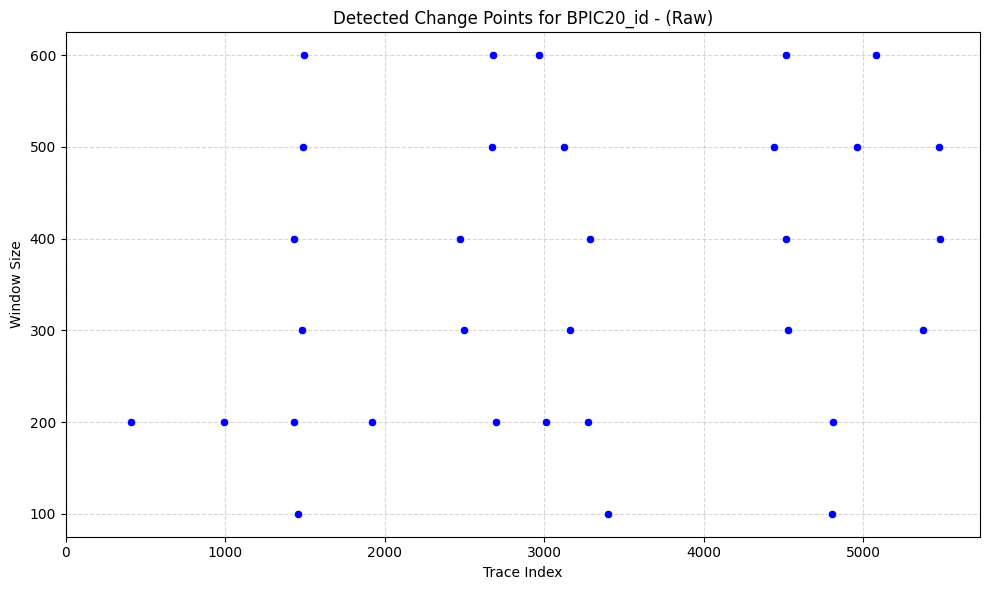

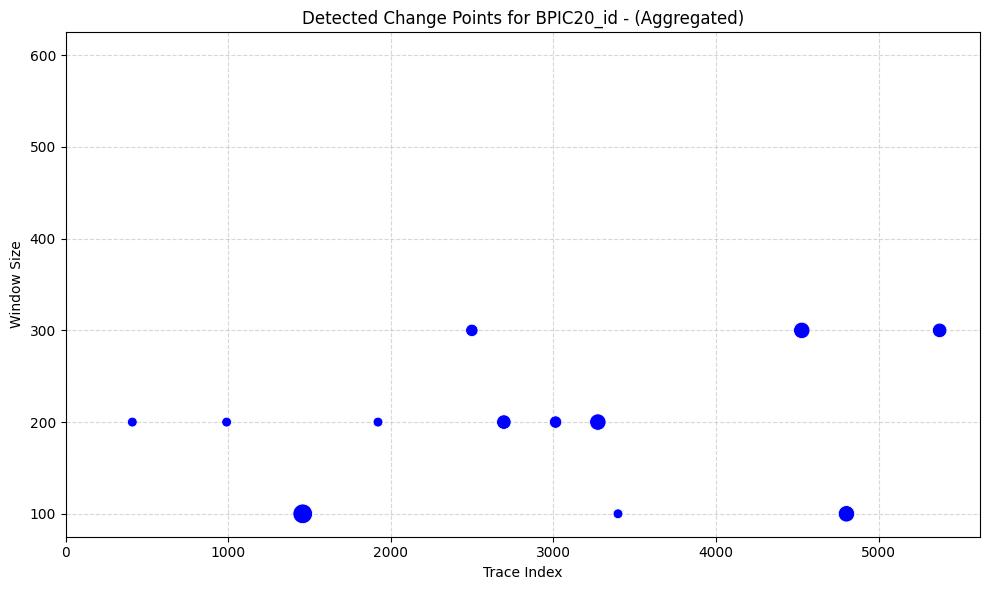

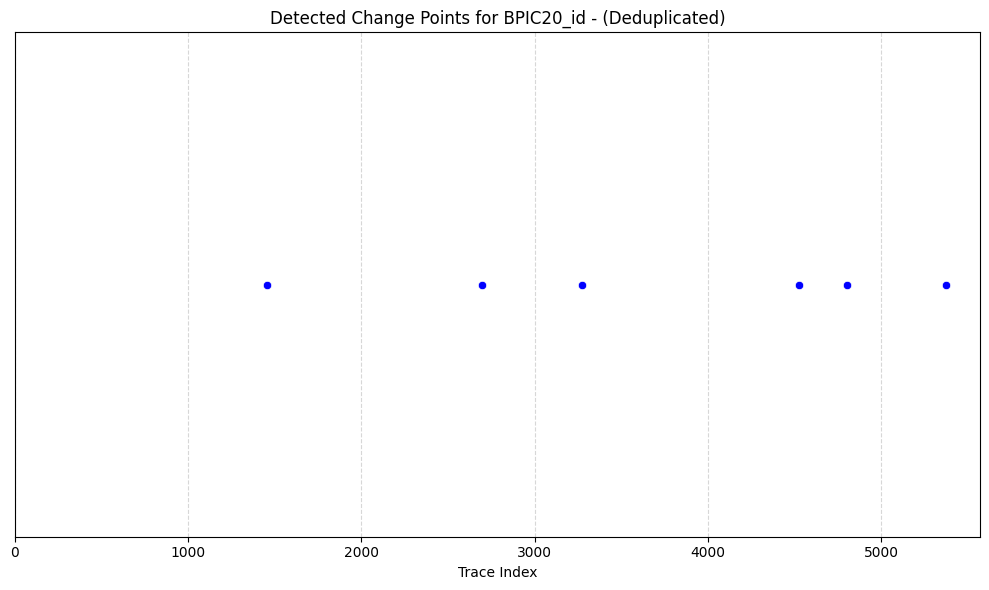

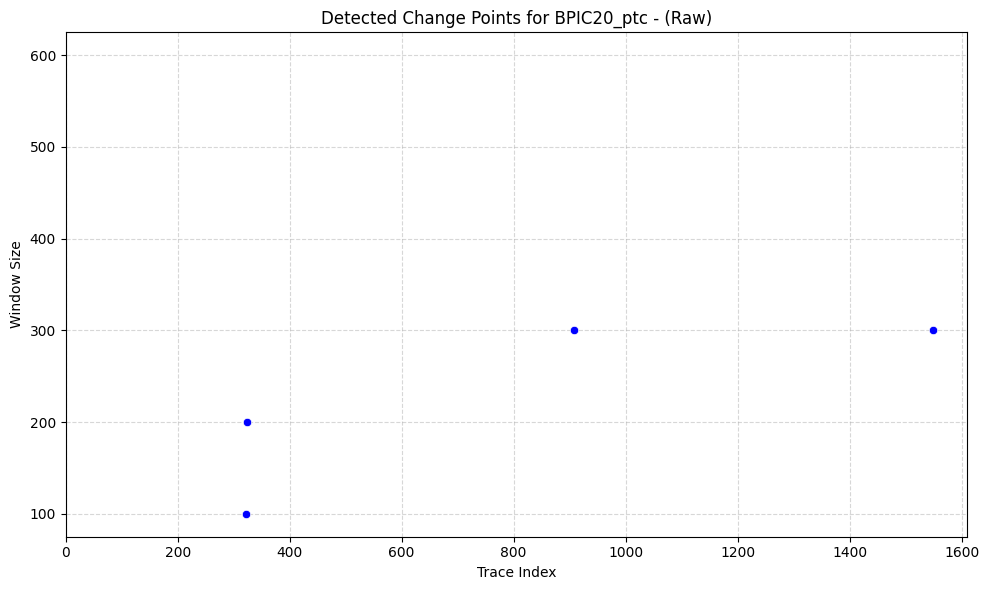

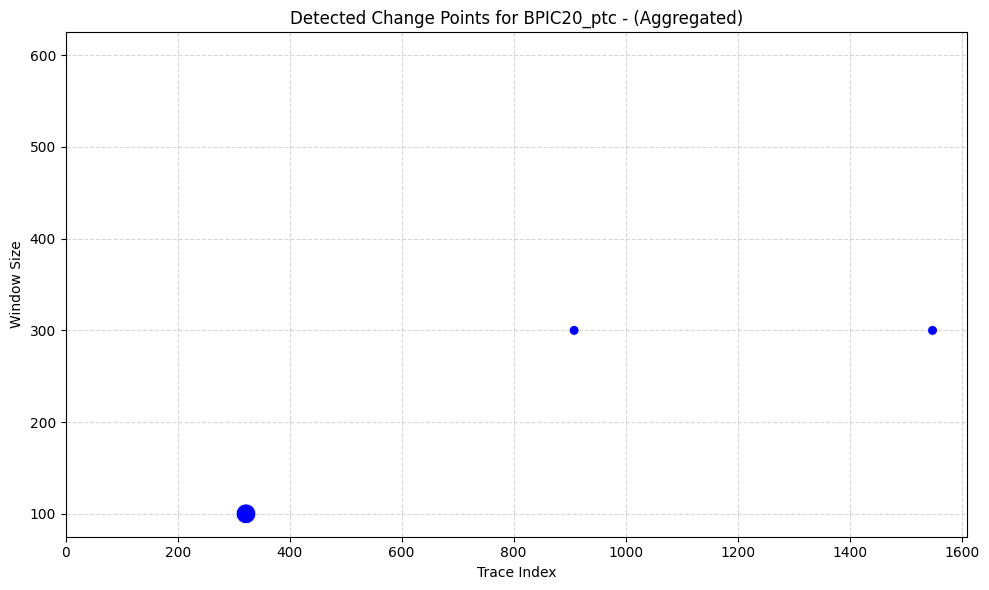

[INFO] No change points to plot for dataset BPIC20_ptc.


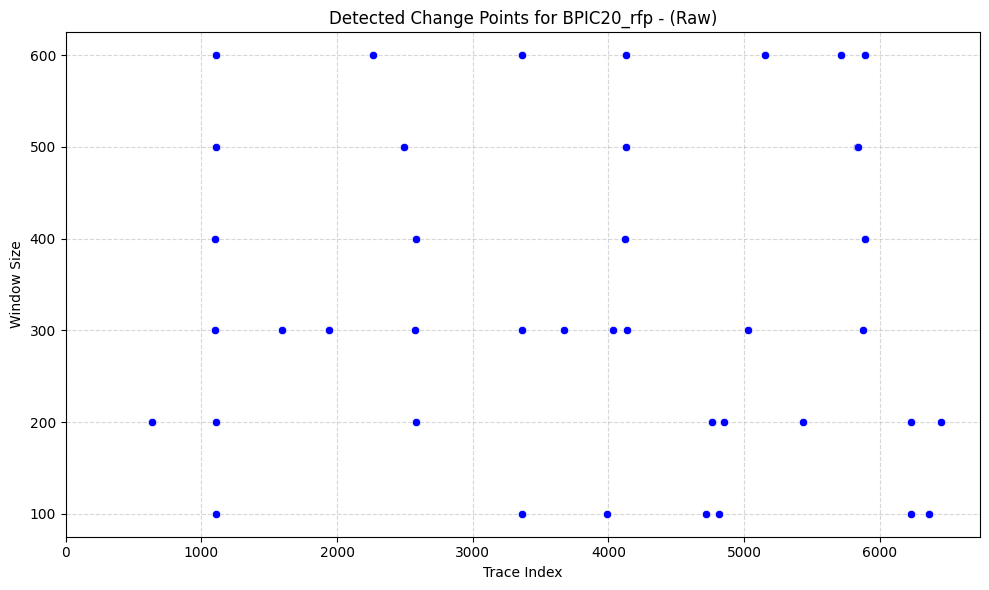

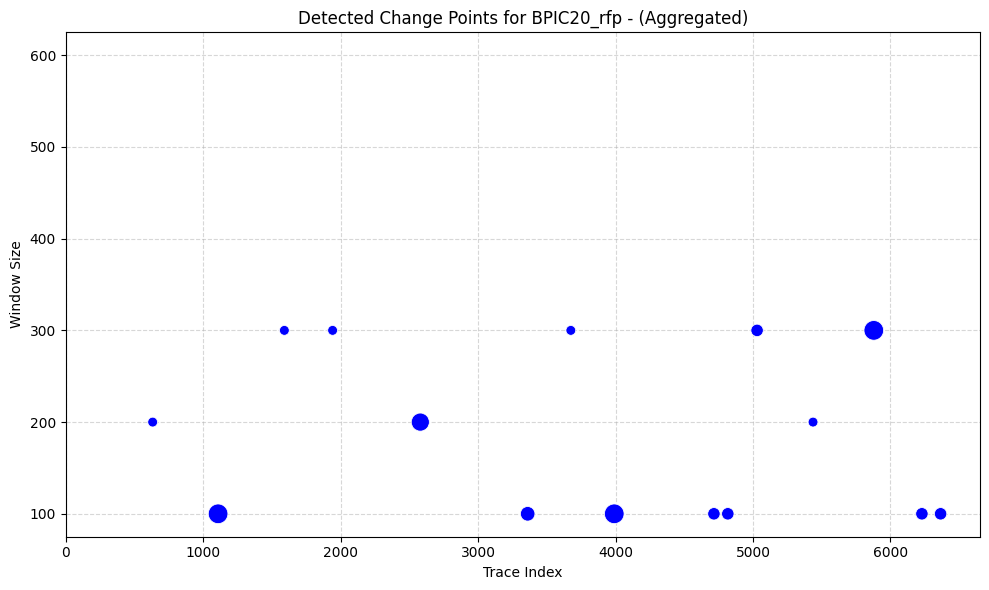

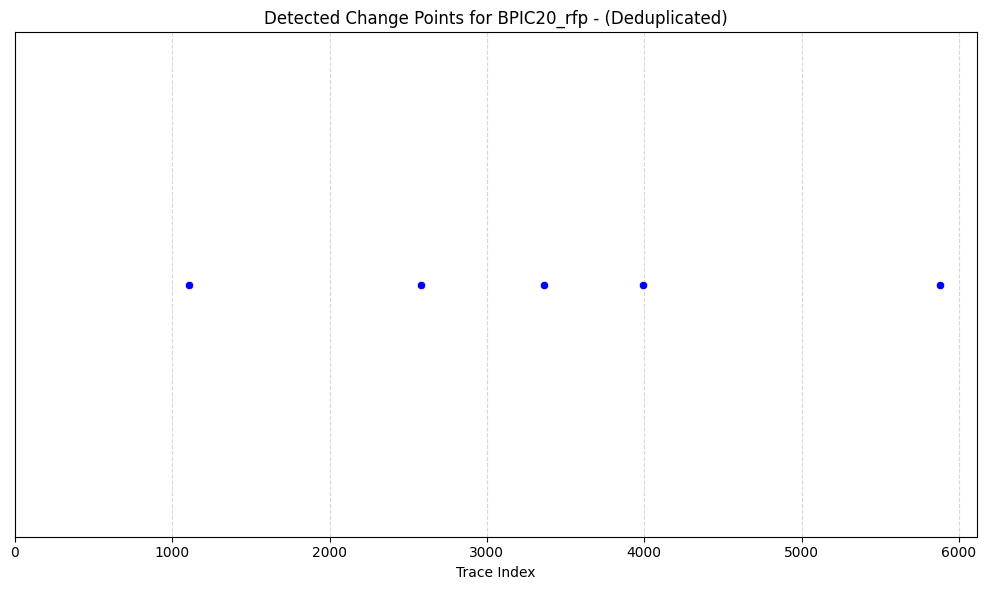

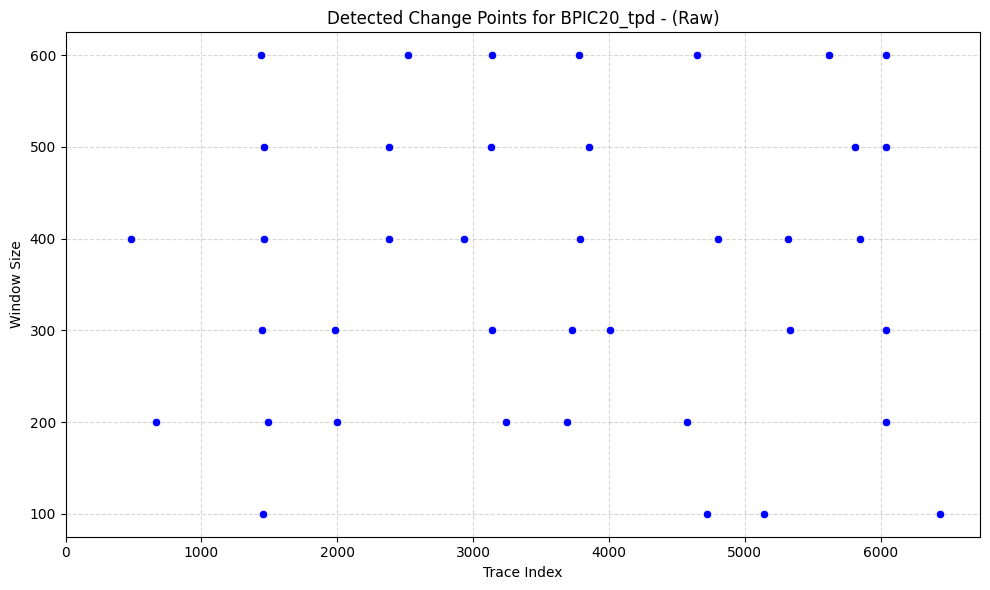

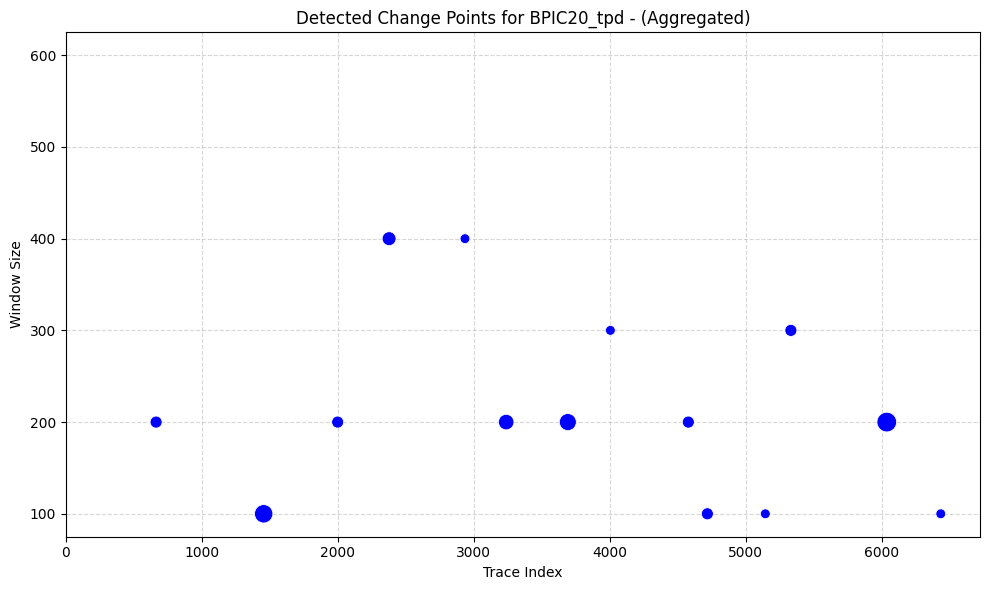

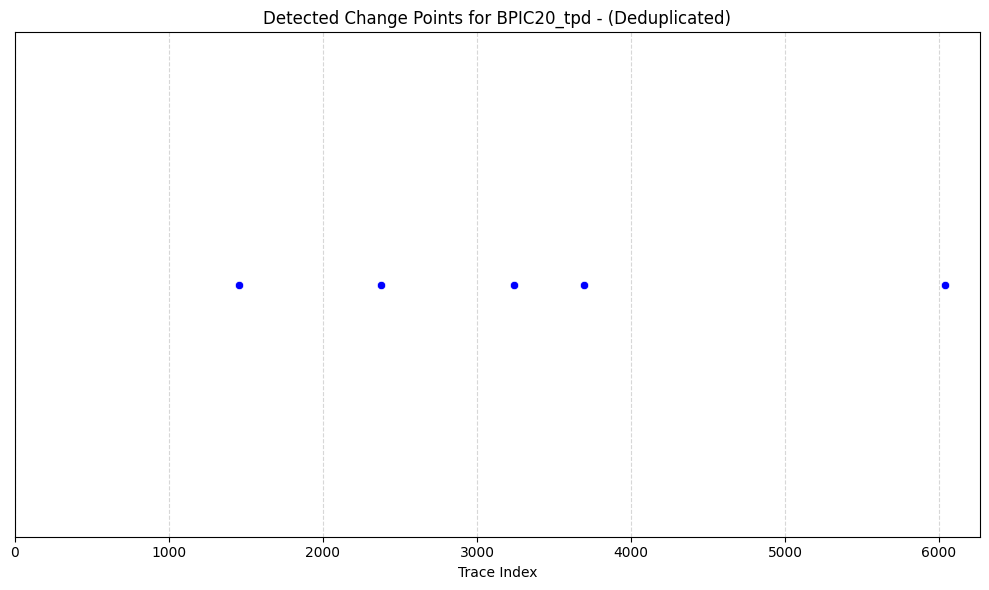

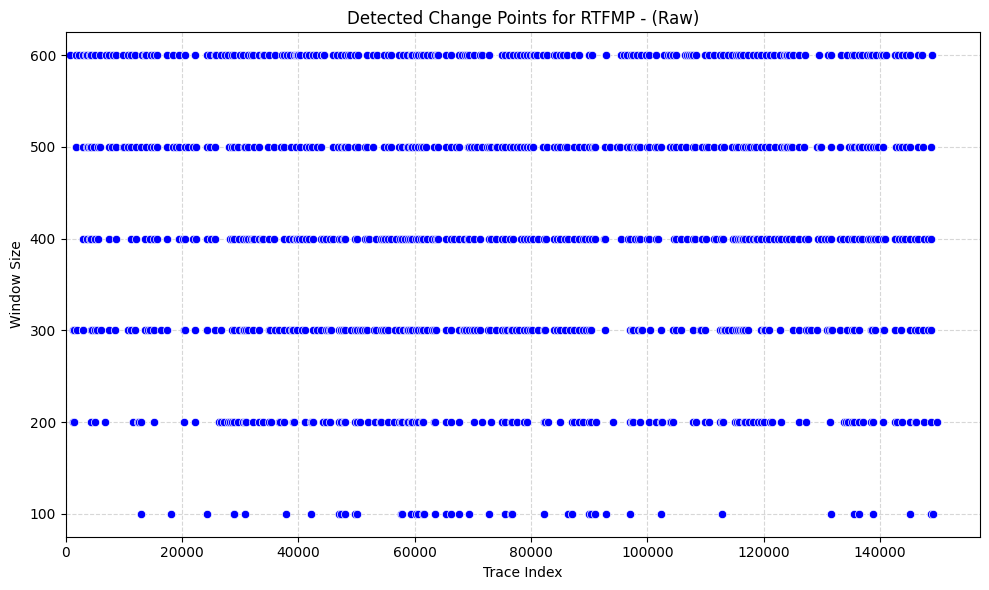

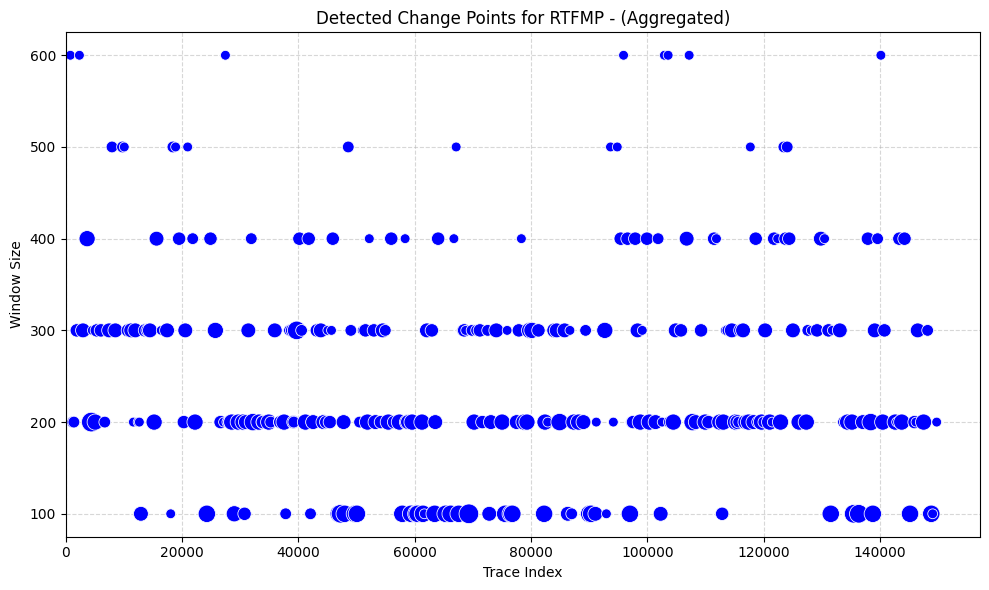

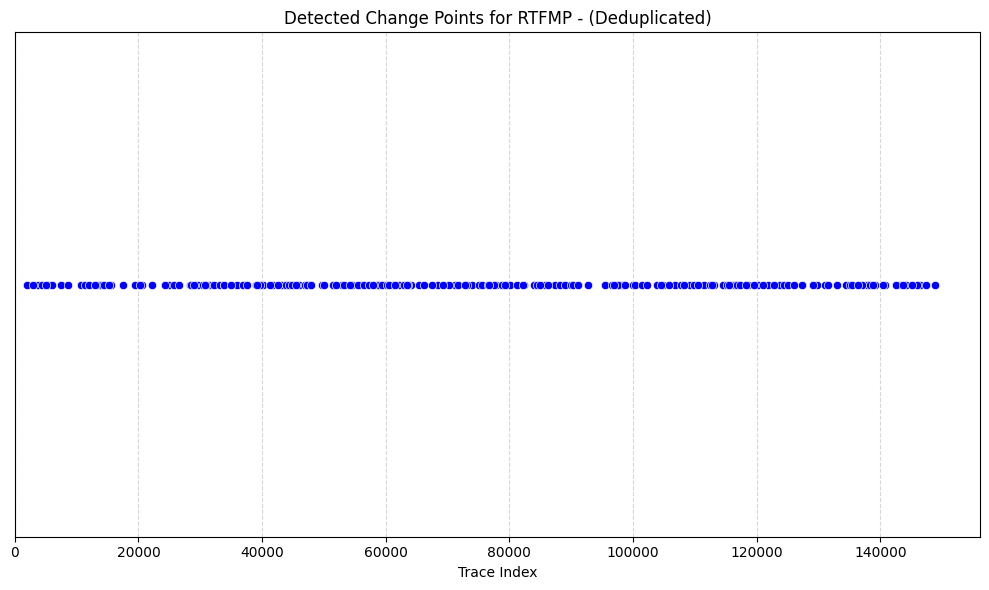

In [142]:
# Plot original and deduplicated points
for dataset, df in change_points_dict.items():
    plot_change_points(dataset, change_points_dict[dataset], input_type='list_of_configurations', y_axis_label="Window Size", configuration_labels=window_sizes, title_suffix="(Raw)")
    plot_change_points(dataset, aggregated_cp_dict[dataset], input_type='dataframe', config_column_in_df='window_size', y_axis_label="Window Size", configuration_labels=window_sizes, title_suffix="(Aggregated)")
    plot_change_points(dataset, deduplicated_cp_dict[dataset], input_type='list_of_cps', y_axis_label="Window Size", configuration_labels=window_sizes, title_suffix="(Deduplicated)")

In [143]:
# import pandas as pd

# # Read both CSV files
# df1 = pd.read_csv("cdrift-evaluation/algorithm_results.csv")
# df2 = pd.read_csv("cdrift-evaluation/algorithm_results_original.csv")

# # Combine rows, aligning columns by name
# merged_df = pd.concat([df1, df2], ignore_index=True)

# # Save to new CSV
# merged_df.to_csv("cdrift-evaluation/merged_results.csv", index=False)

## Process Graphs

In [150]:
parameter_setting_names = [
    "processGraphsPSmallWSmall",
    "processGraphsPSmallWDefault",
    "processGraphsPSmallWLarge",
    "processGraphsPDefaultWSmall",
    "processGraphsPDefaultWDefault",
    "processGraphsPDefaultWLarge",
    "processGraphsPLargeWSmall",
    "processGraphsPLargeWDefault",
    "processGraphsPLargeWLarge"
]

In [ ]:
dd_results_df = helpers.get_dataframe_from_drift_detection_results(data_dictionary.keys(), parameter_setting_names)
dd_results_df

dataset                configuration  change_point  \
0      ACCRE    processGraphsPLargeWSmall           215   
1      ACCRE  processGraphsPLargeWDefault           212   
2      ACCRE    processGraphsPLargeWLarge           212   
3     BPIC12    processGraphsPSmallWSmall           300   
4     BPIC12    processGraphsPSmallWSmall           630   
...      ...                          ...           ...   
1109   RTFMP    processGraphsPLargeWLarge        115285   
1110   RTFMP    processGraphsPLargeWLarge        138402   
1111   RTFMP    processGraphsPLargeWLarge        145170   
1112   RTFMP    processGraphsPLargeWLarge        148898   
1113   RTFMP    processGraphsPLargeWLarge        149677   

                        change_moment  
0           2016-03-03 10:02:17+00:00  
1           2016-03-03 09:42:52+00:00  
2           2016-03-03 09:42:52+00:00  
3    2011-10-05 08:38:39.217000+00:00  
4    2011-10-09 07:52:54.914000+00:00  
...                               ...  
1109        2009-03-10 23:00:00+00:00  
1110        2011-06-17 22:00:00+00:00  
1111        2012-02-22 23:00:00+00:00  
1112        2013-01-13 23:00:00+00:00  
1113        2013-05-02 22:00:00+00:00  

[1114 rows x 4 columns]

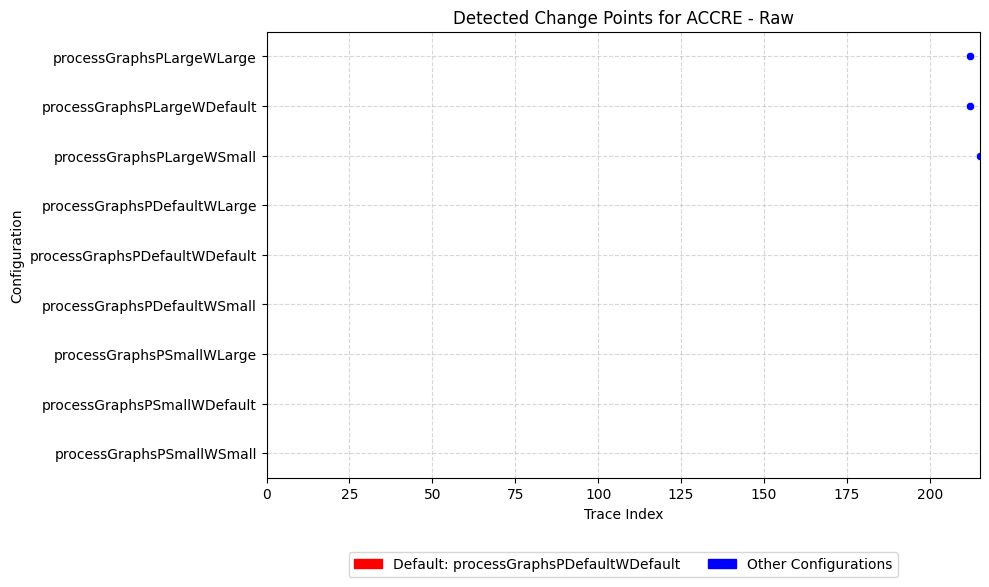

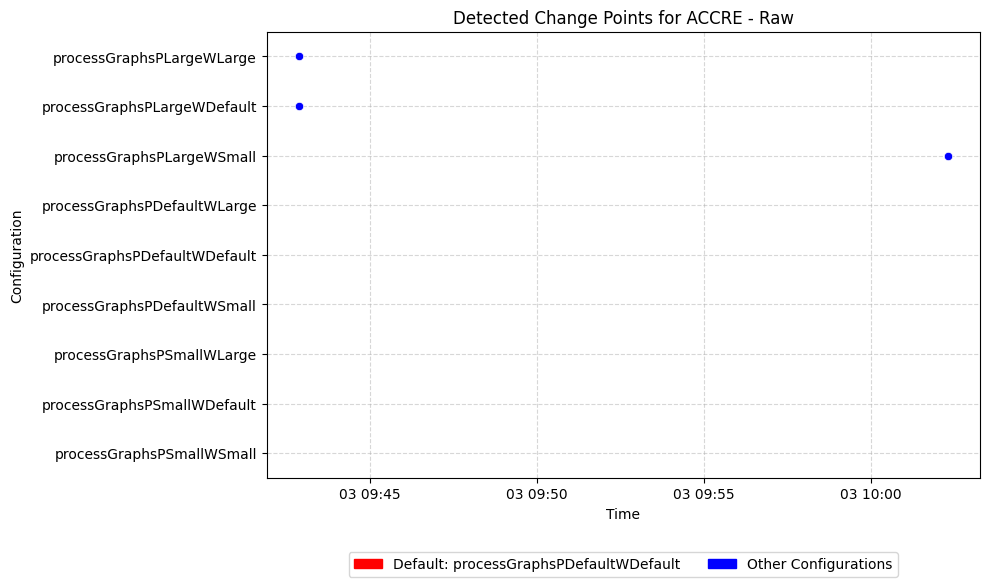

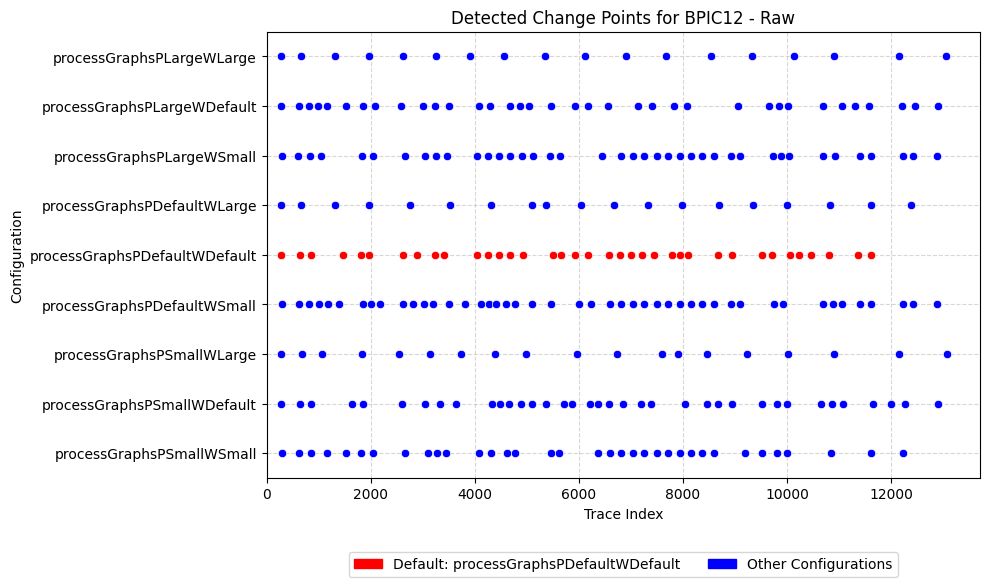

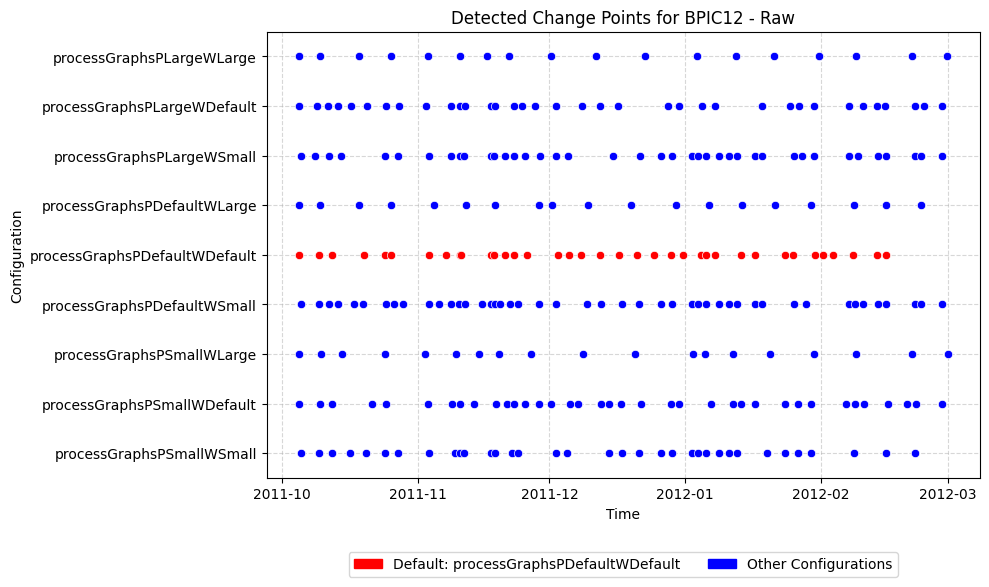

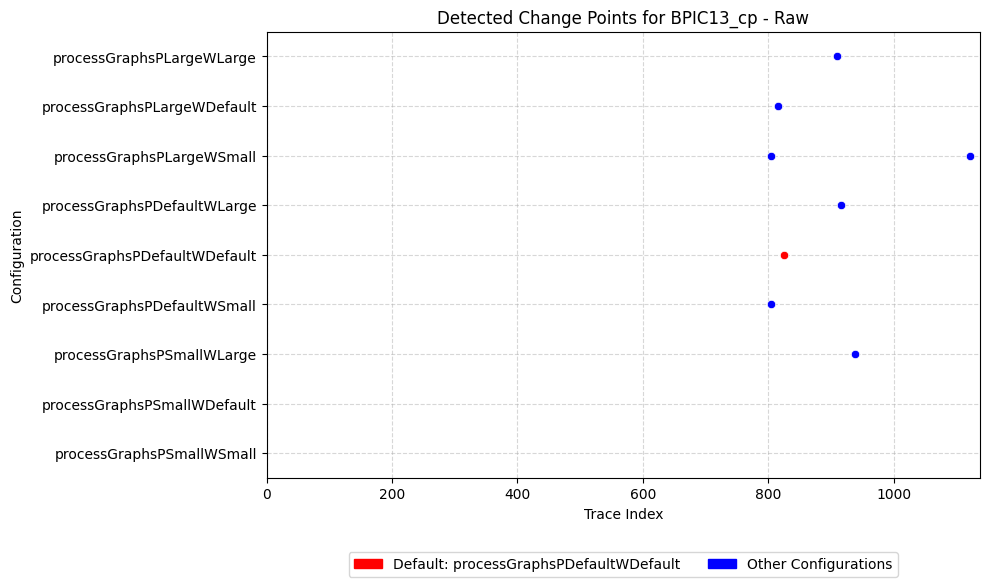

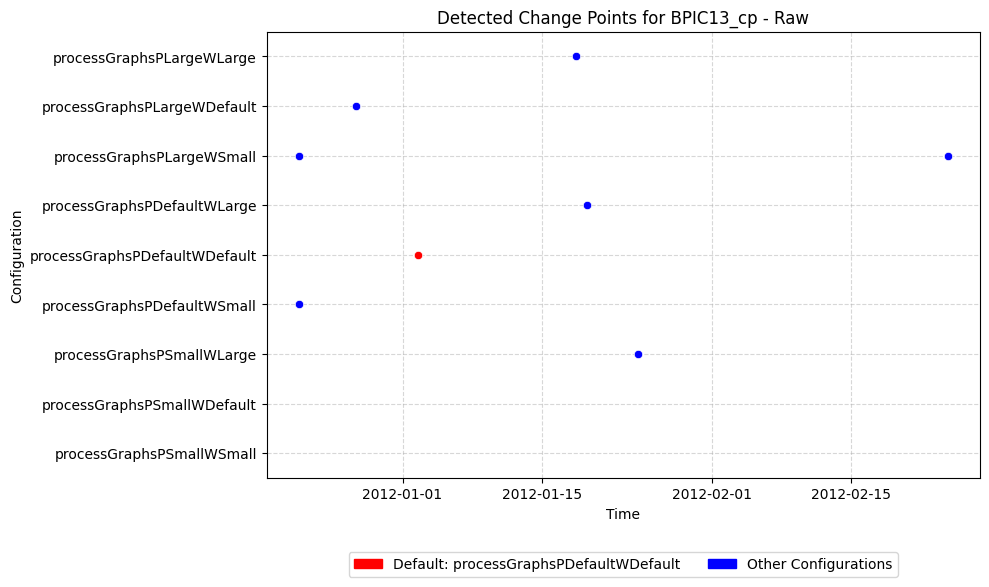

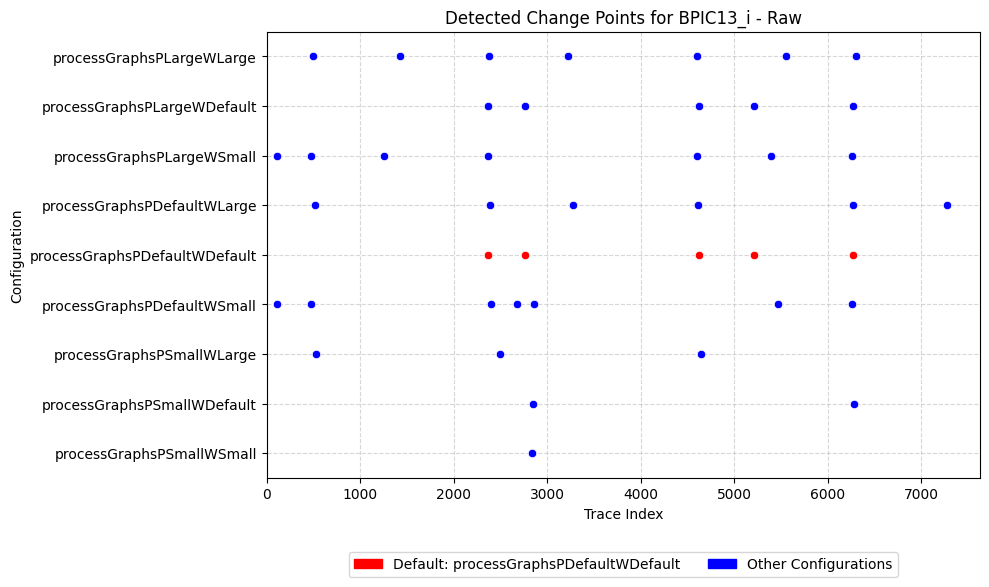

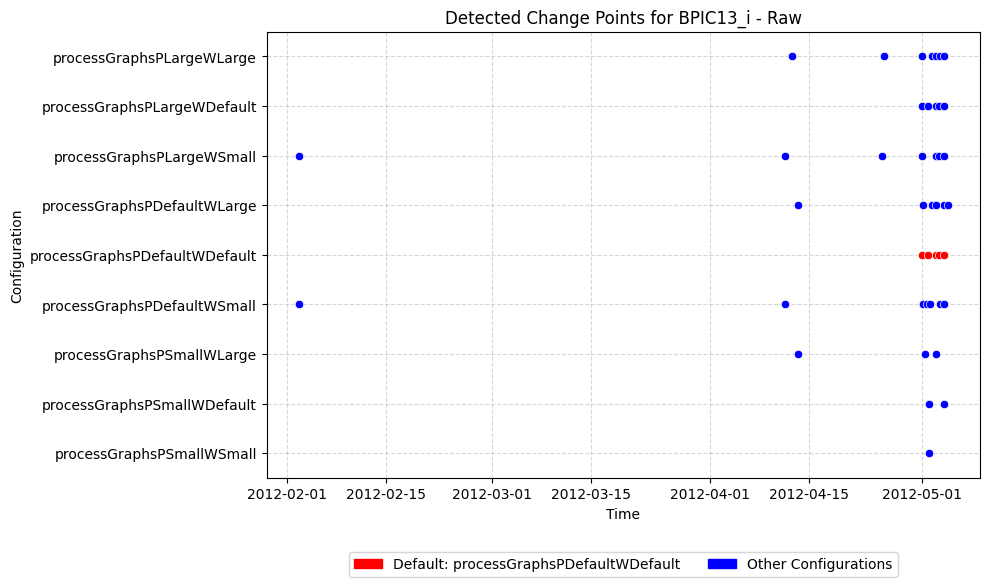

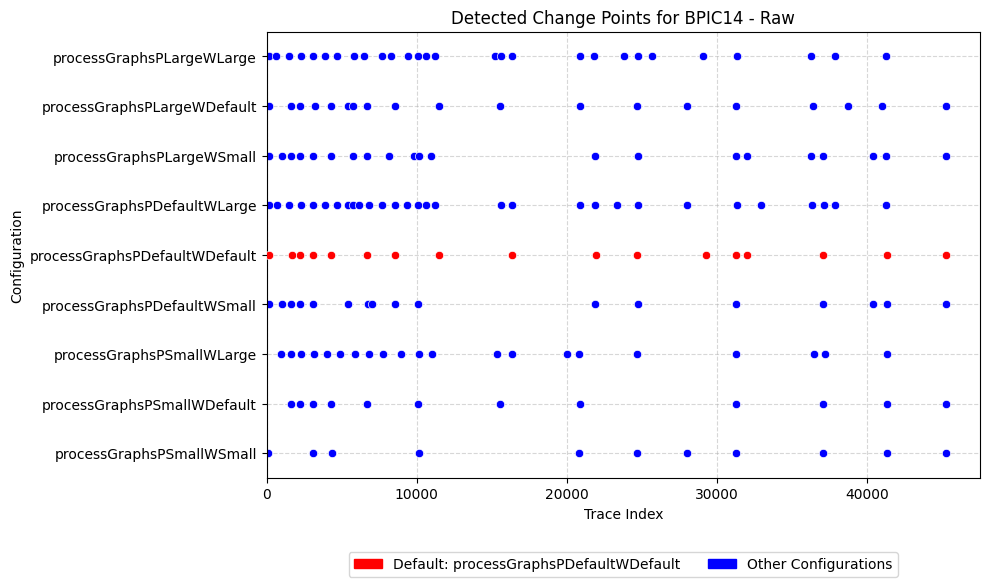

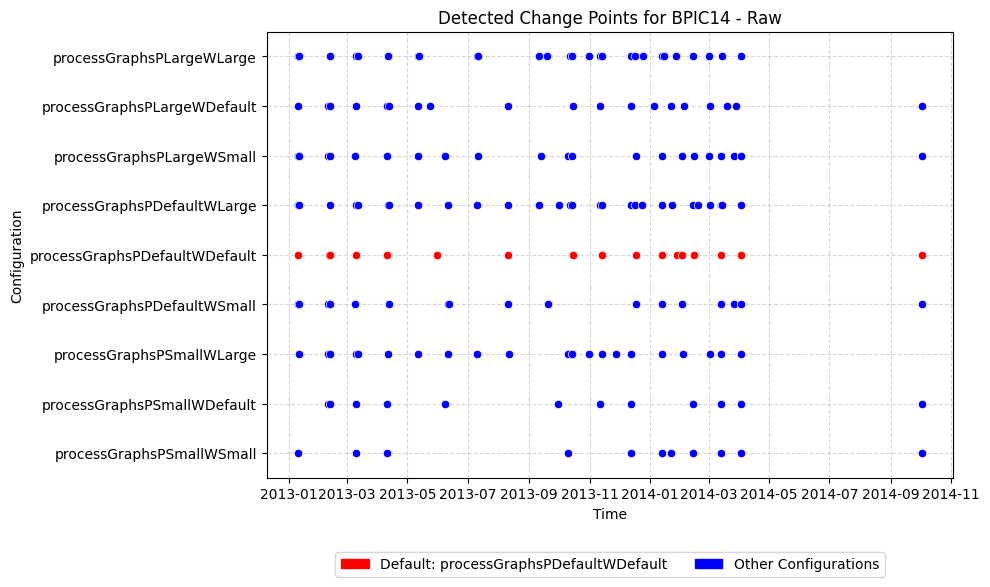

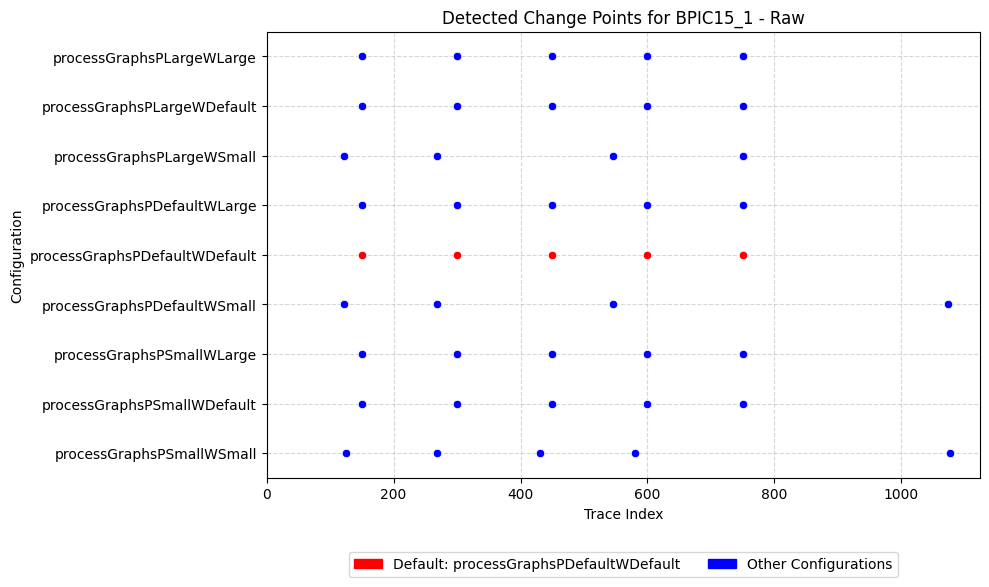

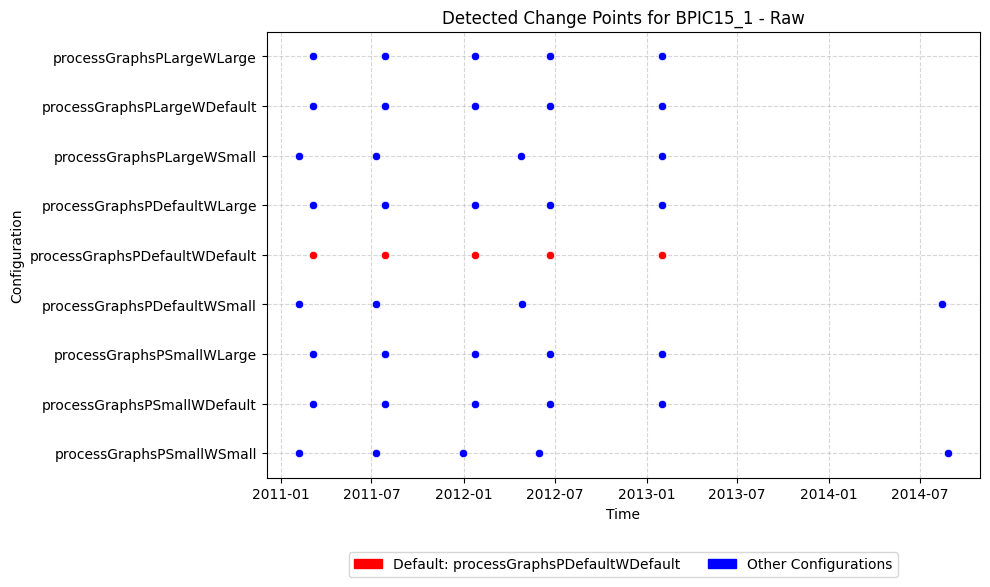

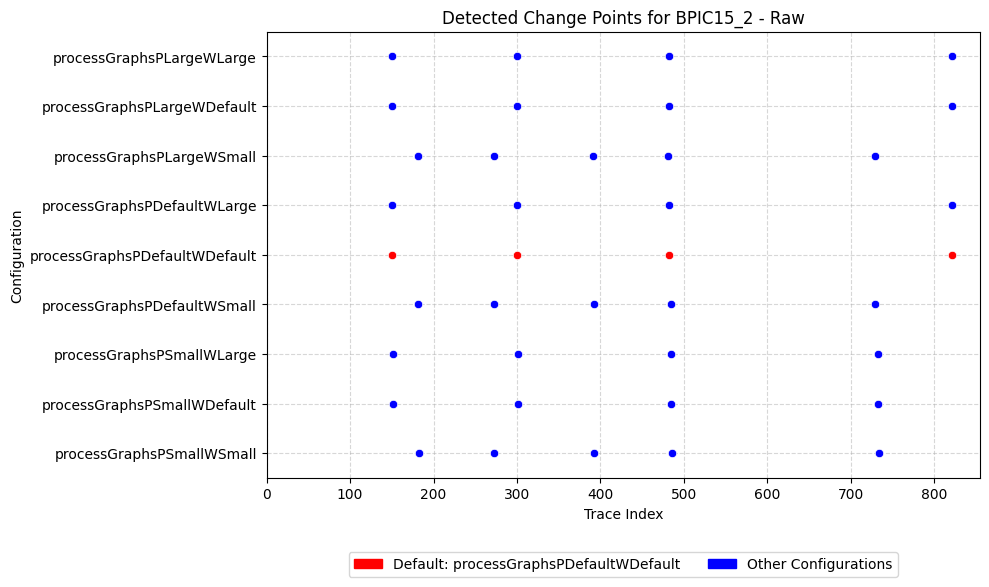

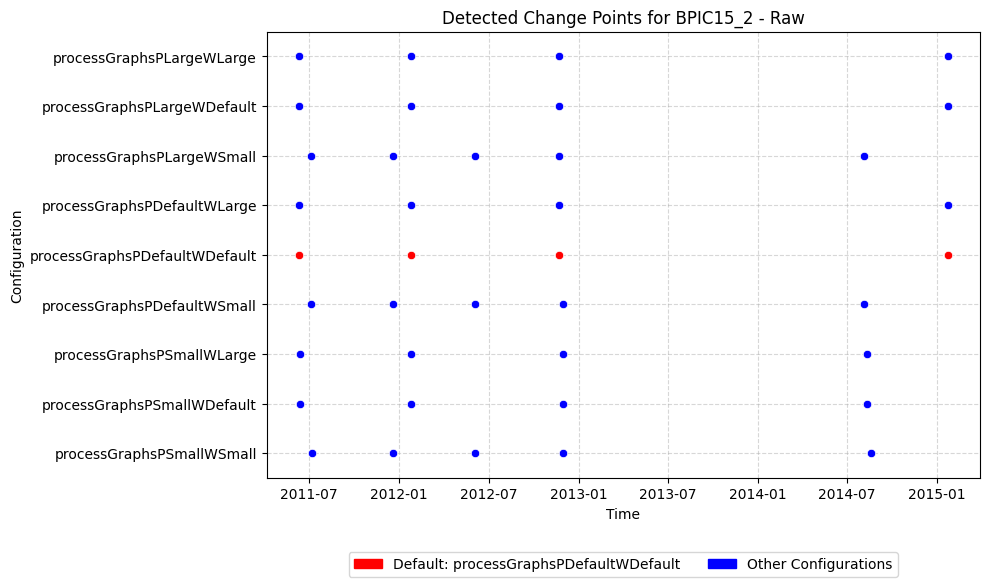

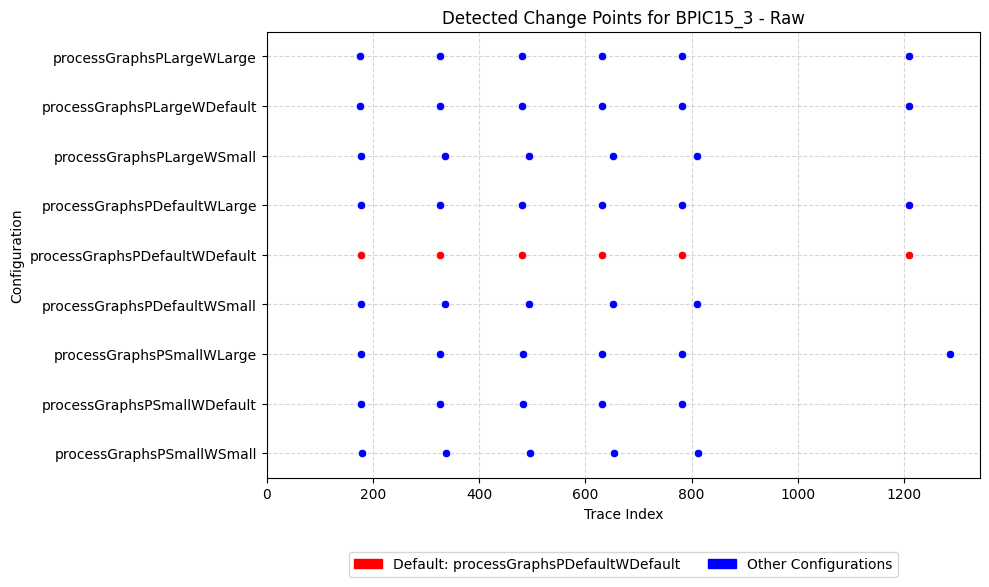

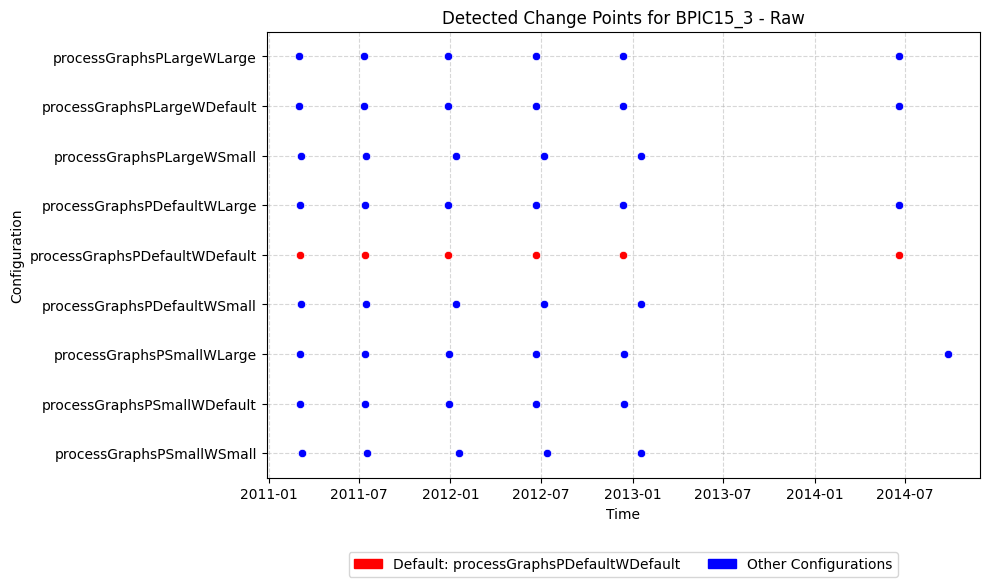

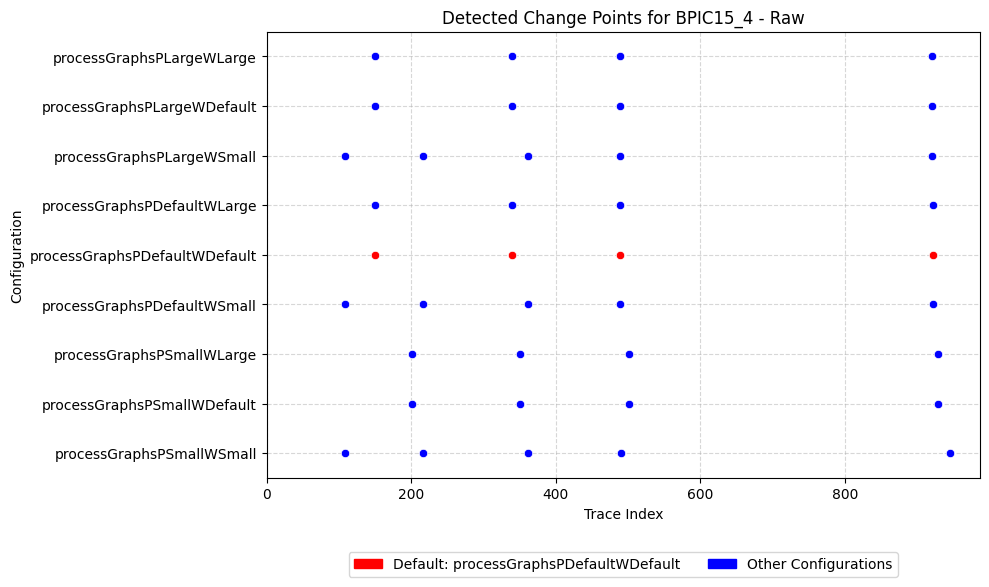

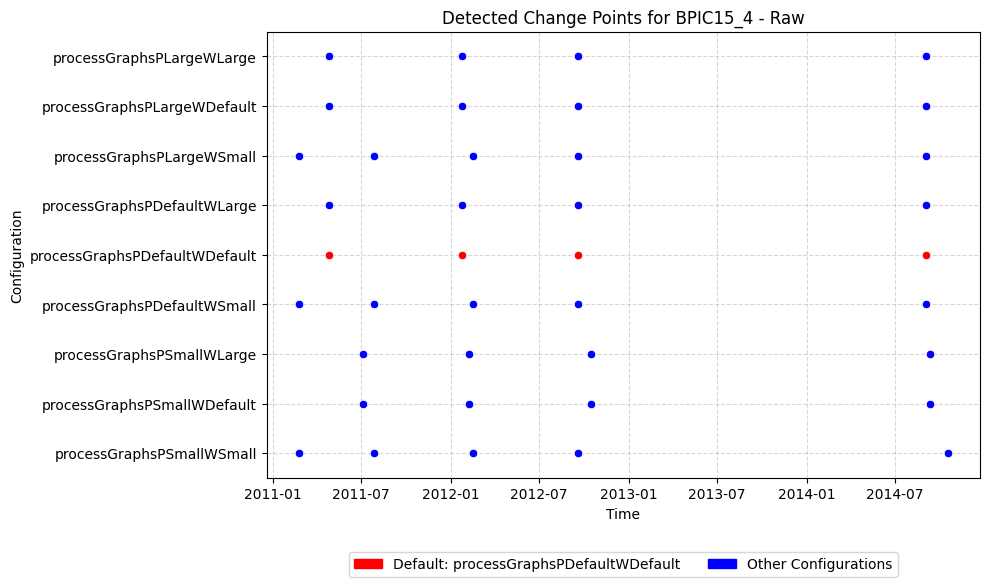

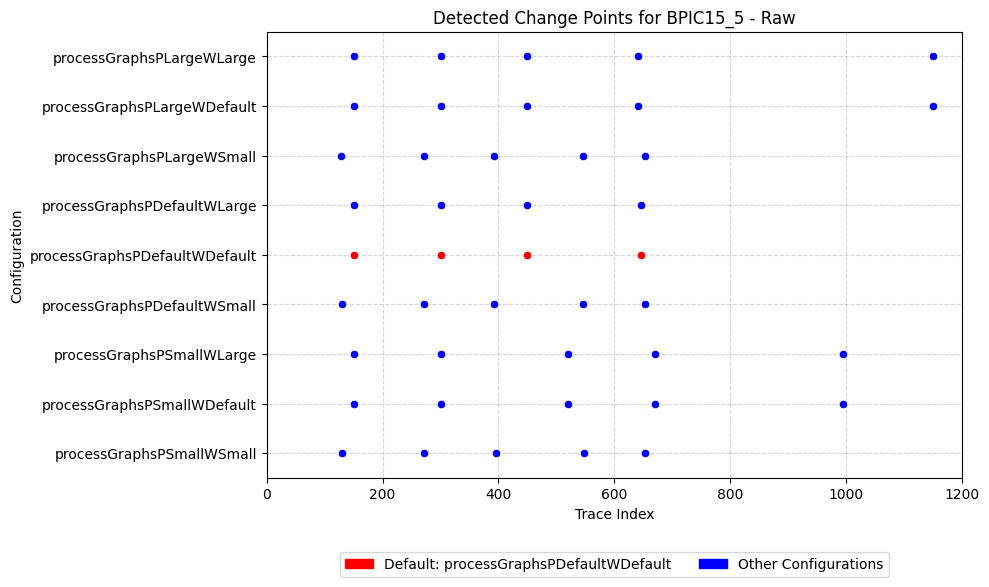

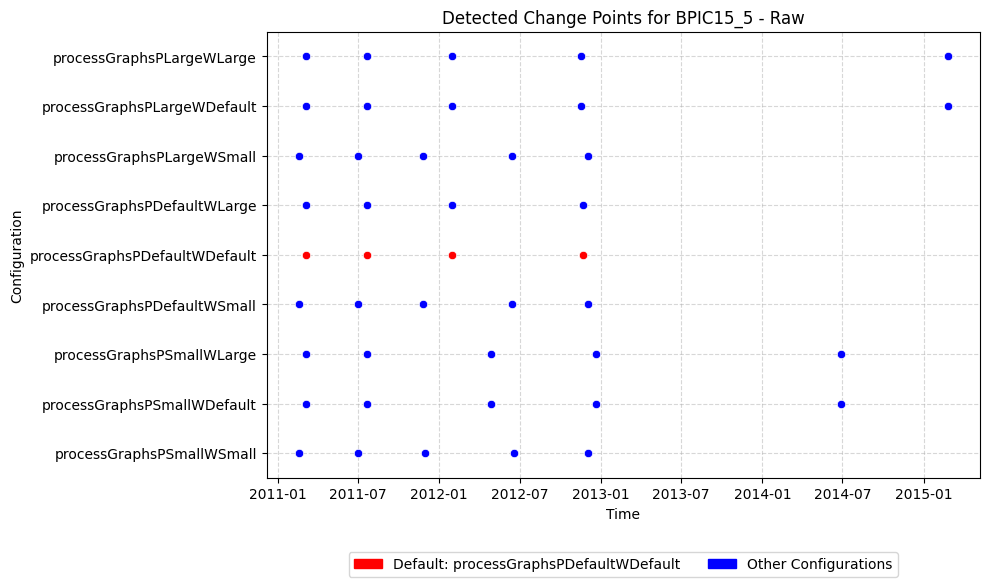

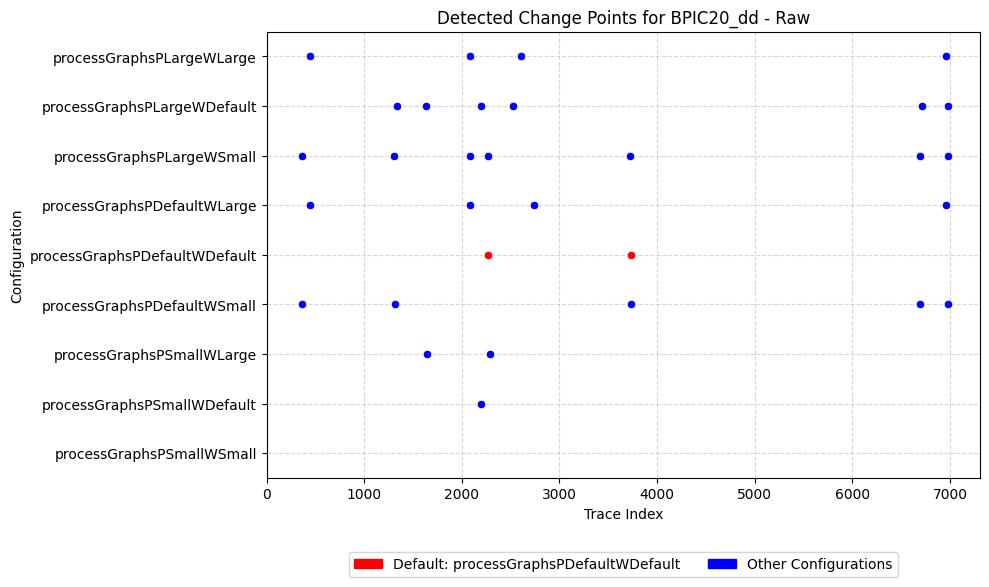

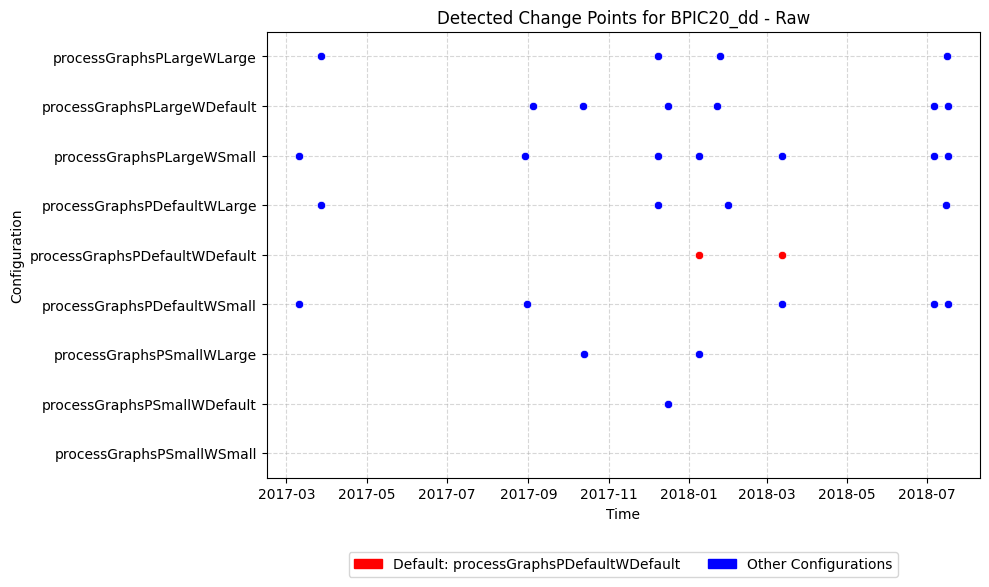

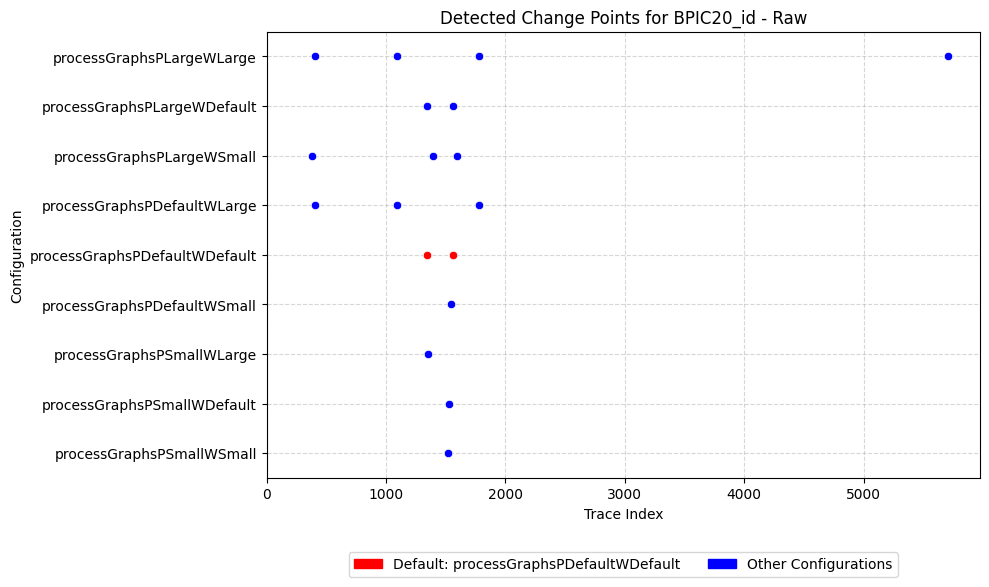

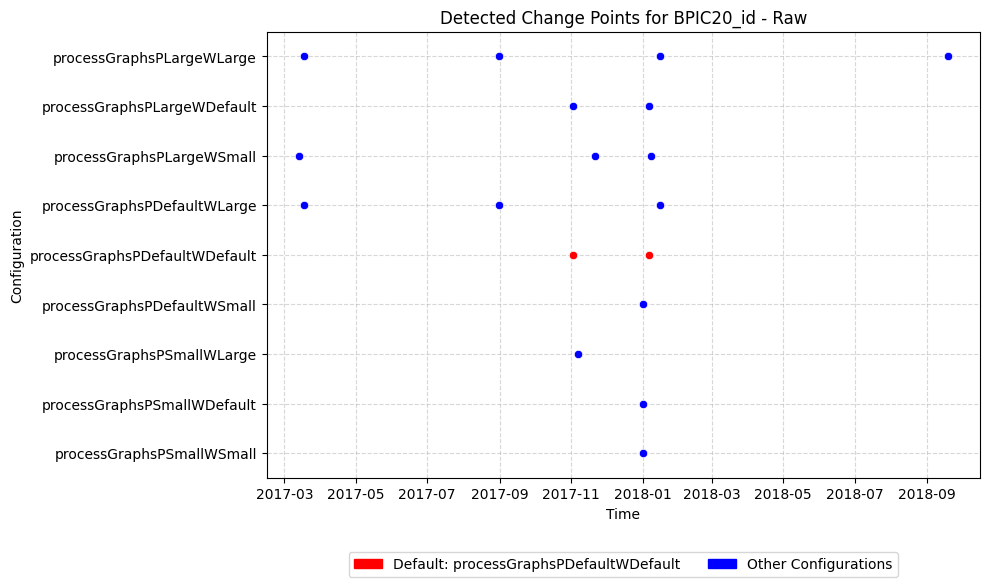

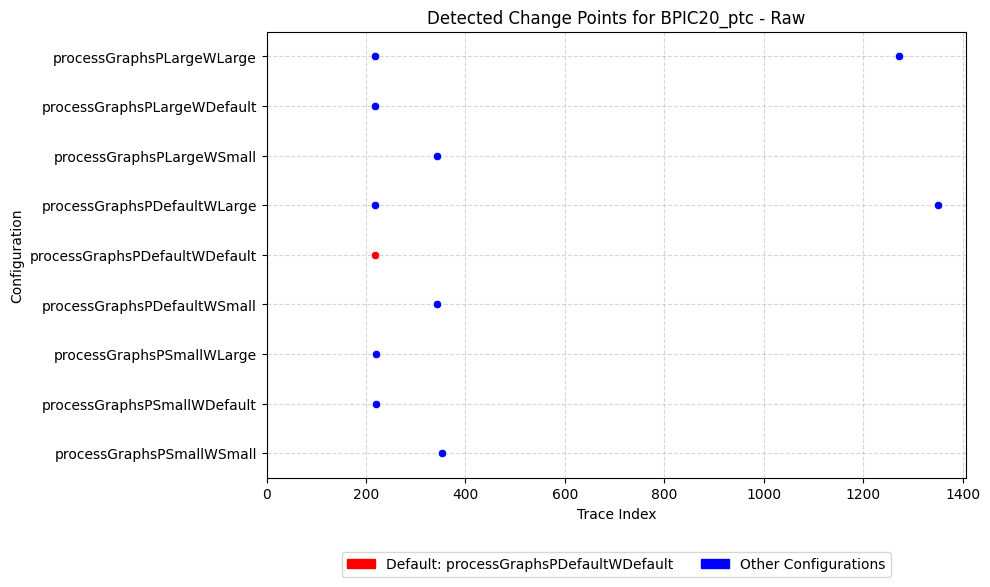

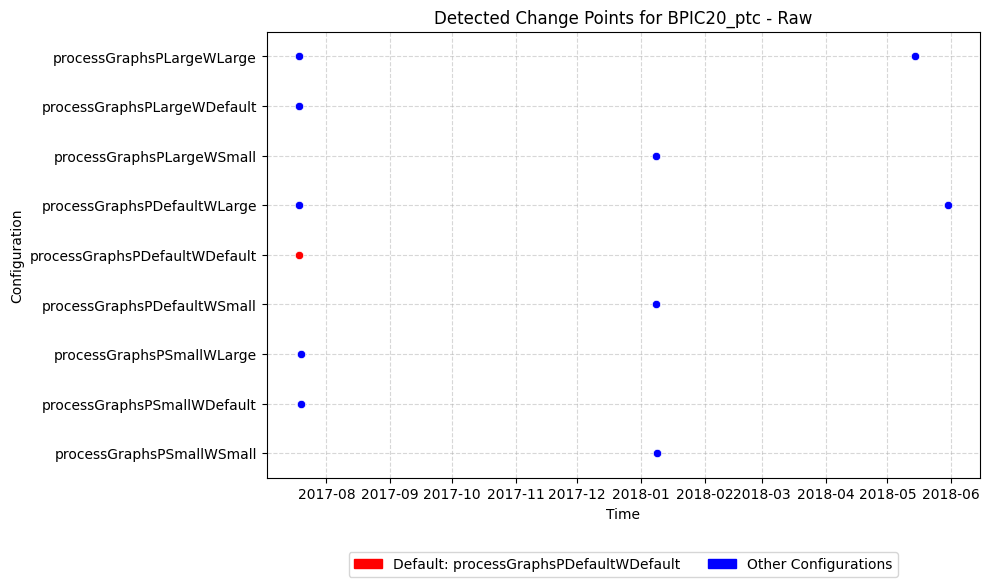

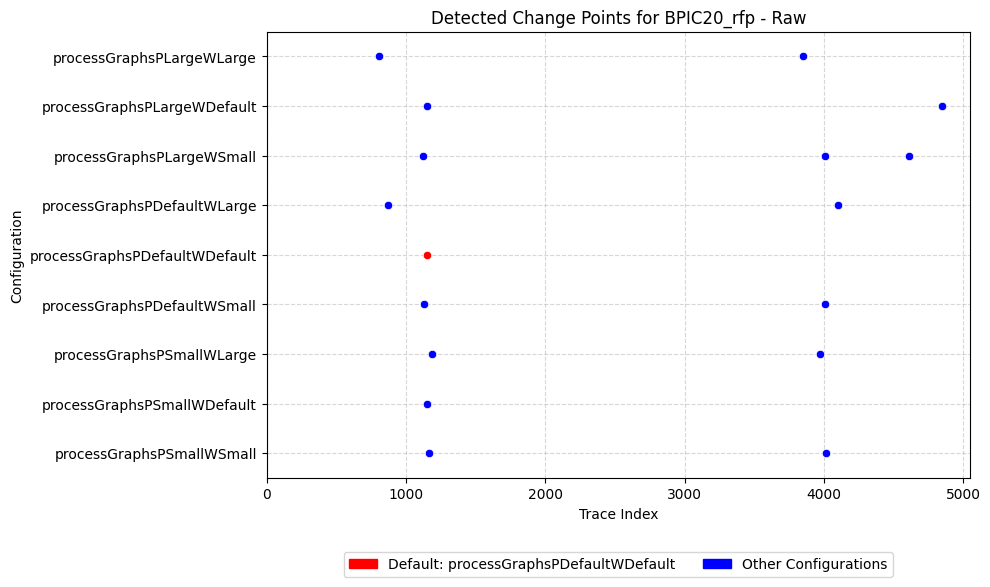

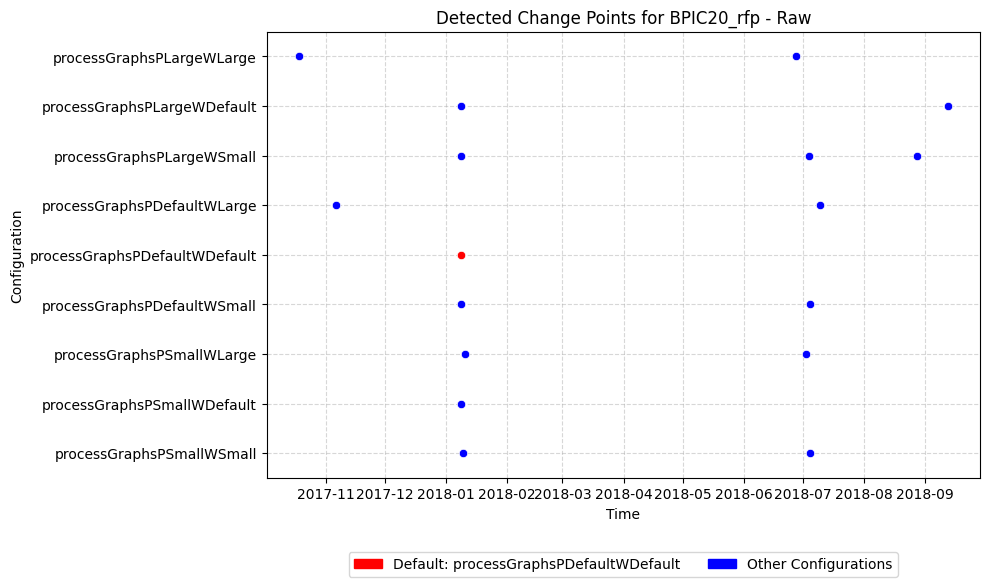

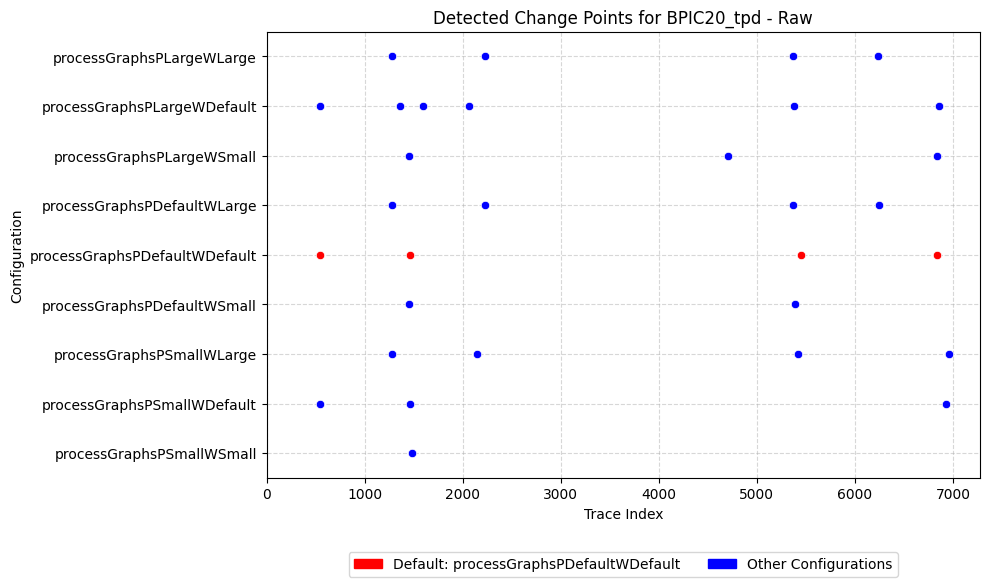

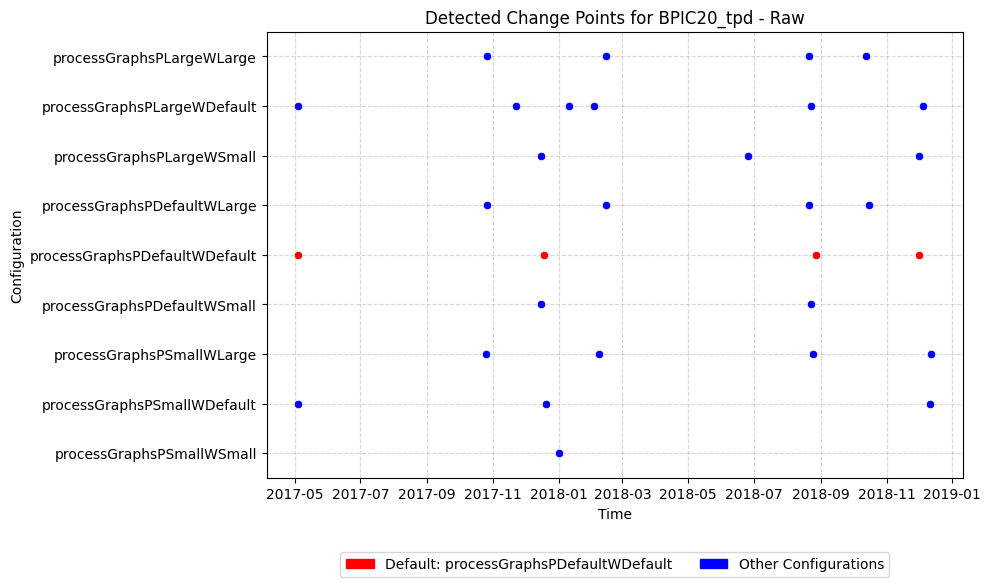

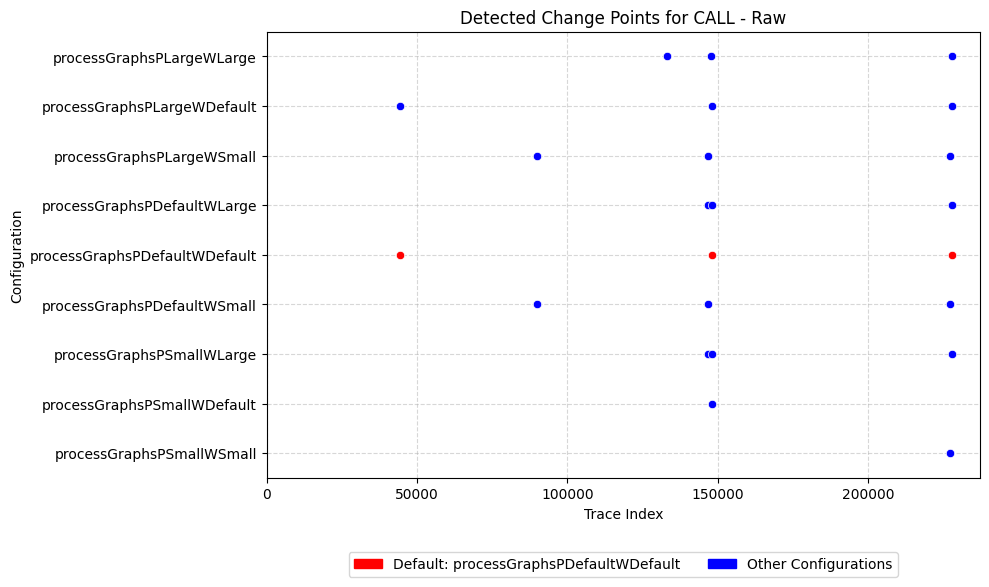

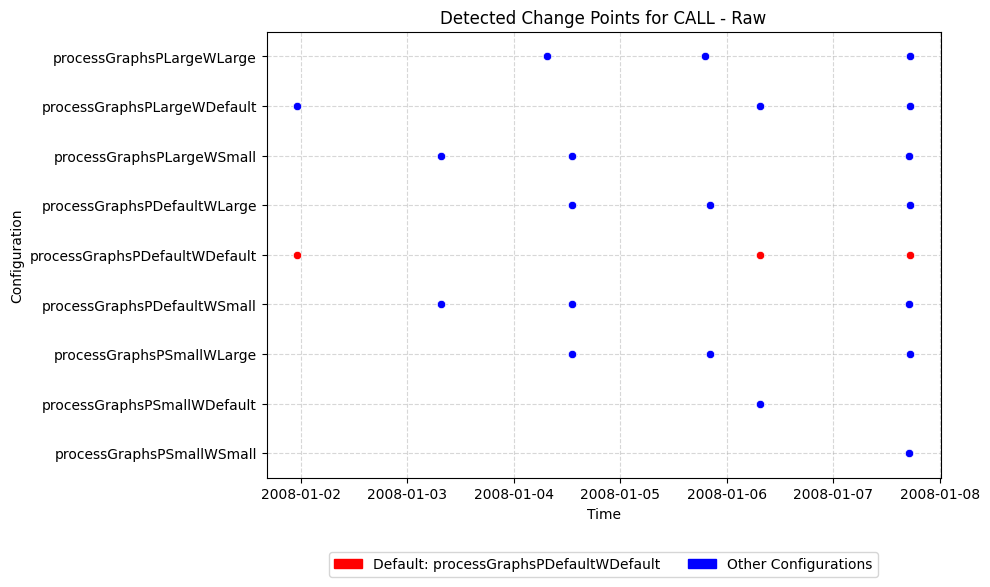

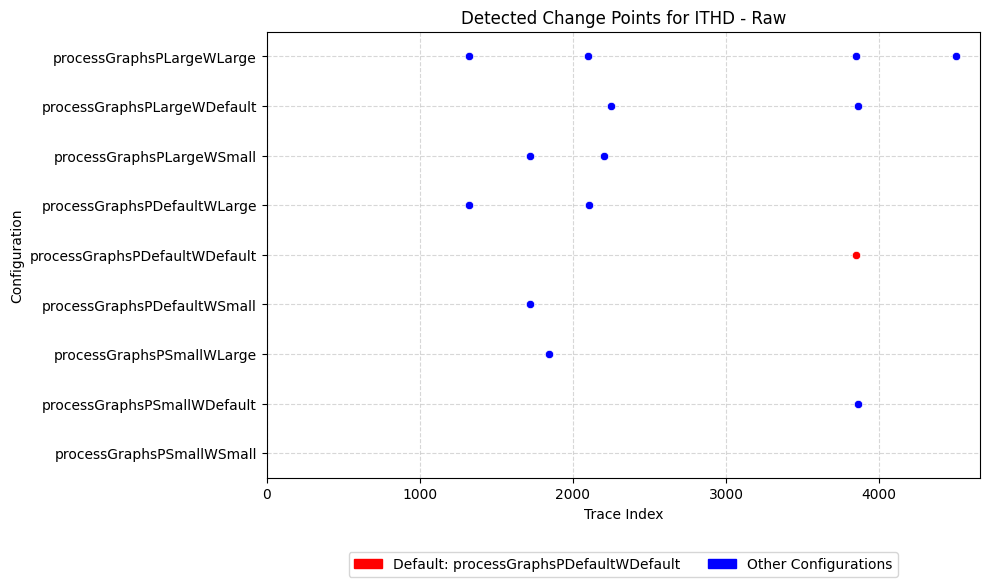

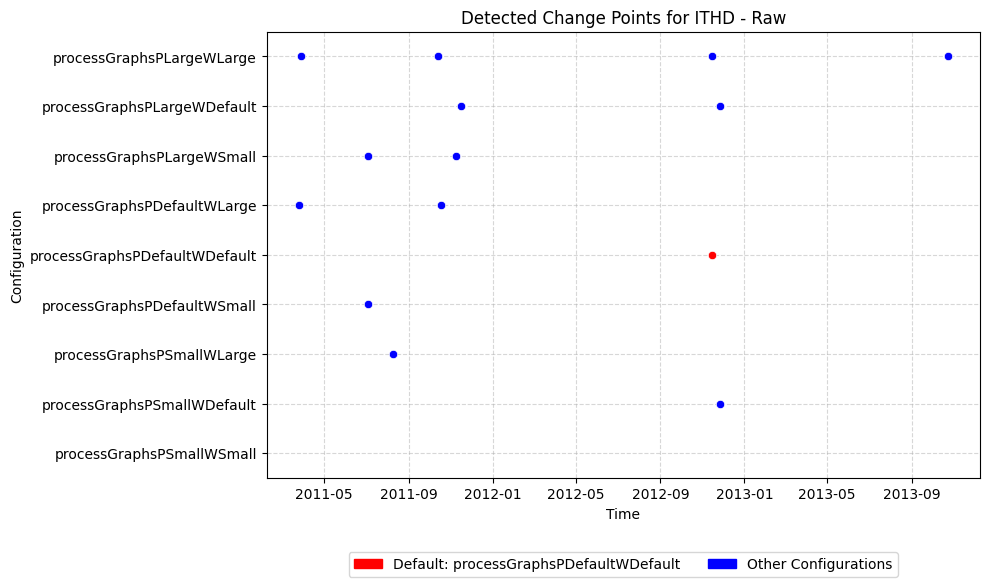

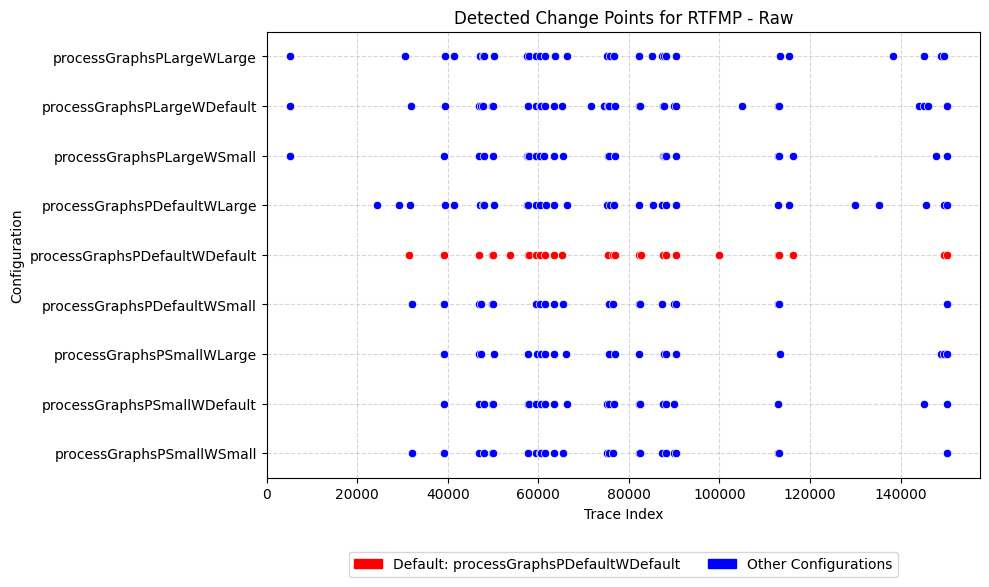

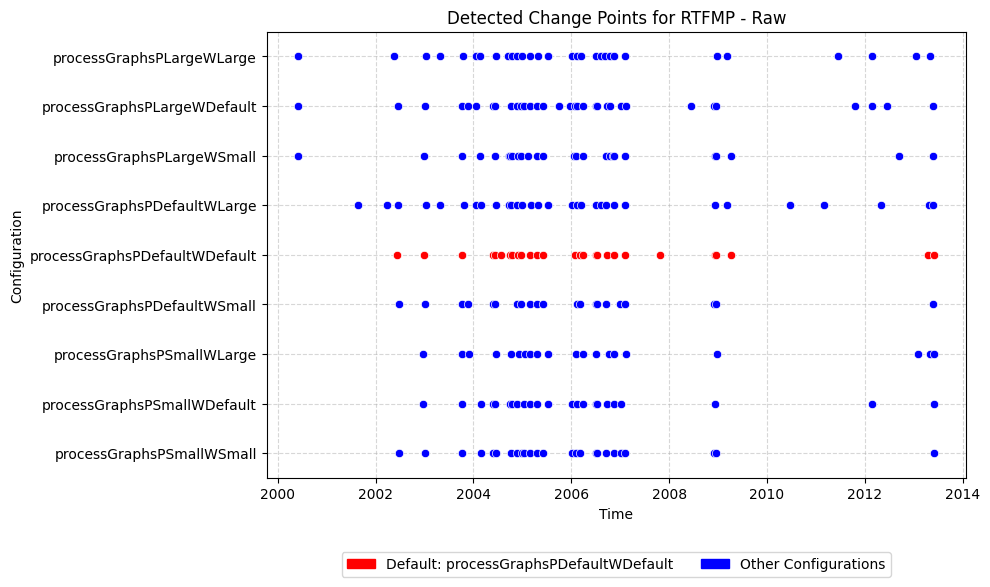

In [155]:
# Plot points
datasets = dd_results_df_copy['dataset'].unique()

for dataset in datasets:
    dd_results_df_copy = dd_results_df.copy()
    dd_results_df_copy_dataset_df = dd_results_df_copy[dd_results_df_copy['dataset'] == dataset]
    plot_change_points(dataset, dd_results_df_copy_dataset_df, input_type='dataframe', config_column_in_df='configuration', y_axis_label="Configuration", configuration_labels=parameter_setting_names, title_suffix="Raw", x_axis='change_point', default_configuration='processGraphsPDefaultWDefault')
    plot_change_points(dataset, dd_results_df_copy_dataset_df, input_type='dataframe', config_column_in_df='configuration', y_axis_label="Configuration", configuration_labels=parameter_setting_names, title_suffix="Raw", x_axis='change_moment', default_configuration='processGraphsPDefaultWDefault')


<Figure size 1000x600 with 0 Axes>

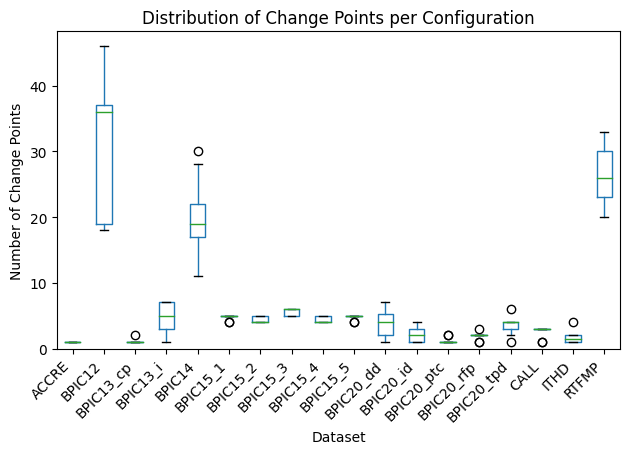

Dataset  min_change_points  max_change_points  mean_change_points  \
0        ACCRE                  1                  1            1.000000   
1       BPIC12                 18                 46           31.888889   
2    BPIC13_cp                  1                  2            1.142857   
3     BPIC13_i                  1                  7            4.777778   
4       BPIC14                 11                 30           19.777778   
5     BPIC15_1                  4                  5            4.777778   
6     BPIC15_2                  4                  5            4.333333   
7     BPIC15_3                  5                  6            5.555556   
8     BPIC15_4                  4                  5            4.333333   
9     BPIC15_5                  4                  5            4.777778   
10   BPIC20_dd                  1                  7            3.875000   
11   BPIC20_id                  1                  4            2.000000   
12  BPIC20_ptc                  1                  2            1.222222   
13  BPIC20_rfp                  1                  3            1.888889   
14  BPIC20_tpd                  1                  6            3.444444   
15        CALL                  1                  3            2.555556   
16        ITHD                  1                  4            1.750000   
17       RTFMP                 20                 33           26.222222   

    median_change_points  std_change_points  
0                    1.0           0.000000  
1                   36.0          10.421665  
2                    1.0           0.377964  
3                    5.0           2.279132  
4                   19.0           6.398785  
5                    5.0           0.440959  
6                    4.0           0.500000  
7                    6.0           0.527046  
8                    4.0           0.500000  
9                    5.0           0.440959  
10                   4.0           2.100170  
11                   2.0           1.118034  
12                   1.0           0.440959  
13                   2.0           0.600925  
14                   4.0           1.424001  
15                   3.0           0.881917  
16                   1.5           1.035098  
17                  26.0           4.493823

In [156]:
#show boxplot of change point counts per dataset and window setting

plot_number_change_points_per_df(dd_results_df)


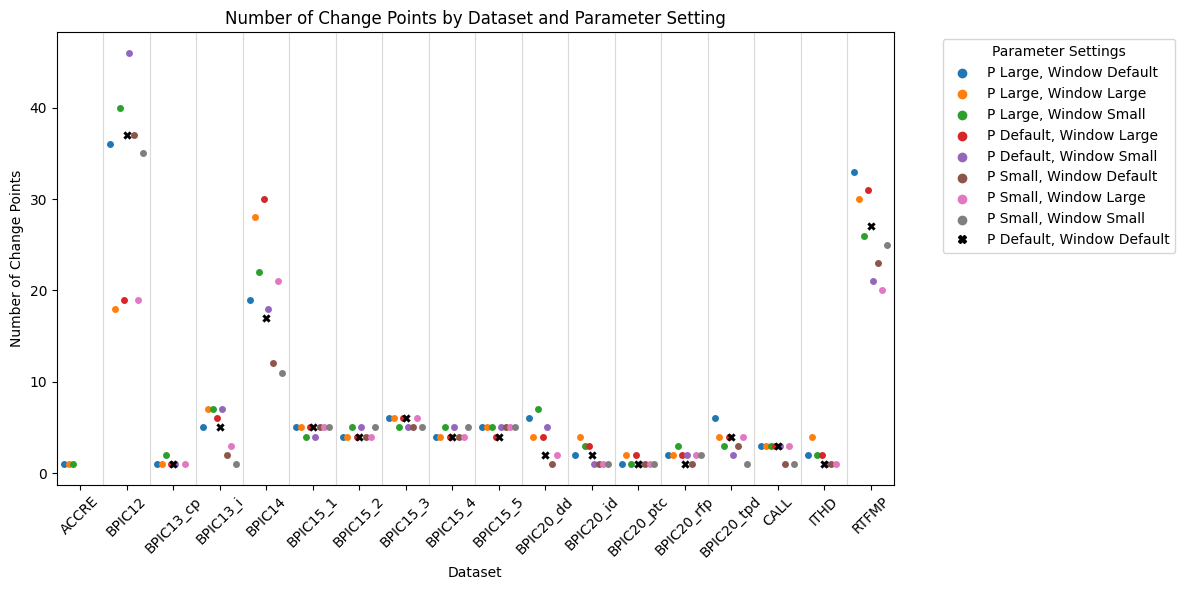

In [185]:
import matplotlib.lines as mlines


df = dd_results_df.copy()

df = (
    df
    .rename(columns={'dataset': 'Dataset'})
    .groupby(['Dataset', 'configuration'], as_index=False)['change_point']
    .count()
    .rename(columns={'change_point': '# Change Points'})
)

# Mapping from parameter_setting_names to readable labels
readable_labels = {
    "processGraphsPSmallWSmall": "P Small, Window Small",
    "processGraphsPSmallWDefault": "P Small, Window Default",
    "processGraphsPSmallWLarge": "P Small, Window Large",
    "processGraphsPDefaultWSmall": "P Default, Window Small",
    "processGraphsPDefaultWDefault": "P Default, Window Default",
    "processGraphsPDefaultWLarge": "P Default, Window Large",
    "processGraphsPLargeWSmall": "P Large, Window Small",
    "processGraphsPLargeWDefault": "P Large, Window Default",
    "processGraphsPLargeWLarge": "P Large, Window Large",
}

# Ensure the mapping is applied cleanly (safe mapping fallback)
df["ReadableLabel"] = df["configuration"].map(readable_labels).fillna("Unmapped")

# Plot
plt.figure(figsize=(12, 6))
order = df['Dataset'].unique()

# Plot all non-default settings
sns.stripplot(
    data=df[df["configuration"] != "processGraphsPDefaultWDefault"],
    x="Dataset",
    y='# Change Points',
    hue="ReadableLabel",
    jitter=True,
    dodge=True,
    order=order
)

# Plot default as X marker (no hue, so it won't appear automatically in legend)
default_df = df[df["configuration"] == "processGraphsPDefaultWDefault"]
sns.stripplot(
    data=default_df,
    x="Dataset",
    y='# Change Points',
    marker="X",
    color="black",
    jitter=True,
    dodge=True,
    size=6,
    order=order
)

# Get existing legend handles/labels
handles, configuration_labels = plt.gca().get_legend_handles_labels()

# Create manual handle for default setting
default_handle = mlines.Line2D([], [], color='black', marker='X', linestyle='None', markersize=6)
handles.append(default_handle)
configuration_labels.append("P Default, Window Default")

# Apply custom legend
plt.legend(handles, configuration_labels, title="Parameter Settings", bbox_to_anchor=(1.05, 1), loc='upper left')

# Add vertical separators
for i in range(len(order) - 1):
    plt.axvline(i + 0.5, color='0.85', lw=0.8, zorder=0)

plt.title("Number of Change Points by Dataset and Parameter Setting")
plt.xticks(rotation=45)
plt.ylabel("Number of Change Points")
plt.xlabel("Dataset")
plt.tight_layout()
plt.show()


## Compare change points detected with EMD and process graphs

In [189]:
dd_results_df['dataset'].unique()

array(['BPIC12', 'BPIC13_cp', 'BPIC13_i', 'BPIC14', 'BPIC15_1',
       'BPIC15_2', 'BPIC15_3', 'BPIC15_4', 'BPIC15_5', 'BPIC20_dd',
       'BPIC20_id', 'BPIC20_ptc', 'BPIC20_rfp', 'BPIC20_tpd', 'CALL',
       'ITHD', 'RTFMP'], dtype=object)

[INFO] No change points to plot for dataset ACCRE.


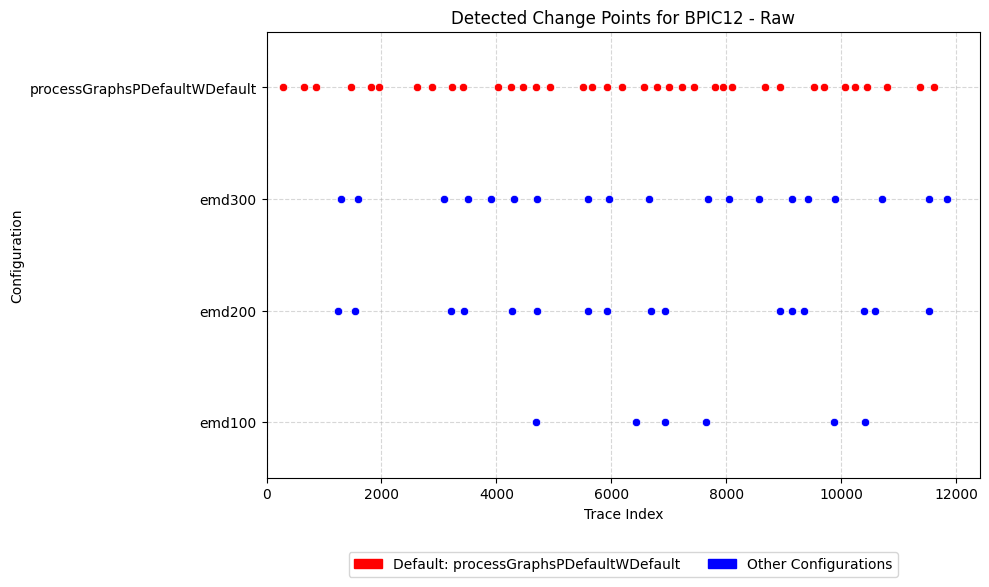

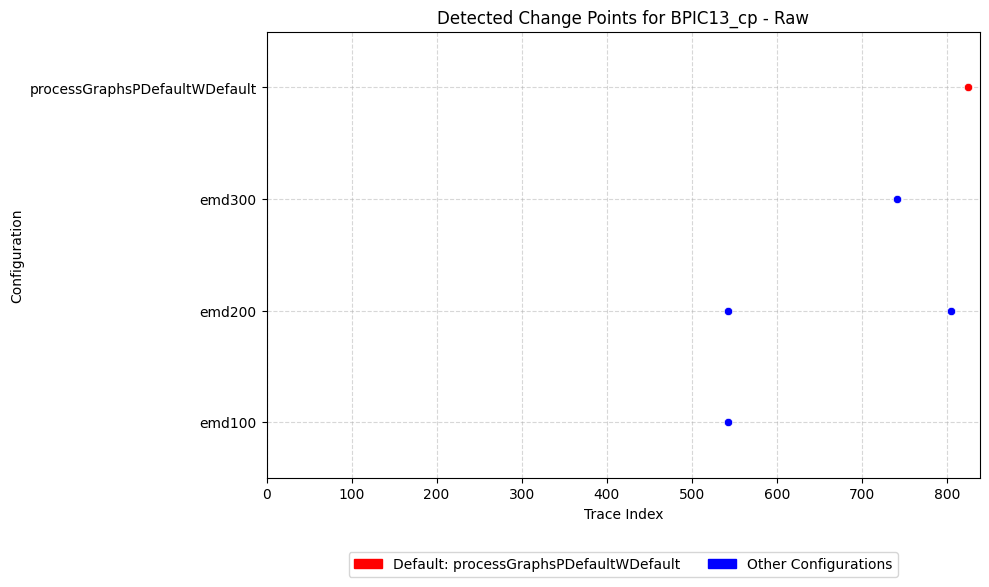

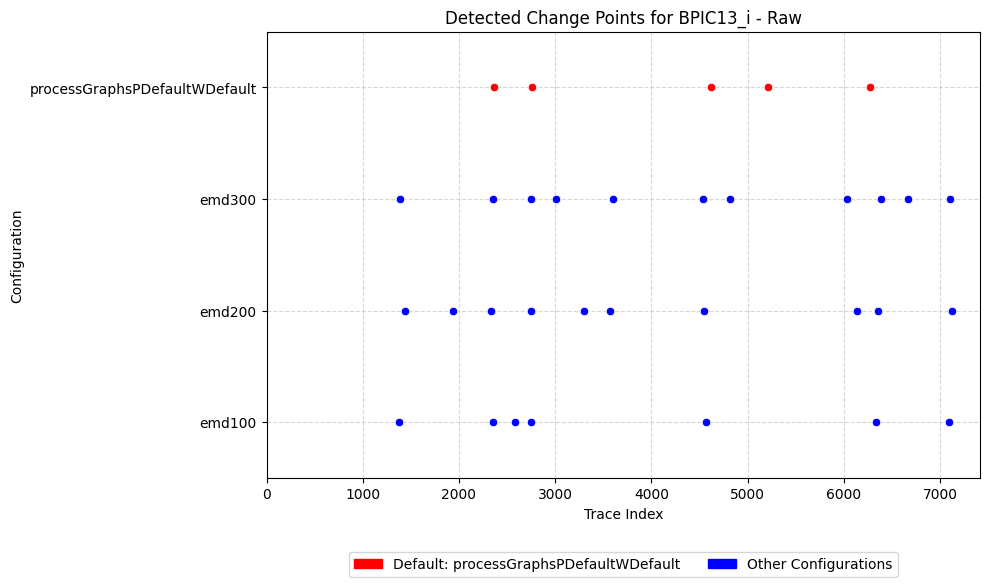

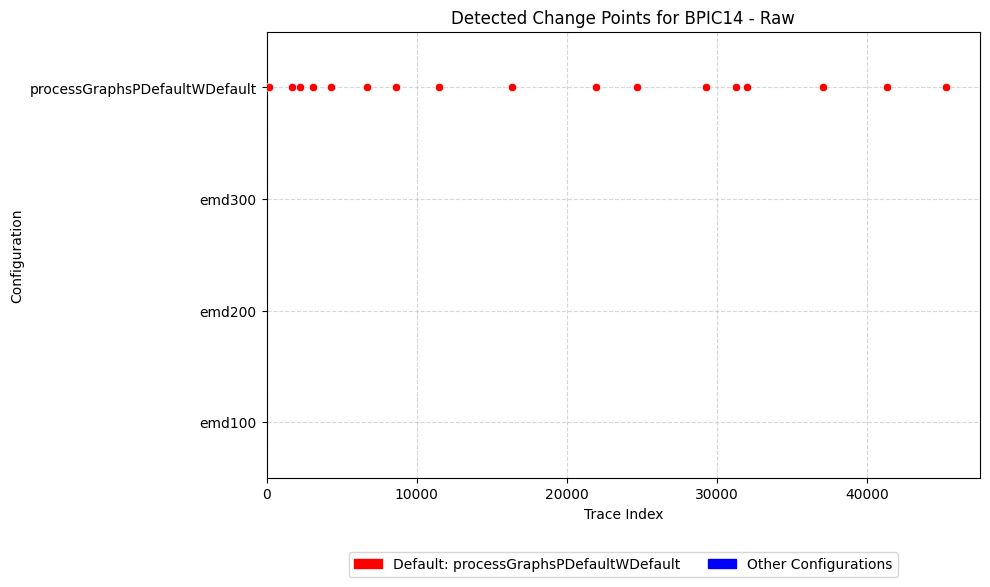

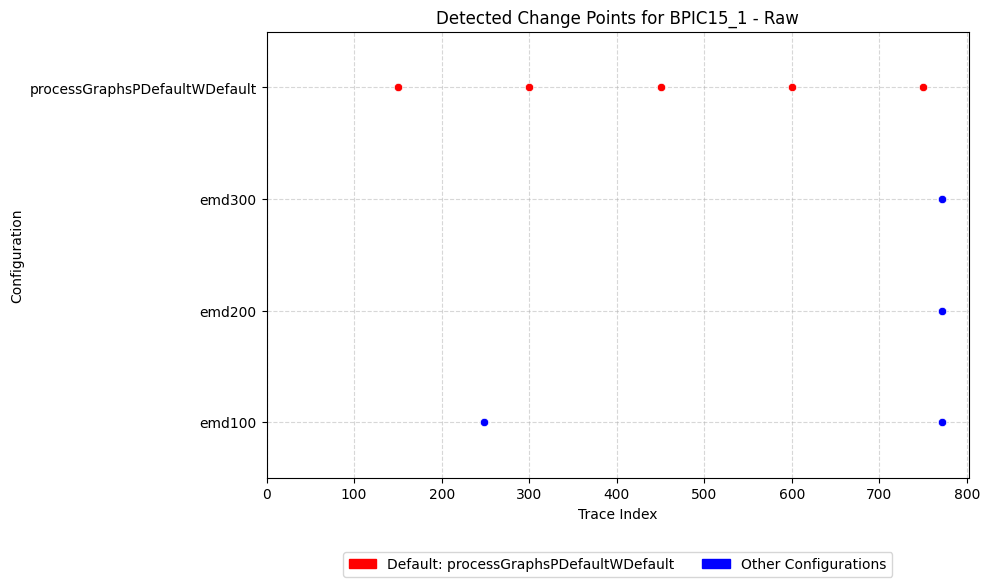

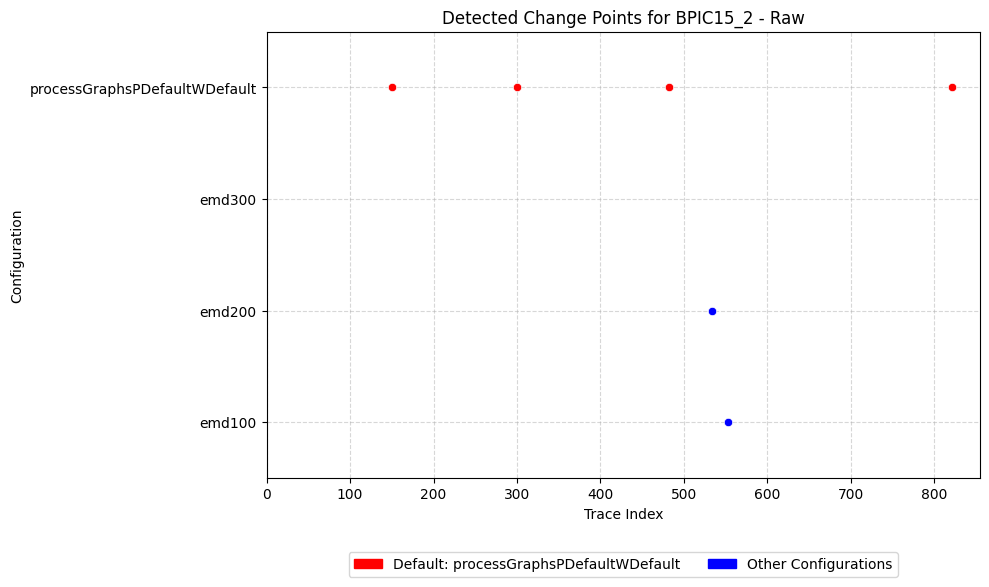

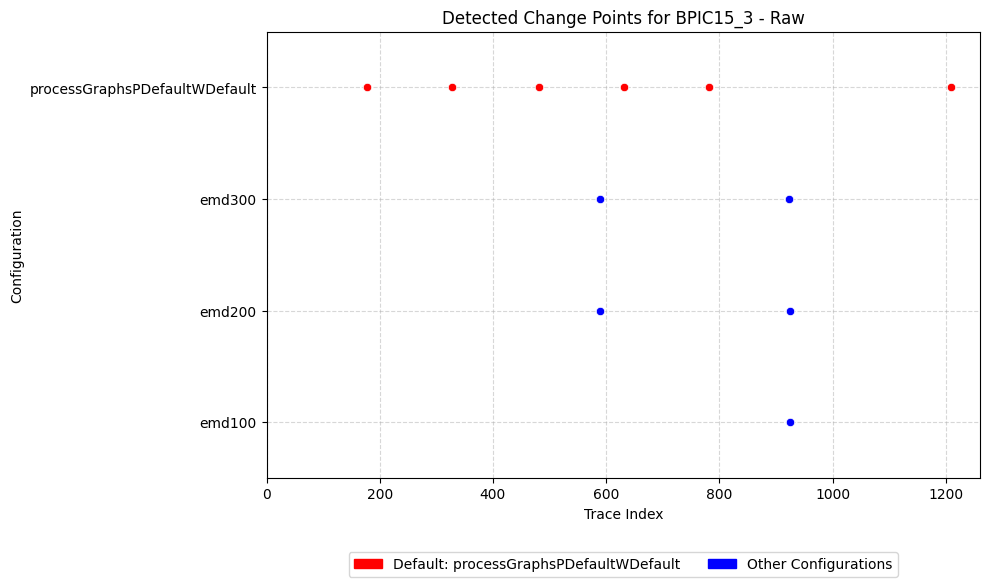

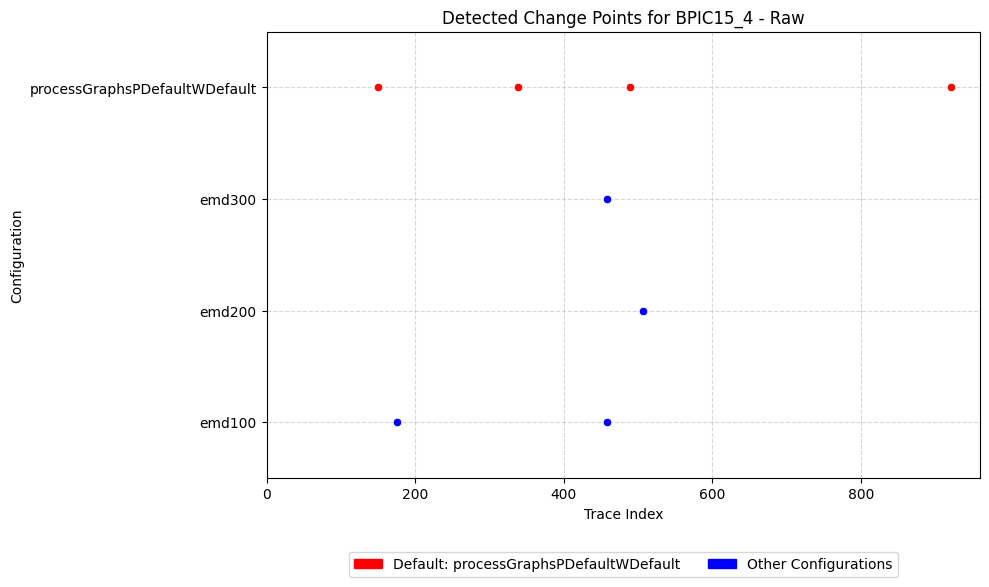

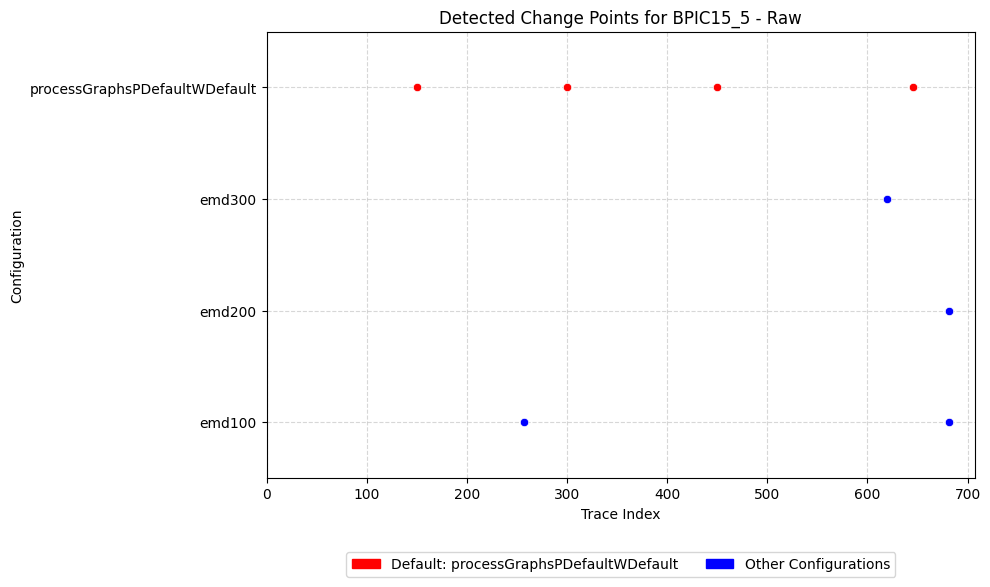

[INFO] No change points to plot for dataset BPIC17.
[INFO] No change points to plot for dataset BPIC18.
[INFO] No change points to plot for dataset BPIC19.


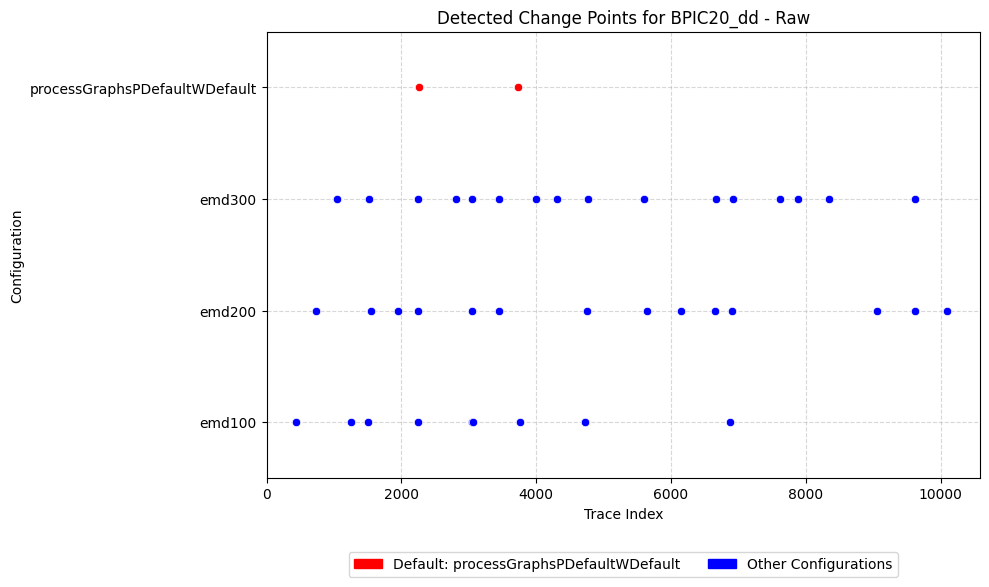

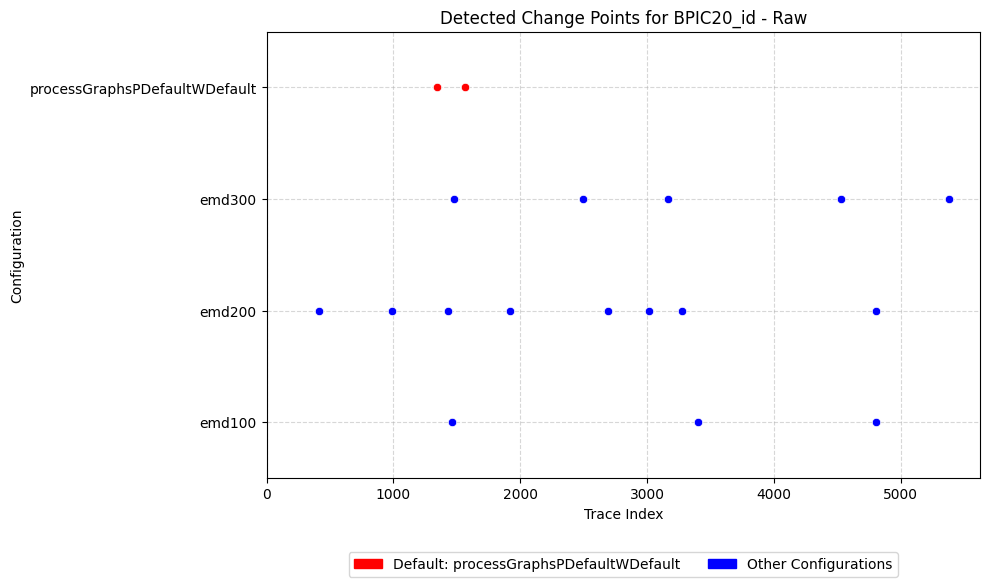

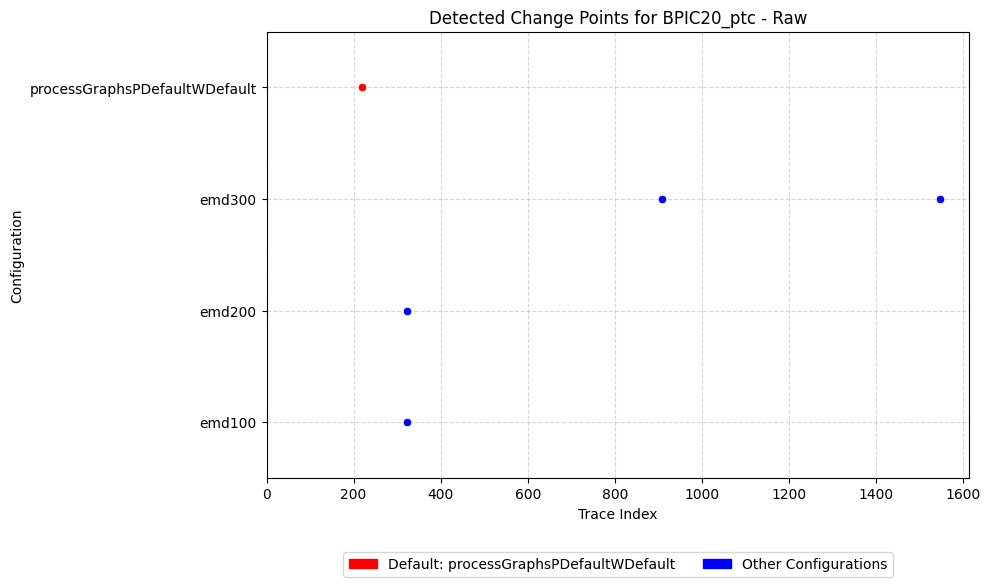

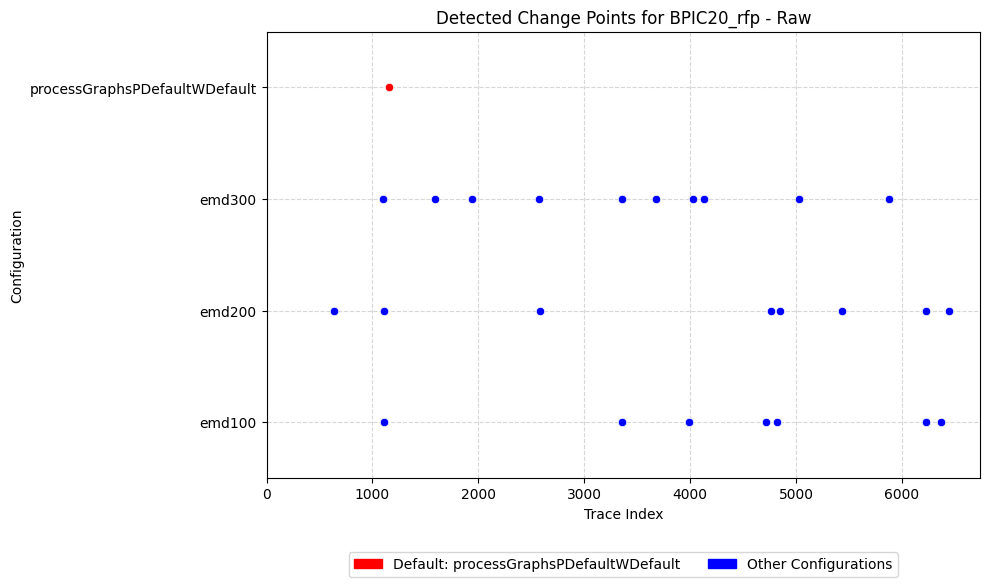

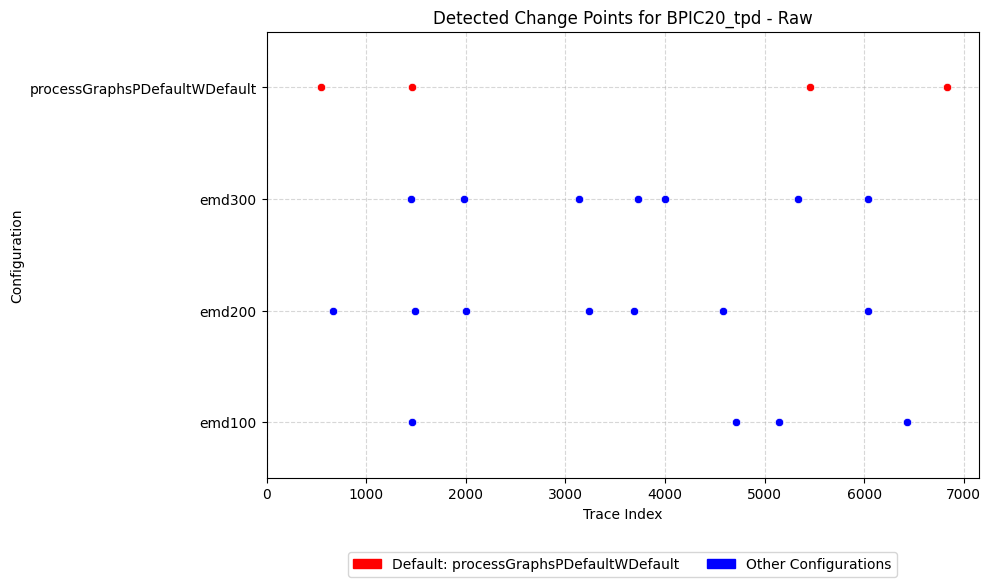

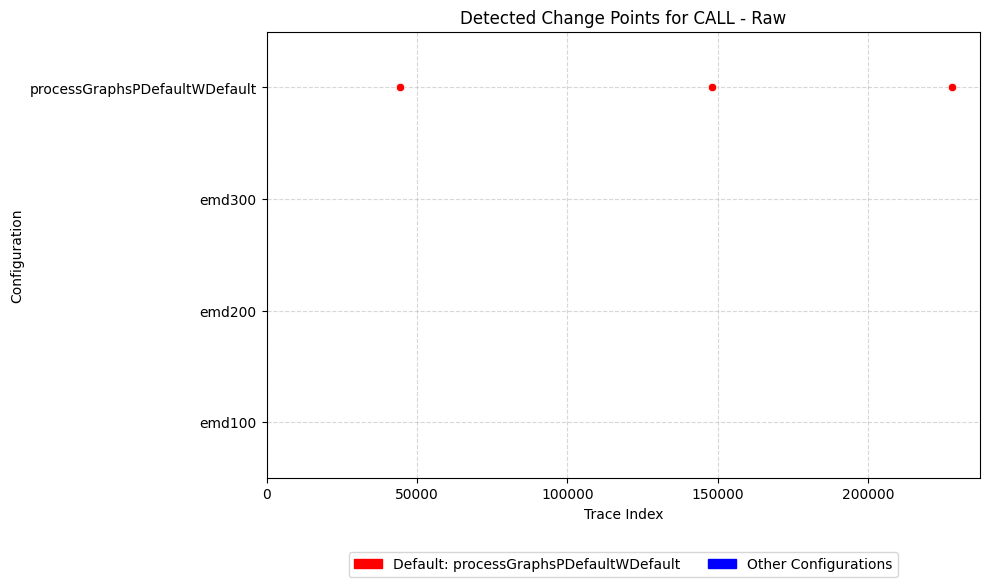

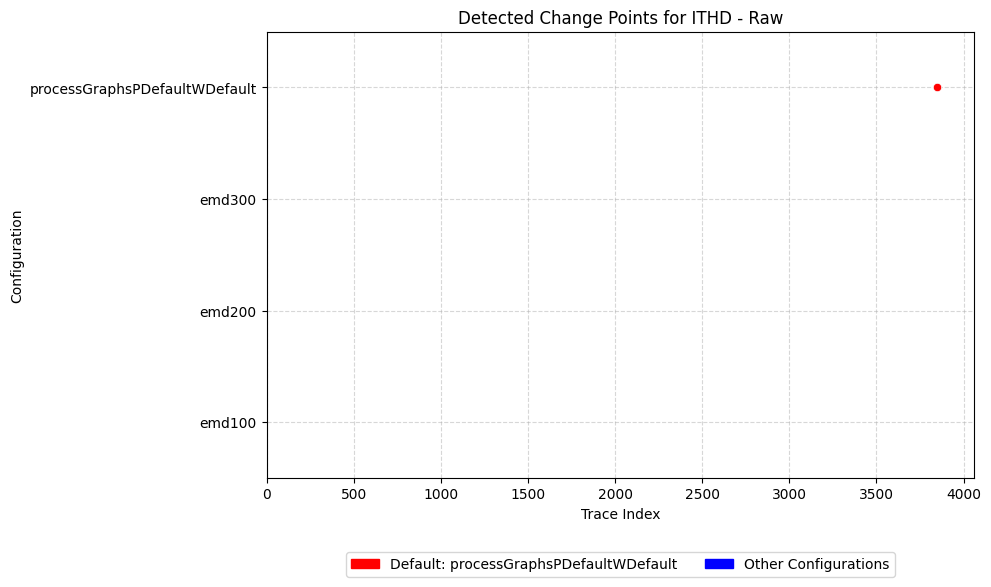

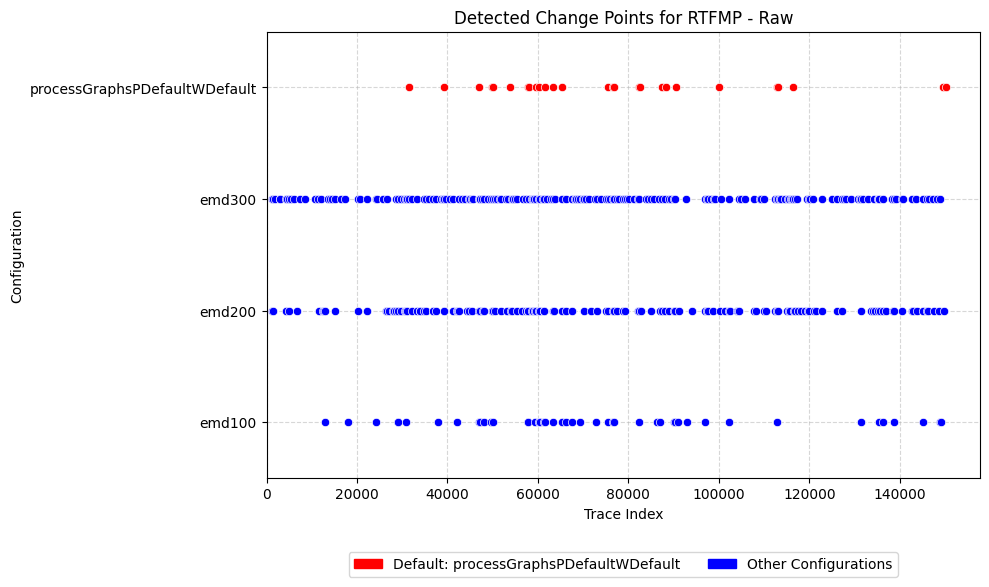

[INFO] No change points to plot for dataset SEPSIS.


In [ ]:
configurations = ['emd100', 'emd200', 'emd300', 'processGraphsPDefaultWDefault']

dd_results_df = helpers.get_dataframe_from_drift_detection_results(data_dictionary.keys(), configurations)

for dataset in data_dictionary.keys():
    plot_change_points(dataset, dd_results_df[dd_results_df['dataset'] == dataset], input_type='dataframe', config_column_in_df='configuration', y_axis_label="Configuration", configuration_labels=configurations, title_suffix="Raw", x_axis='change_point', default_configuration='processGraphsPDefaultWDefault')

## Investigate correlation between activity timing and trace count

In [ ]:
from pathlib import Path
import math
import pandas as pd
import matplotlib.pyplot as plt
from pm4py.objects.log.importer.xes import importer as xes_importer

def build_accumulated_trace_starts(data_dictionary, utc=True):
    """
    Load each XES log and build {dataset: DataFrame(time, count)} where
    'time' are sorted trace start timestamps and 'count' is cumulative trace count.
    """
    per_dataset = {}

    for dataset_name, dataset_info in data_dictionary.items():
        log_path = Path(dataset_info["path"])
        pm4py_log = xes_importer.apply(str(log_path))

        # First timestamp per trace
        trace_starts = [trace[0]['time:timestamp'] for trace in pm4py_log if trace]
        if not trace_starts:
            per_dataset[dataset_name] = pd.DataFrame(columns=["time", "count"])
            continue

        starts = pd.to_datetime(trace_starts, utc=utc).sort_values()
        df_acc = pd.DataFrame({"time": starts, "count": range(1, len(starts) + 1)})
        per_dataset[dataset_name] = df_acc

    return per_dataset
import matplotlib.dates as mdates
import matplotlib.dates as mdates
import matplotlib.dates as mdates

import matplotlib.dates as mdates

import matplotlib.dates as mdates

def plot_accumulated_trace_starts_subplots(series_dict, ncols=3, step=True,
                                           title="Accumulated Trace Starts per Dataset"):
    dataset_names = list(series_dict.keys())
    if not dataset_names:
        raise ValueError("series_dict is empty.")

    n = len(dataset_names)
    nrows = math.ceil(n / ncols)

    fig, axes = plt.subplots(
        nrows=nrows, ncols=ncols,
        figsize=(4.8 * ncols, 3.6 * nrows),
        sharey=False
    )

    if nrows == 1 and ncols == 1:
        axes = [[axes]]
    elif nrows == 1:
        axes = [axes]
    elif ncols == 1:
        axes = [[ax] for ax in axes]

    handles, labels = None, None

    for idx, ds in enumerate(dataset_names):
        r, c = divmod(idx, ncols)
        ax = axes[r][c]
        df_acc = series_dict[ds]

        if not df_acc.empty:
            if step:
                ax.step(df_acc["time"], df_acc["count"], where="post", label="Actual accumulation")
            else:
                ax.plot(df_acc["time"], df_acc["count"], label="Actual accumulation")

            first_time = df_acc["time"].iloc[0]
            last_time = df_acc["time"].iloc[-1]
            total_count = df_acc["count"].iloc[-1]
            ax.plot(
                [first_time, last_time],
                [0, total_count],
                color="red",
                linestyle="--",
                linewidth=1,
                alpha=0.4,
                label="Reference (constant rate)"
            )

            if handles is None and labels is None:
                handles, labels = ax.get_legend_handles_labels()

        else:
            ax.text(0.5, 0.5, "No data", ha="center", va="center", transform=ax.transAxes)

        ax.set_title(ds)
        ax.set_xlabel("Start time")
        if c == 0:
            ax.set_ylabel("Accumulated traces")

        ax.grid(True, axis="y", linestyle="--", alpha=0.4)
        ax.xaxis.set_major_locator(mdates.AutoDateLocator(minticks=3, maxticks=7))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

    for i in range(n, nrows * ncols):
        r, c = divmod(i, ncols)
        axes[r][c].axis("off")

    if handles and labels:
        fig.legend(handles, labels,
                   loc="lower center",
                   ncol=len(labels),
                   frameon=False,
                   bbox_to_anchor=(0.5, -0.02))  # push legend outside plot

    fig.suptitle(title, y=1.02)
    plt.tight_layout(rect=[0, 0.05, 1, 1])  # leave space for legend
    plt.show()
    return fig, axes


parsing log, completed traces :: 100%|██████████| 1050/1050 [00:00<00:00, 1729.95it/s]


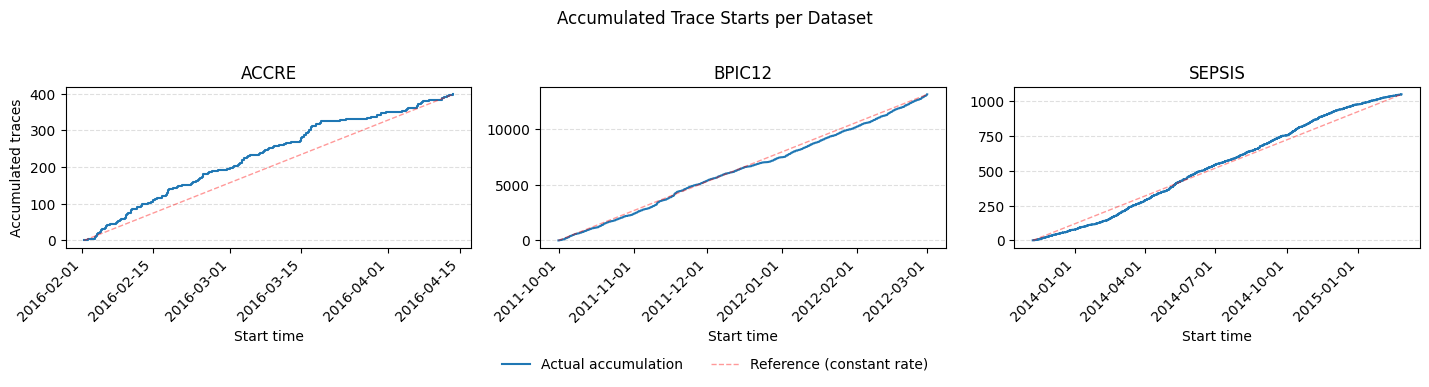

(<Figure size 1440x360 with 3 Axes>,
 [array([<AxesSubplot: title={'center': 'ACCRE'}, xlabel='Start time', ylabel='Accumulated traces'>,
         <AxesSubplot: title={'center': 'BPIC12'}, xlabel='Start time'>,
         <AxesSubplot: title={'center': 'SEPSIS'}, xlabel='Start time'>],
        dtype=object)])

In [183]:
# test plotting
keep_keys = {"ACCRE", "SEPSIS", "BPIC12"}
filtered_data_dictionary = {k: v for k, v in data_dictionary.items() if k in keep_keys}
series_dict = build_accumulated_trace_starts(filtered_data_dictionary)
plot_accumulated_trace_starts_subplots(series_dict, ncols=3, step=True)


parsing log, completed traces ::  36%|███▋      | 16905/46616 [00:35<00:36, 803.56it/s]



parsing log, completed traces ::  24%|██▎       | 11028/46616 [12:04<38:57, 15.22it/s] 


































































































parsing log, completed traces :: 100%|██████████| 1050/1050 [00:01<00:00, 670.62it/s]


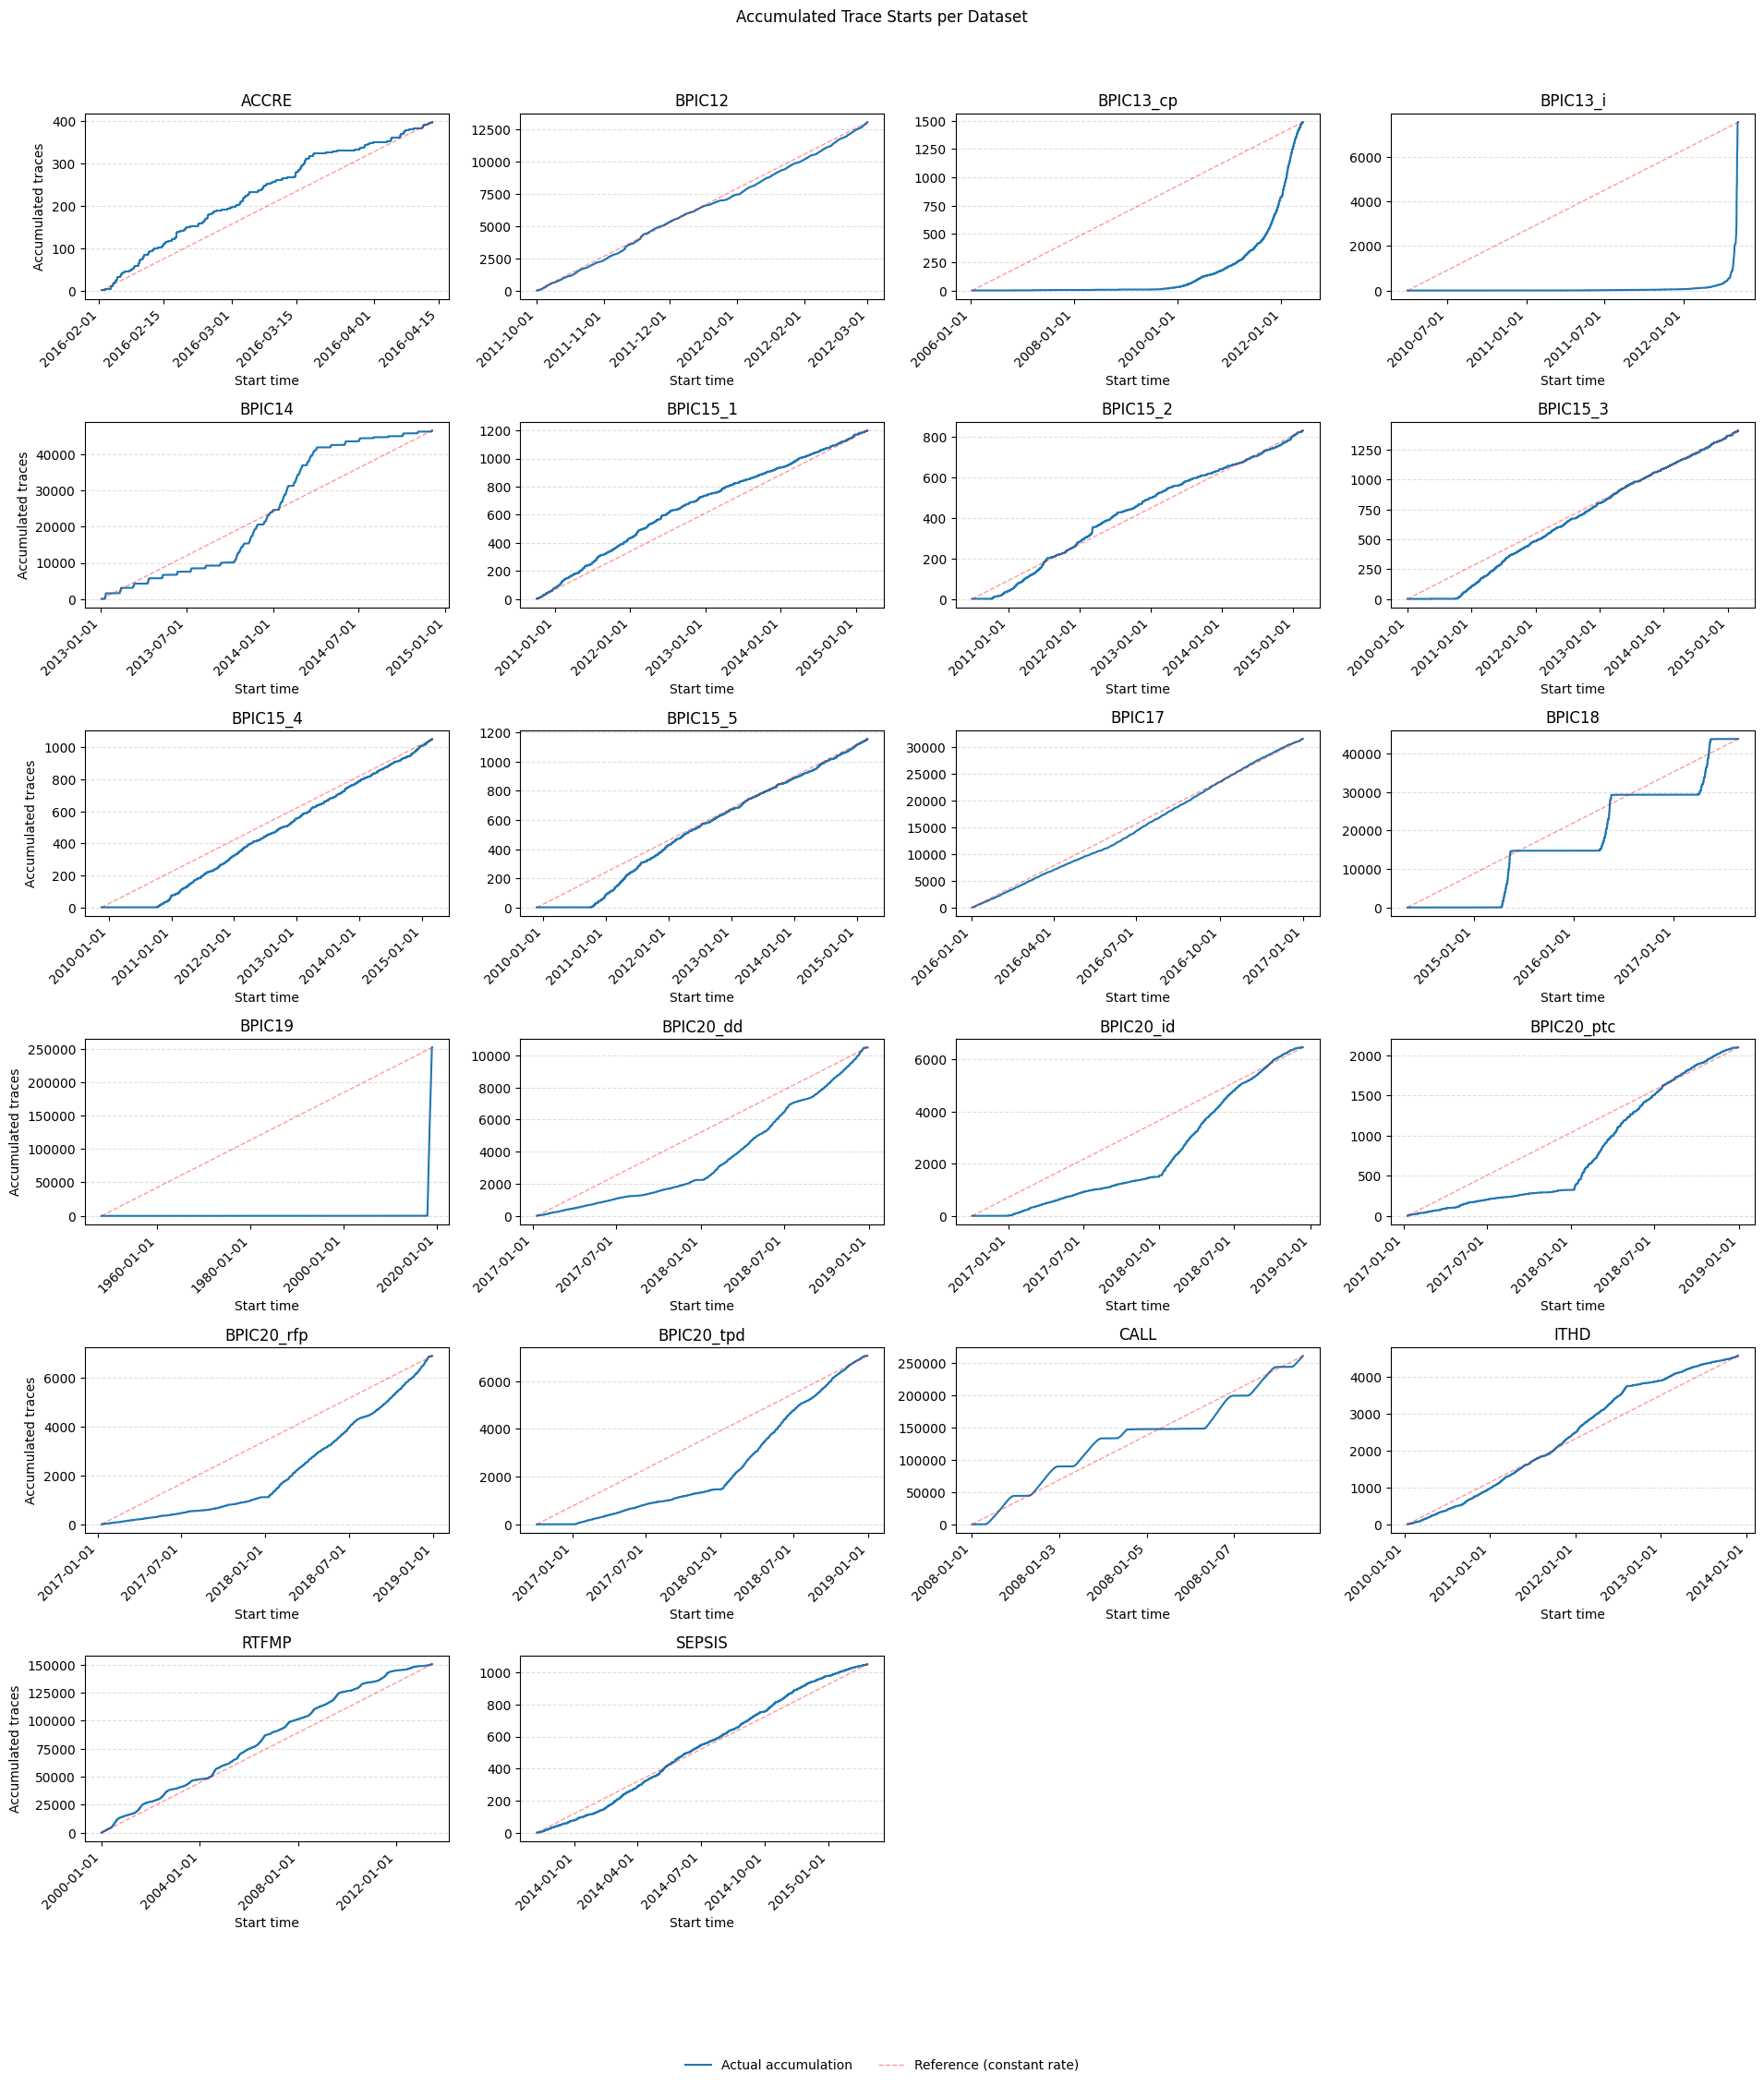

(<Figure size 1920x2160 with 24 Axes>,
 array([[<AxesSubplot: title={'center': 'ACCRE'}, xlabel='Start time', ylabel='Accumulated traces'>,
         <AxesSubplot: title={'center': 'BPIC12'}, xlabel='Start time'>,
         <AxesSubplot: title={'center': 'BPIC13_cp'}, xlabel='Start time'>,
         <AxesSubplot: title={'center': 'BPIC13_i'}, xlabel='Start time'>],
        [<AxesSubplot: title={'center': 'BPIC14'}, xlabel='Start time', ylabel='Accumulated traces'>,
         <AxesSubplot: title={'center': 'BPIC15_1'}, xlabel='Start time'>,
         <AxesSubplot: title={'center': 'BPIC15_2'}, xlabel='Start time'>,
         <AxesSubplot: title={'center': 'BPIC15_3'}, xlabel='Start time'>],
        [<AxesSubplot: title={'center': 'BPIC15_4'}, xlabel='Start time', ylabel='Accumulated traces'>,
         <AxesSubplot: title={'center': 'BPIC15_5'}, xlabel='Start time'>,
         <AxesSubplot: title={'center': 'BPIC17'}, xlabel='Start time'>,
         <AxesSubplot: title={'center': 'BPIC18'}, xlab

In [186]:
series_dict = build_accumulated_trace_starts(data_dictionary)
plot_accumulated_trace_starts_subplots(series_dict, ncols=4, step=True)